In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
df = pd.read_csv("/content/Dev_data_to_be_shared.csv")

In [47]:
df.head()

account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0               1         0               NaN                      NaN   
1               2         0          221000.0                      0.0   
2               3         0           25000.0                      0.0   
3               4         0           86000.0                      0.0   
4               5         0          215000.0                      0.0   

   transaction_attribute_2  transaction_attribute_3  transaction_attribute_4  \
0                      NaN                      NaN                      NaN   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   transaction_attribute_5  transaction_attribute_6  transaction_attribute_7  \
0                      NaN                      NaN                      NaN   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   ...  bureau_enquiry_47  bureau_enquiry_48  bureau_enquiry_49  \
0  ...                0.0                0.0                0.0   
1  ...                0.0                0.0                2.0   
2  ...                0.0                0.0                0.0   
3  ...                0.0                0.0                0.0   
4  ...                0.0                0.0                0.0   

   bureau_enquiry_50  onus_attribute_43  onus_attribute_44  onus_attribute_45  \
0                1.0                NaN                NaN                NaN   
1                3.0                0.0                0.0                0.0   
2                8.0                NaN                NaN                NaN   
3               30.0                NaN                NaN                NaN   
4                1.0                NaN                NaN                NaN   

   onus_attribute_46  onus_attribute_47  onus_attribute_48  
0                NaN                NaN                NaN  
1                0.0                0.0                0.0  
2                NaN                NaN                NaN  
3                NaN                NaN                NaN  
4                NaN                NaN                NaN  

[5 rows x 1216 columns]

In [6]:
print("Dataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB
None

Summary Statistics:
       account_number      bad_flag  onus_attribute_1  \
count    96806.000000  96806.000000      7.157500e+04   
mean     48403.500000      0.014173      1.542391e+05   
std      27945.629417      0.118203      1.729925e+05   
min          1.000000      0.000000      2.500000e+04   
25%      24202.250000      0.000000      5.900000e+04   
50%      48403.500000      0.000000      1.000000e+05   
75%      72604.750000      0.000000      1.810000e+05   
max      96806.000000      1.000000      2.800000e+06   

       transaction_attribute_1  transaction_attribute_2  \
count             71575.000000             71575.000000   
mean                  9.570769                 0.002207   
std                1513.967595                 0.119240   
min         

In [7]:
df.isnull().sum()

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64

In [8]:
df.shape

(96806, 1216)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB


In [10]:
df.columns

Index(['account_number', 'bad_flag', 'onus_attribute_1',
       'transaction_attribute_1', 'transaction_attribute_2',
       'transaction_attribute_3', 'transaction_attribute_4',
       'transaction_attribute_5', 'transaction_attribute_6',
       'transaction_attribute_7',
       ...
       'bureau_enquiry_47', 'bureau_enquiry_48', 'bureau_enquiry_49',
       'bureau_enquiry_50', 'onus_attribute_43', 'onus_attribute_44',
       'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47',
       'onus_attribute_48'],
      dtype='object', length=1216)

In [13]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({ # Remove the extra = sign to correctly create a DataFrame
    "Column": df.columns,
    "Missing Values": missing_values,
    "Percentage Missing": missing_percentage
}).sort_values(by="Percentage Missing", ascending=False)

print("\nTop 10 Columns with Missing Values:")
print(missing_df.head(10))


Top 10 Columns with Missing Values:
                              Column  Missing Values  Percentage Missing
bureau_436                bureau_436           96806          100.000000
bureau_447                bureau_447           96806          100.000000
bureau_449                bureau_449           91118           94.124331
bureau_148                bureau_148           90564           93.552053
bureau_448                bureau_448           87153           90.028511
onus_attribute_43  onus_attribute_43           85196           88.006942
onus_attribute_48  onus_attribute_48           85196           88.006942
onus_attribute_44  onus_attribute_44           85196           88.006942
onus_attribute_45  onus_attribute_45           85196           88.006942
onus_attribute_46  onus_attribute_46           85196           88.006942


<ipython-input-14-c78c106888c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


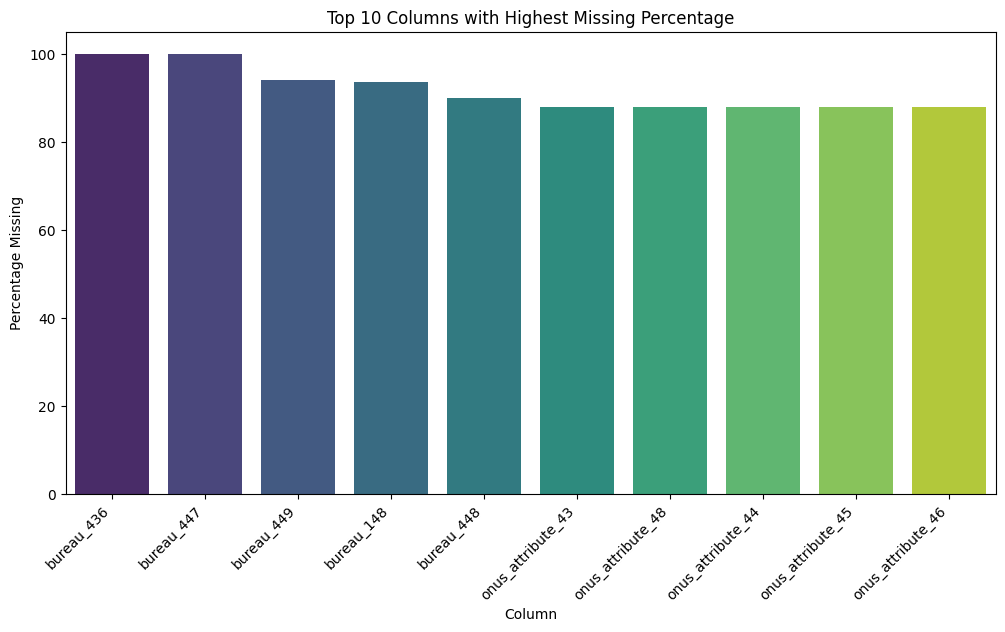

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=missing_df['Column'].head(10),
    y=missing_df['Percentage Missing'].head(10),
    palette='viridis'
)
plt.title("Top 10 Columns with Highest Missing Percentage")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage Missing")
plt.show()


<ipython-input-15-4a095206361a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bad_flag", data=df, palette='pastel')


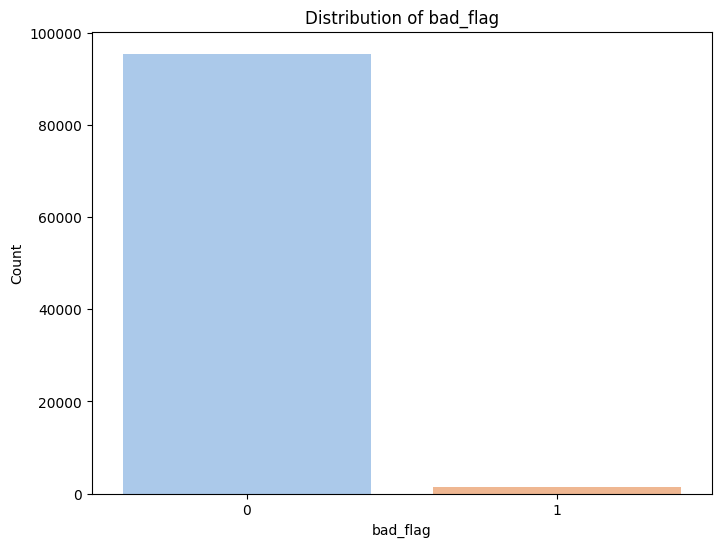

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="bad_flag", data=df, palette='pastel')
plt.title("Distribution of bad_flag")
plt.xlabel("bad_flag")
plt.ylabel("Count")
plt.show()

In [17]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
print("\nNumerical Columns Summary:")
print(df[numerical_columns].describe())


Numerical Columns Summary:
       account_number      bad_flag  onus_attribute_1  \
count    96806.000000  96806.000000      7.157500e+04   
mean     48403.500000      0.014173      1.542391e+05   
std      27945.629417      0.118203      1.729925e+05   
min          1.000000      0.000000      2.500000e+04   
25%      24202.250000      0.000000      5.900000e+04   
50%      48403.500000      0.000000      1.000000e+05   
75%      72604.750000      0.000000      1.810000e+05   
max      96806.000000      1.000000      2.800000e+06   

       transaction_attribute_1  transaction_attribute_2  \
count             71575.000000             71575.000000   
mean                  9.570769                 0.002207   
std                1513.967595                 0.119240   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000               

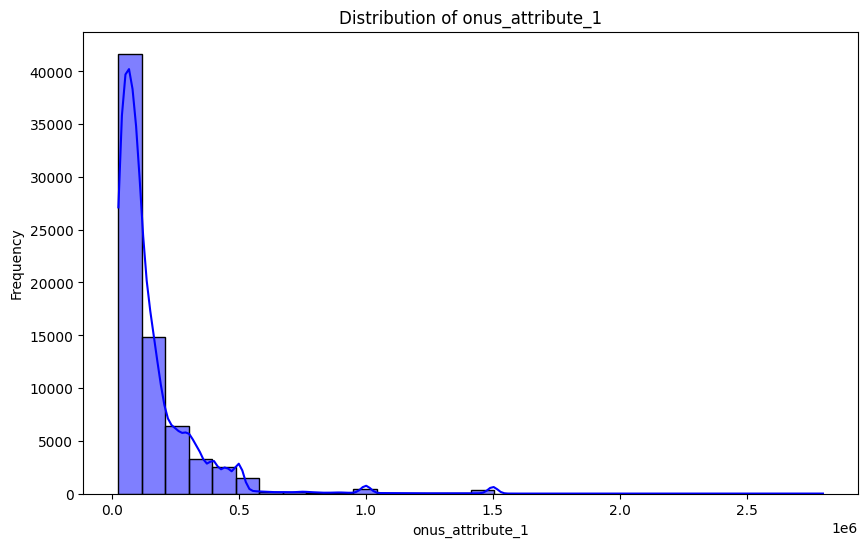

In [18]:
sample_column = numerical_columns[2]
plt.figure(figsize=(10, 6))
sns.histplot(df[sample_column].dropna(), kde=True, bins=30, color="blue")
plt.title(f"Distribution of {sample_column}")
plt.xlabel(sample_column)
plt.ylabel("Frequency")
plt.show()

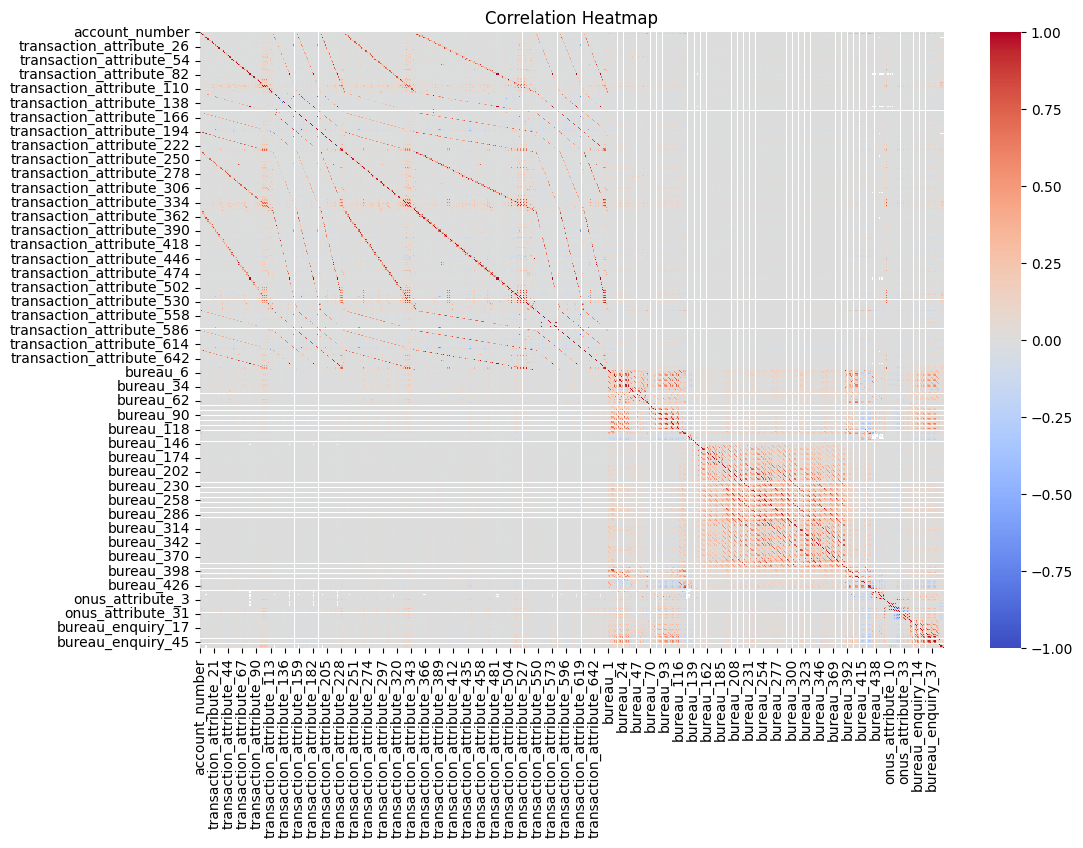

In [19]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
df = df.sample(1000, random_state=42)

In [21]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

In [22]:
def save_or_show_plot(fig, title):
  plt.title(title)
  plt.tight_layout()
  plt.show()

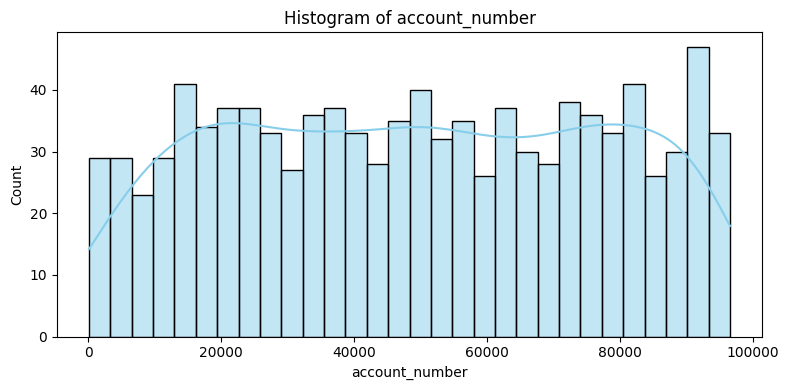

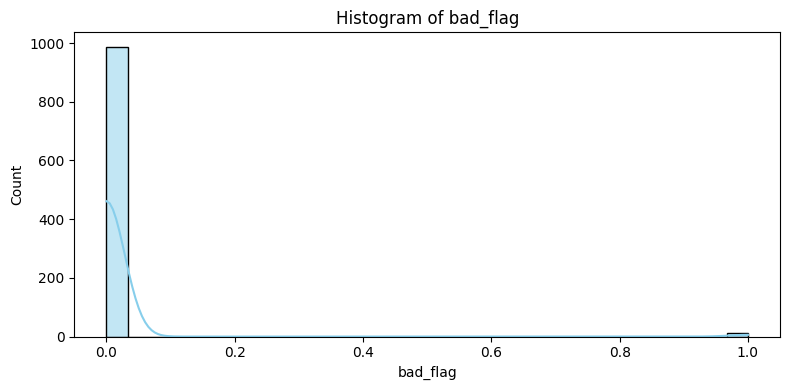

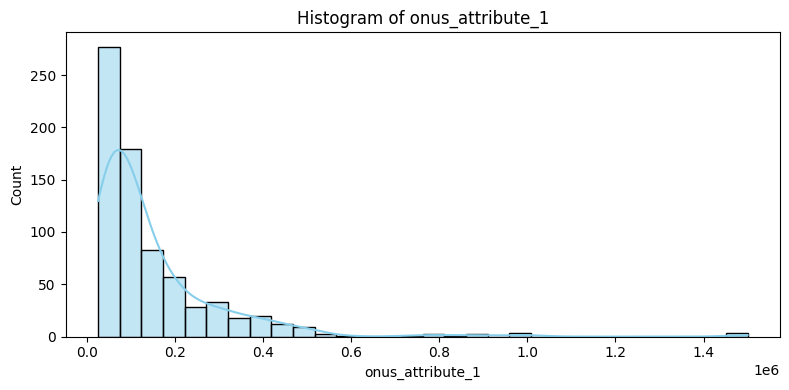

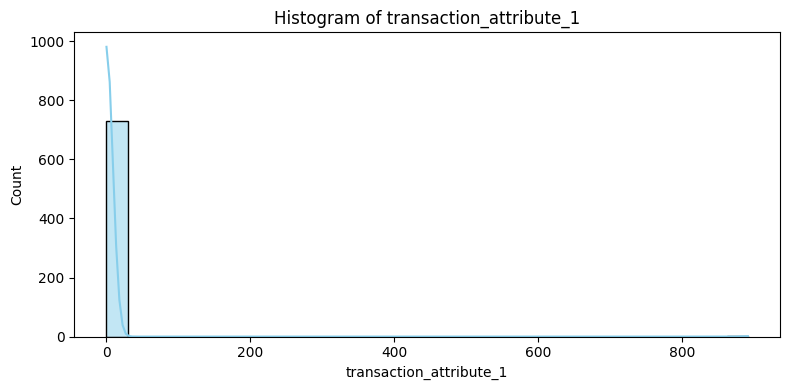

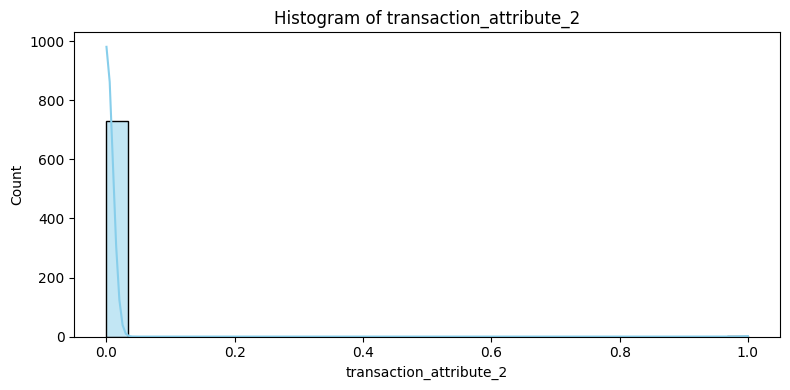

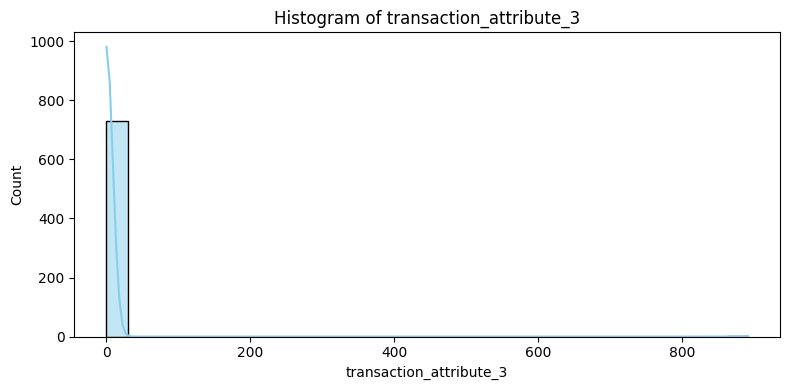

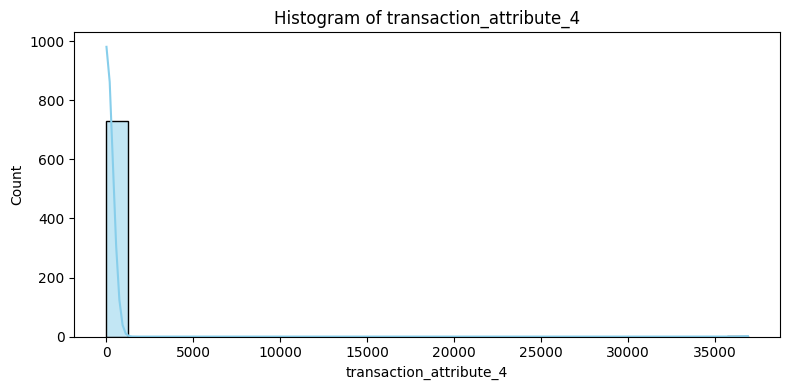

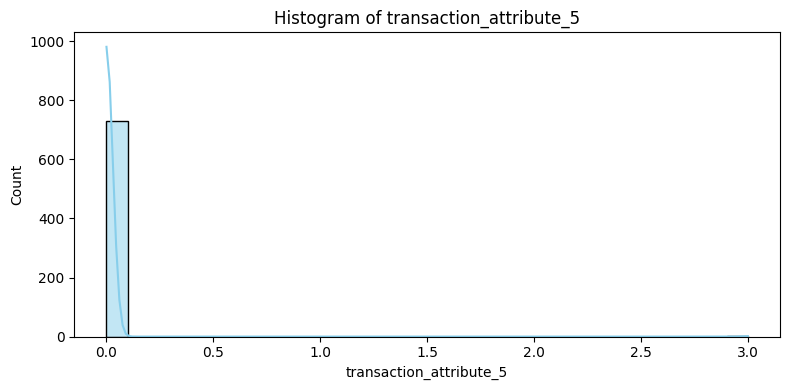

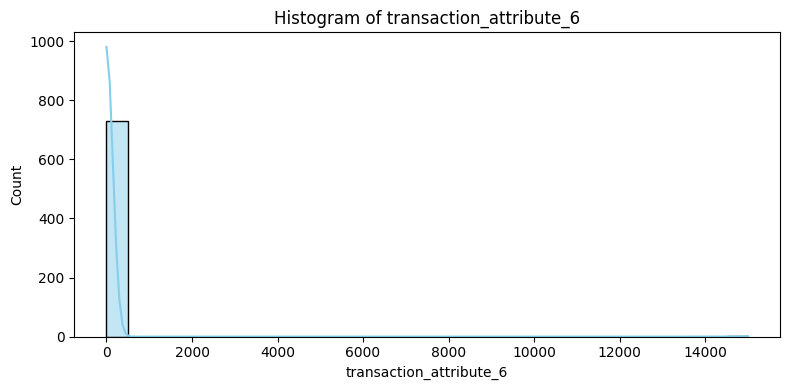

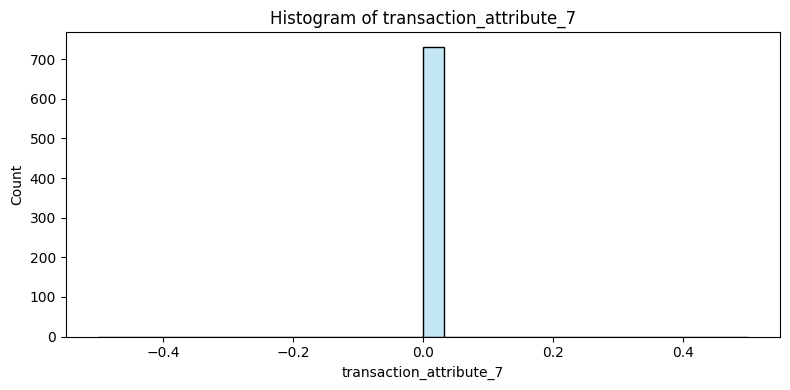

In [24]:
for col in numerical_columns[:10]:
  plt.figure(figsize=(8, 4))
  sns.histplot(df[col], kde=True, bins=30, color='skyblue')
  save_or_show_plot(plt, f"Histogram of {col}")

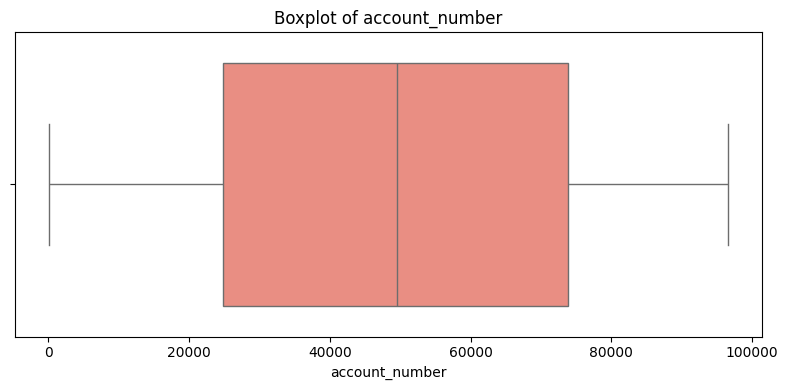

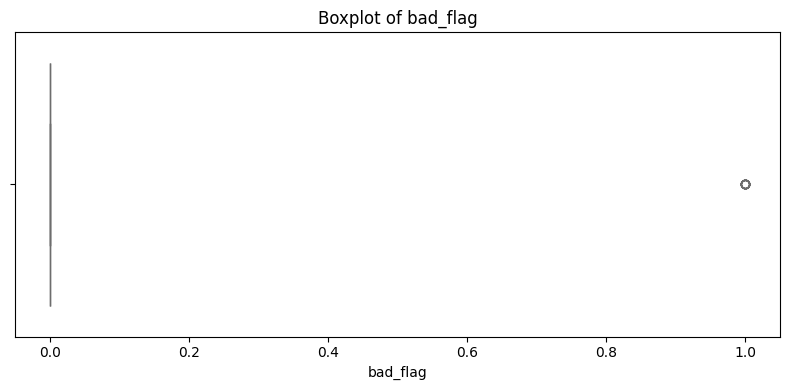

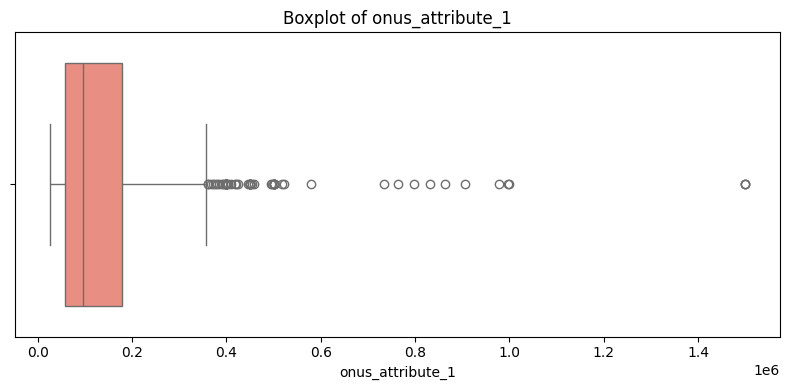

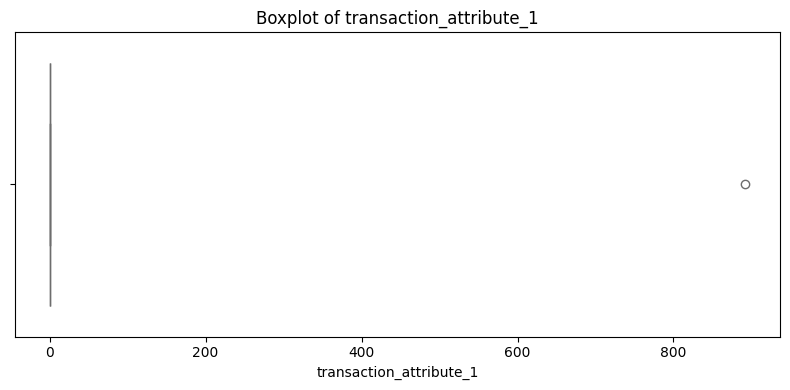

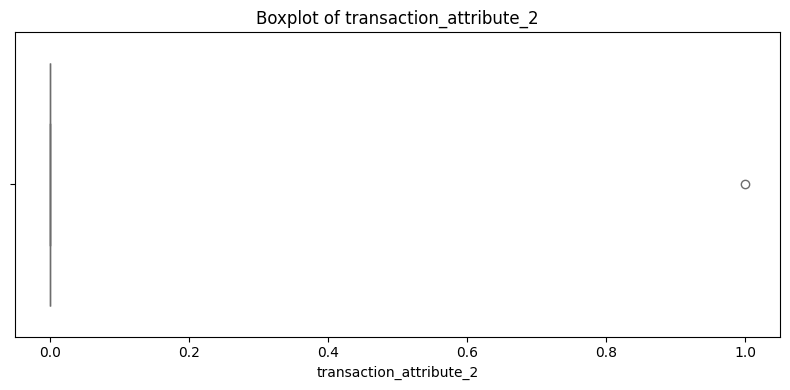

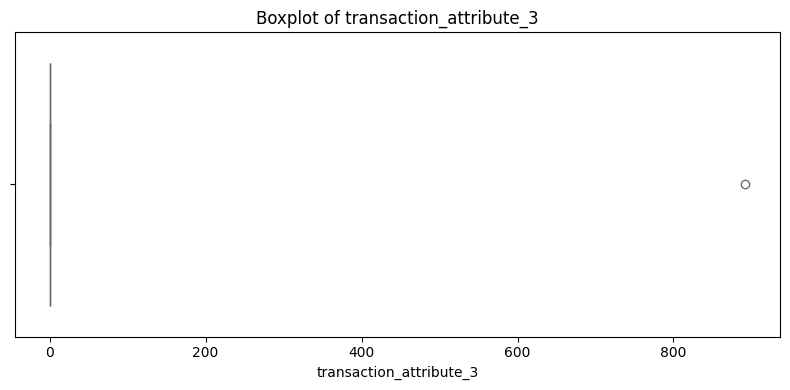

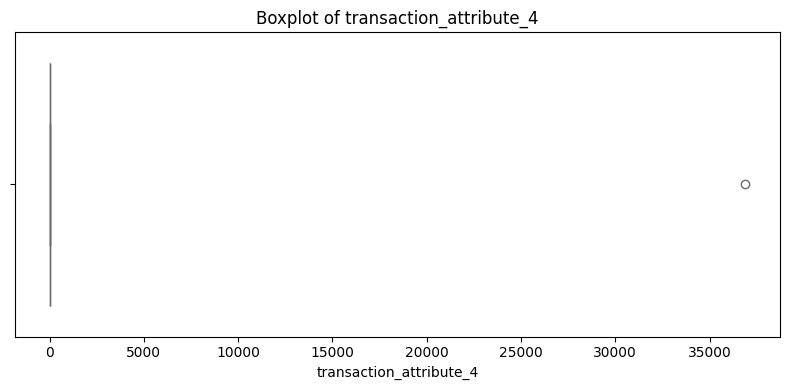

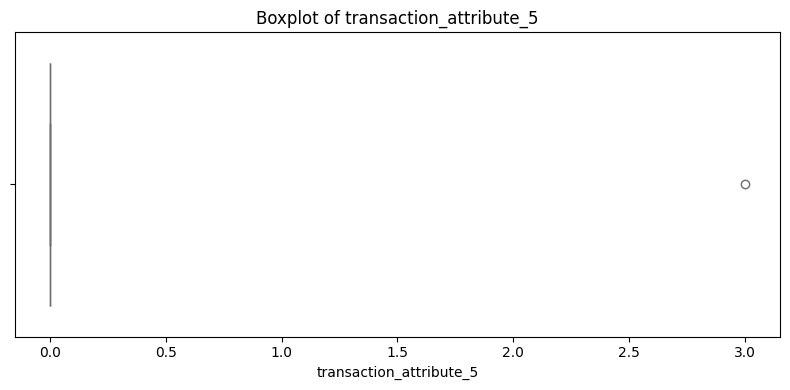

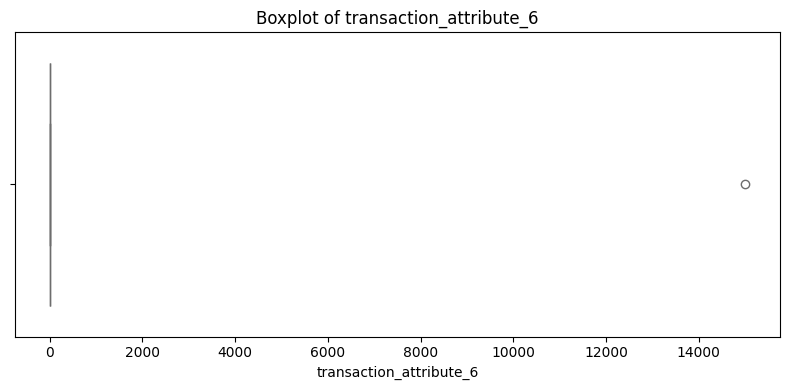

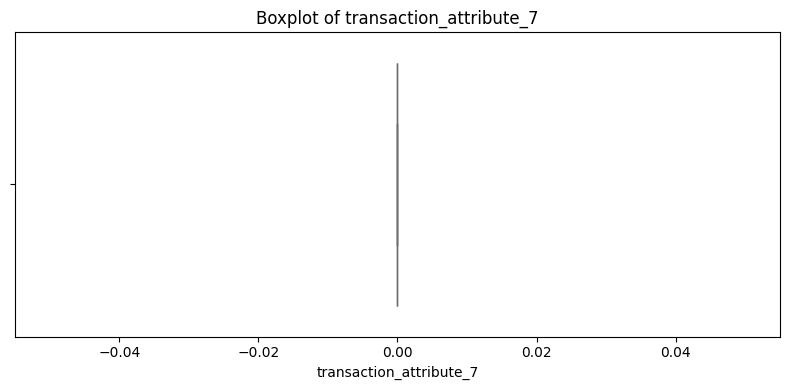

In [25]:
for col in numerical_columns[:10]:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=df[col], color="salmon")
  save_or_show_plot(plt, f"Boxplot of {col}")

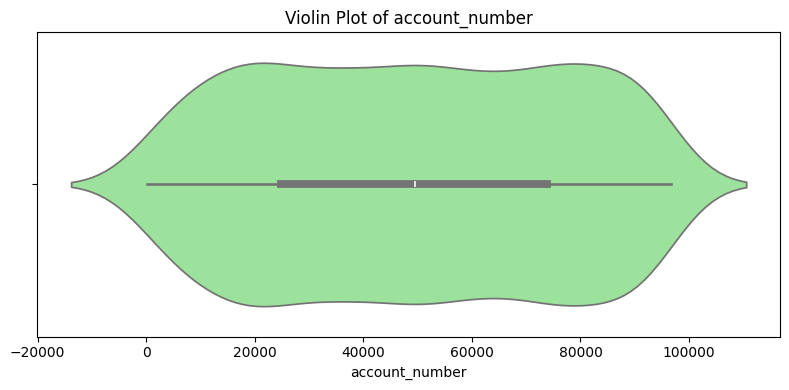

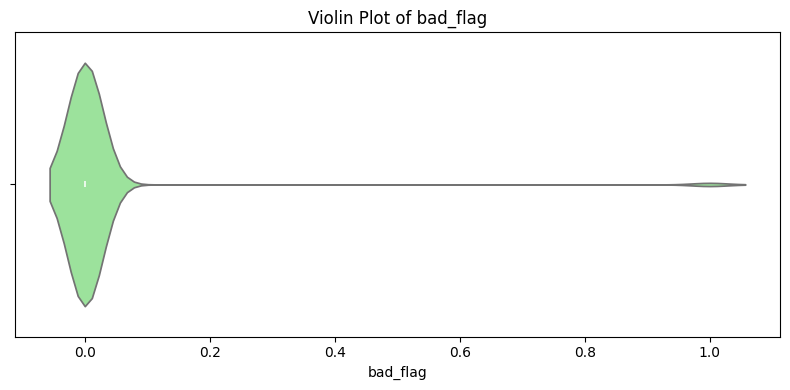

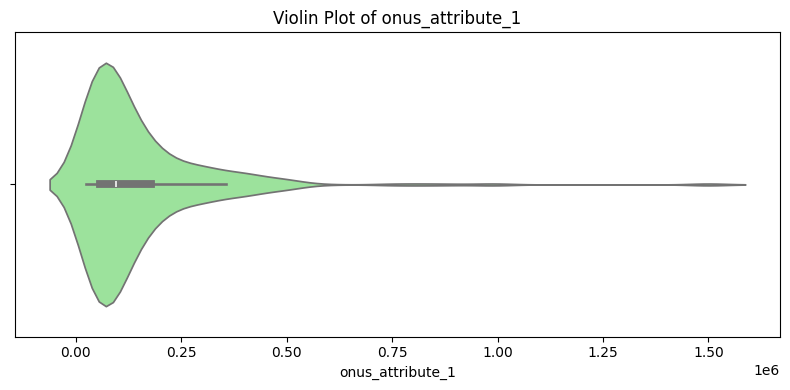

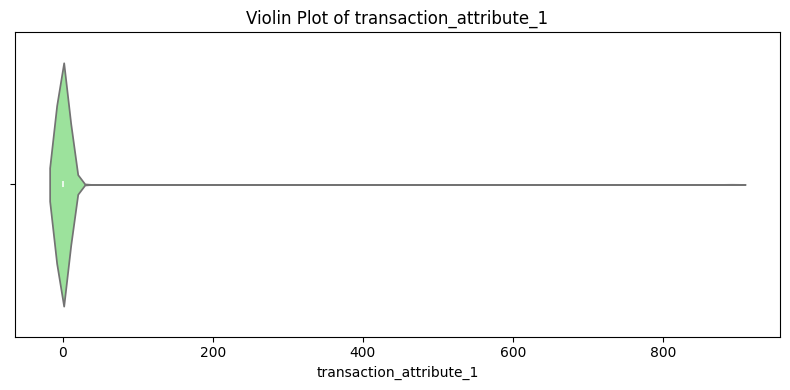

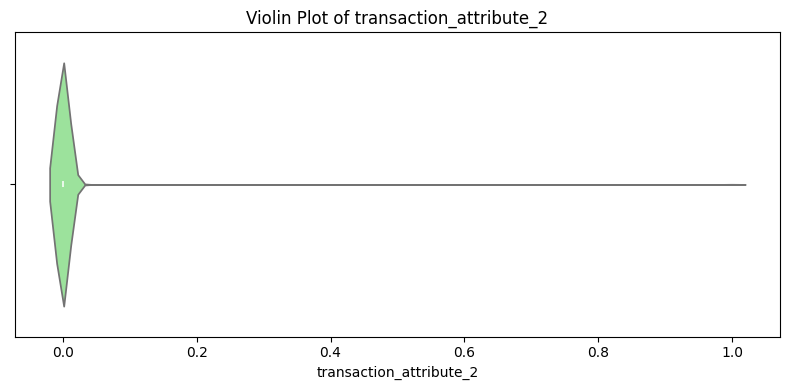

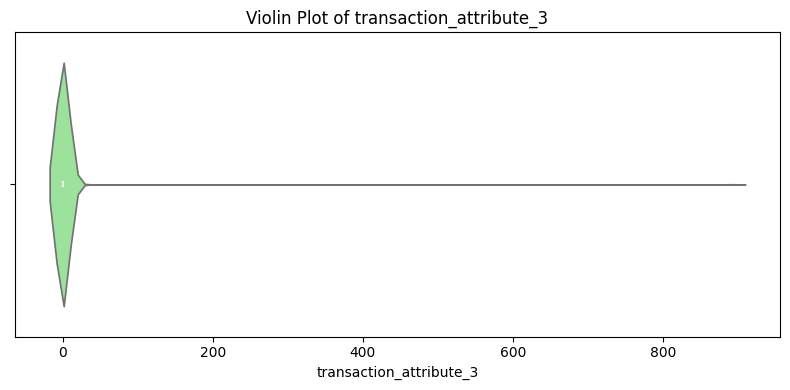

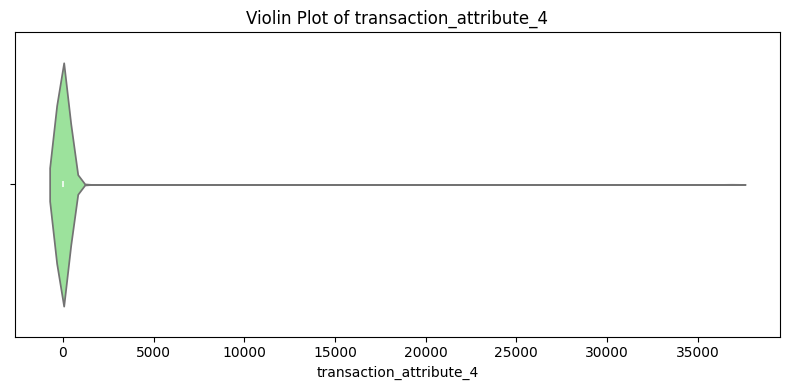

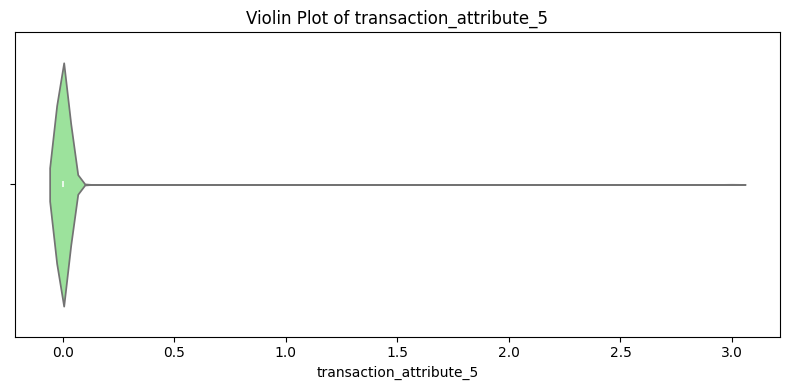

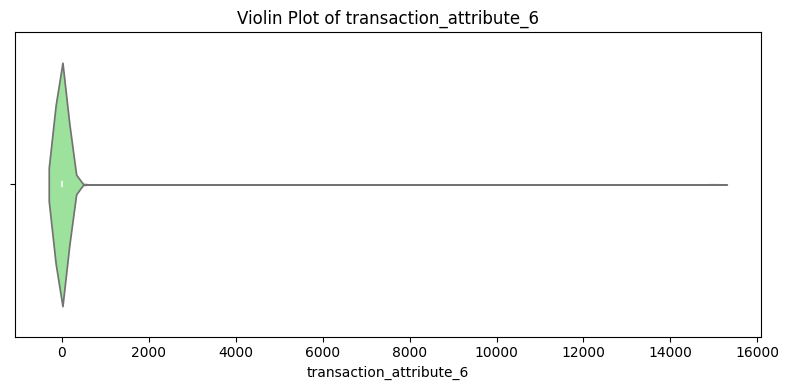

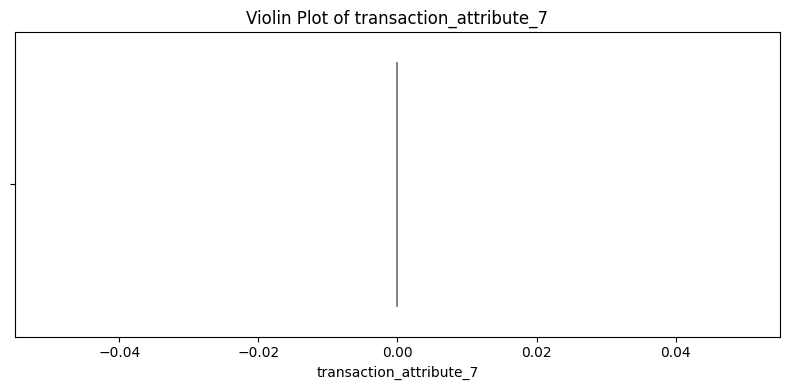

In [26]:
for col in numerical_columns[:10]:
  plt.figure(figsize=(8, 4))
  sns.violinplot(x=df[col], color="lightgreen")
  save_or_show_plot(plt, f"Violin Plot of {col}")

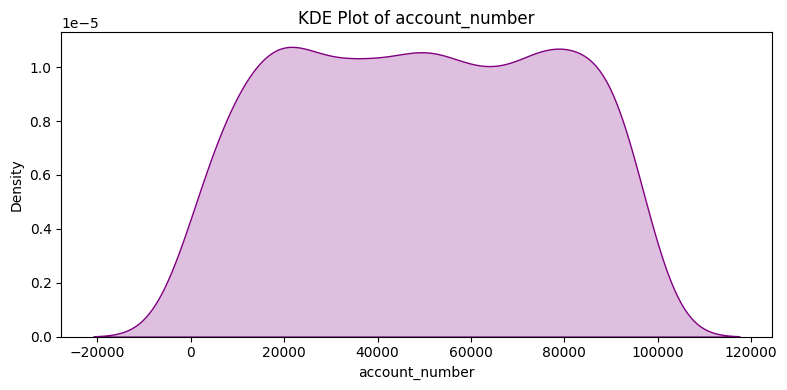

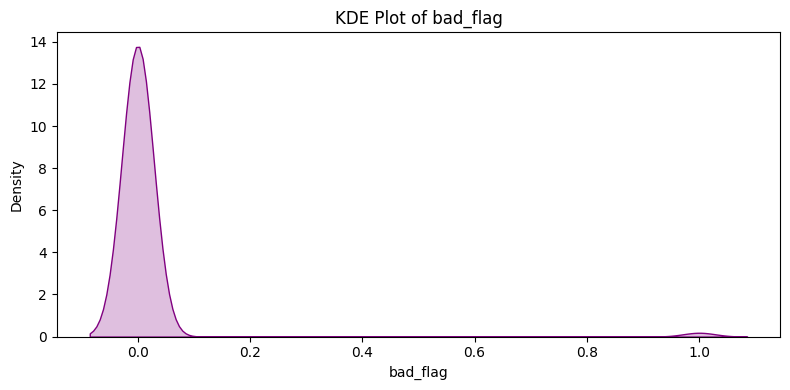

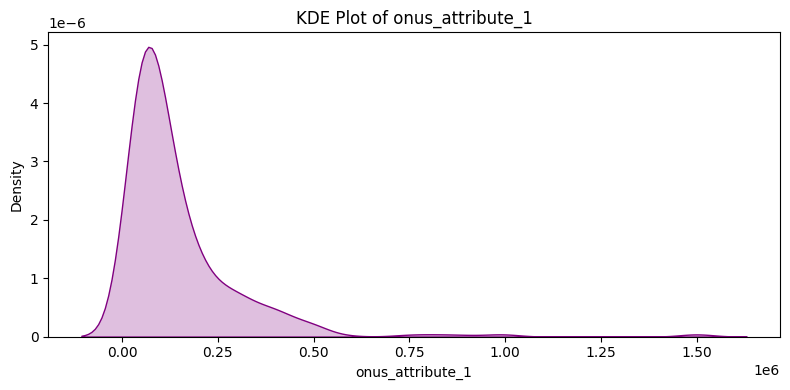

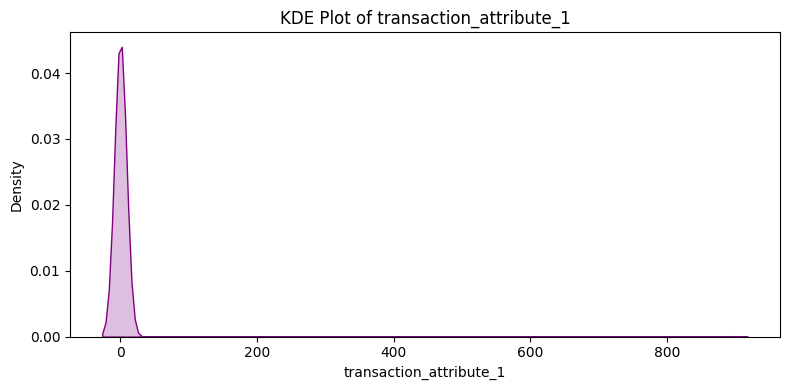

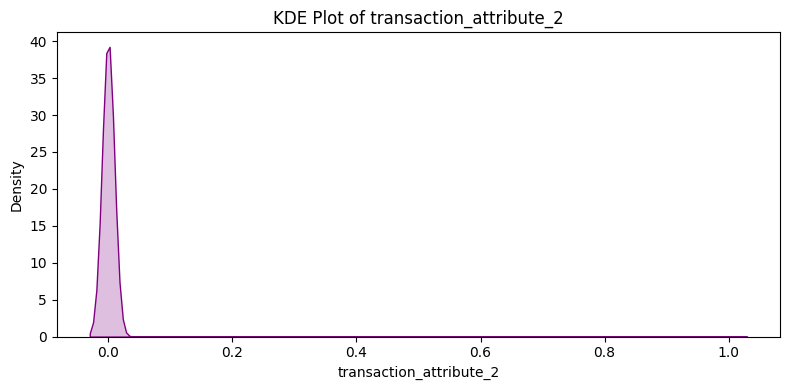

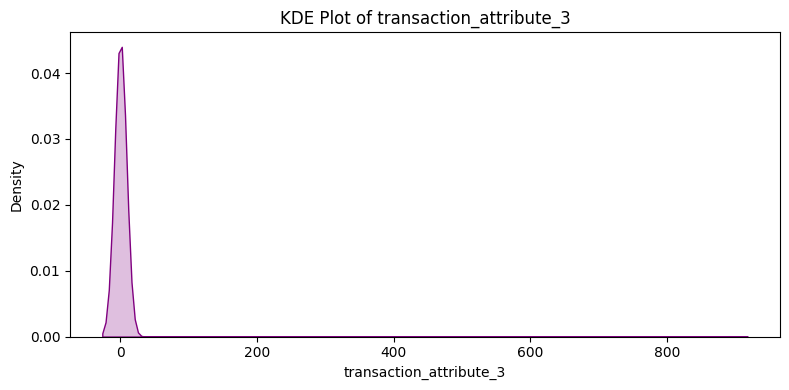

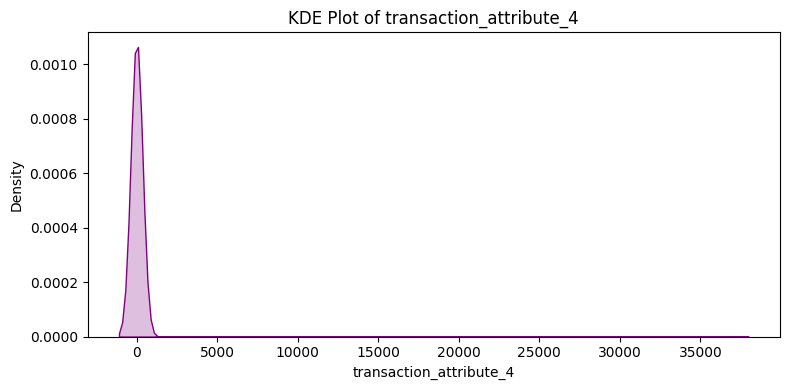

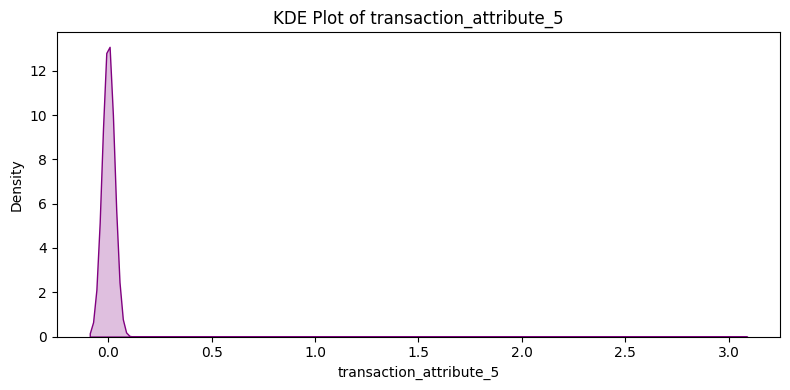

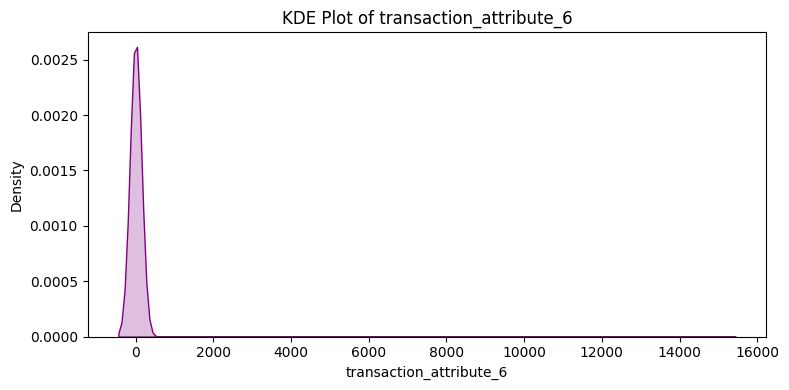

<ipython-input-27-3257dbb4b748>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color="purple")


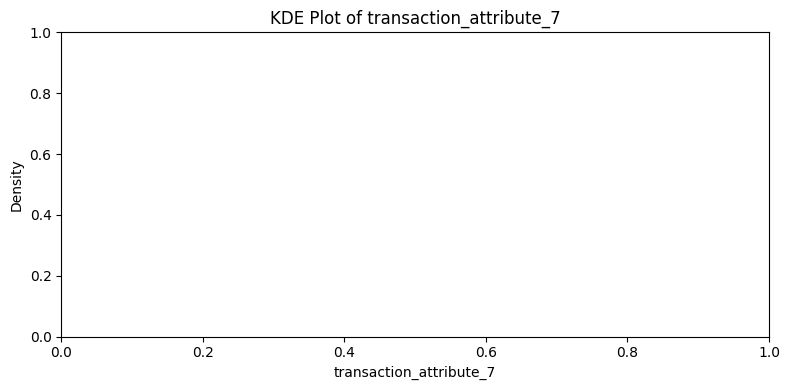

In [27]:
for col in numerical_columns[:10]:
  plt.figure(figsize=(8, 4))
  sns.kdeplot(df[col], fill=True, color="purple")
  save_or_show_plot(plt, f"KDE Plot of {col}")

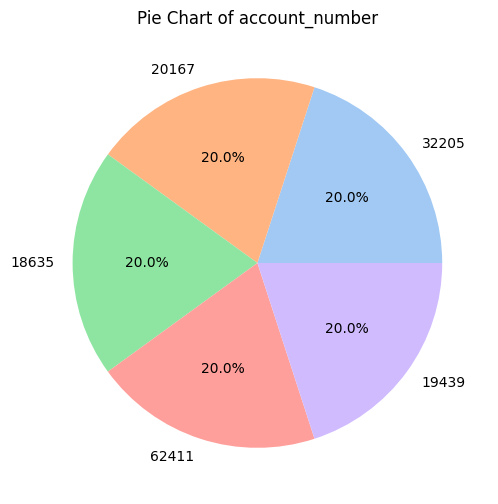

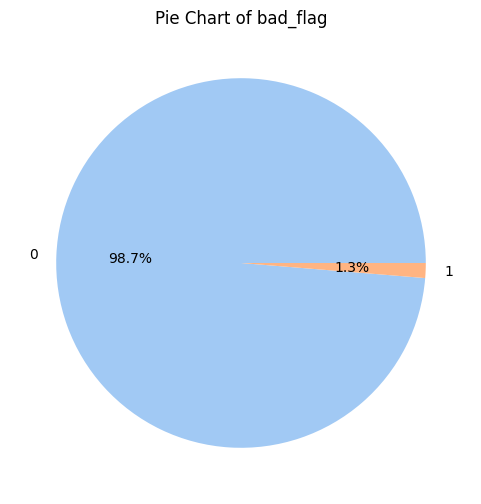

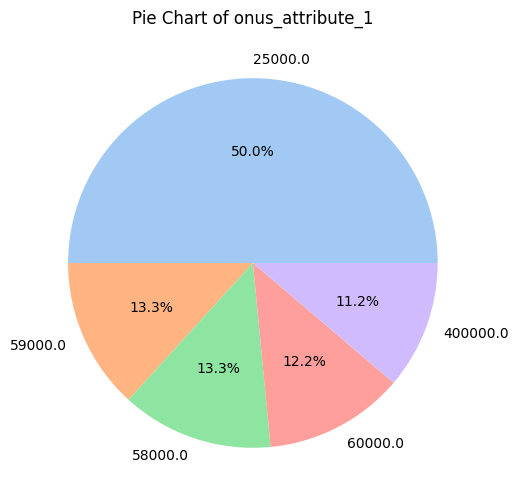

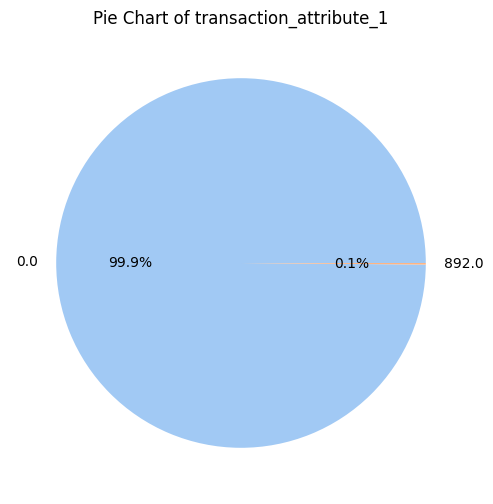

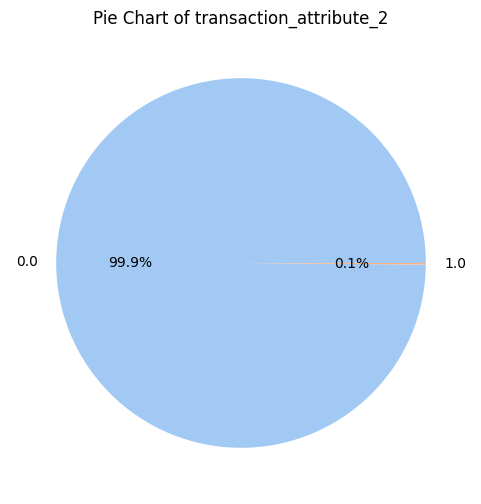

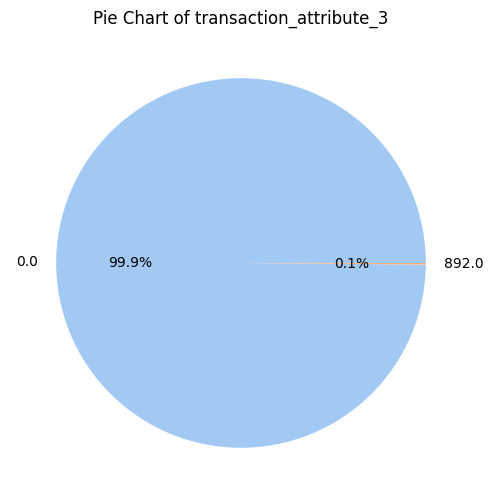

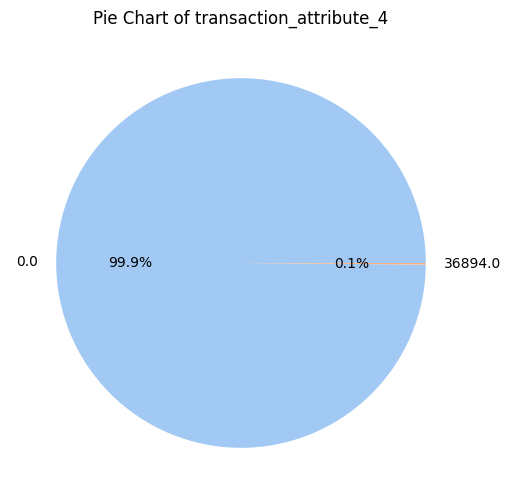

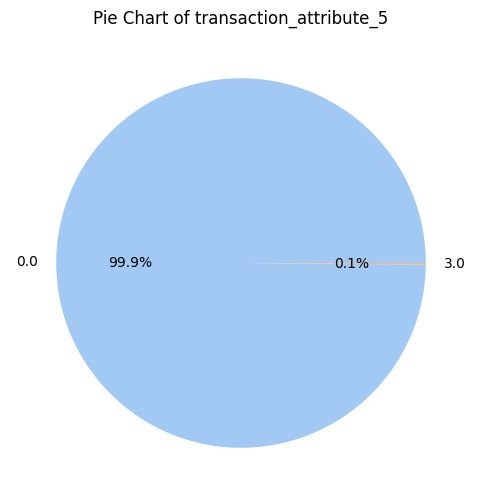

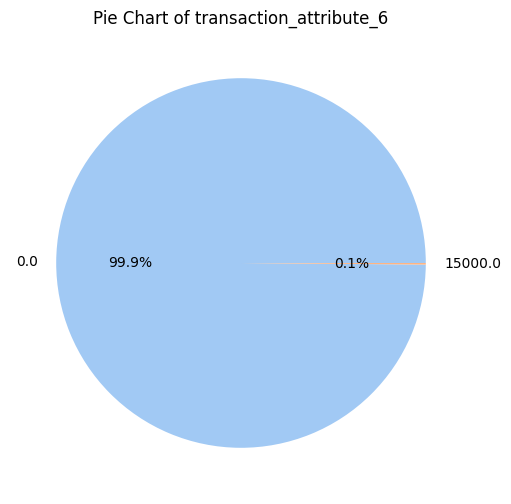

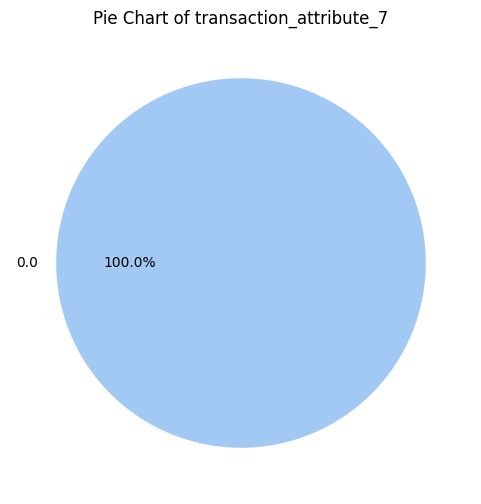

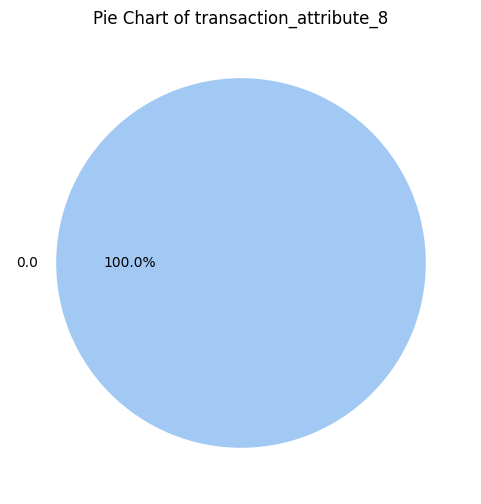

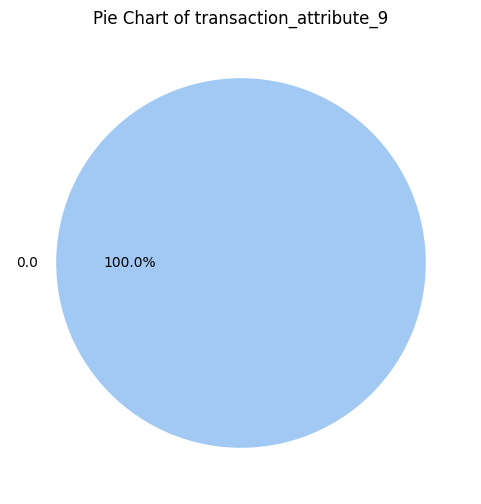

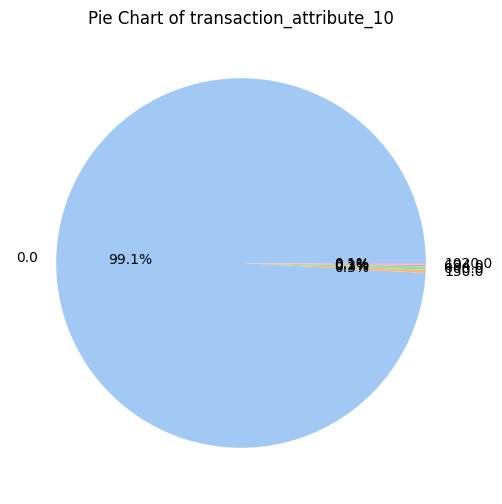

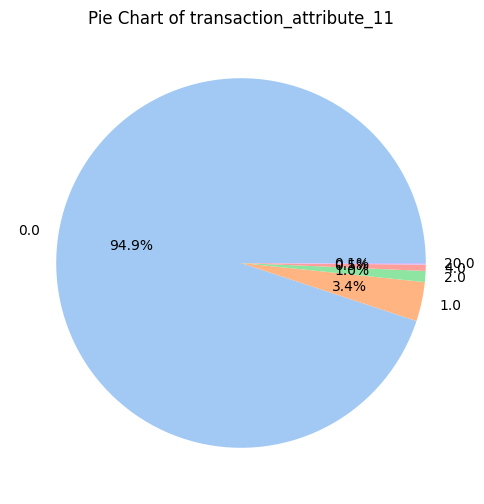

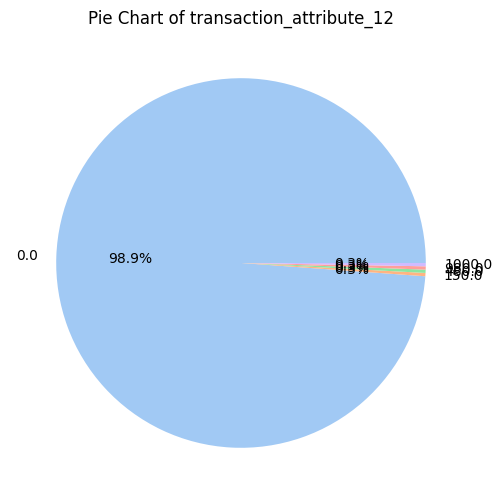

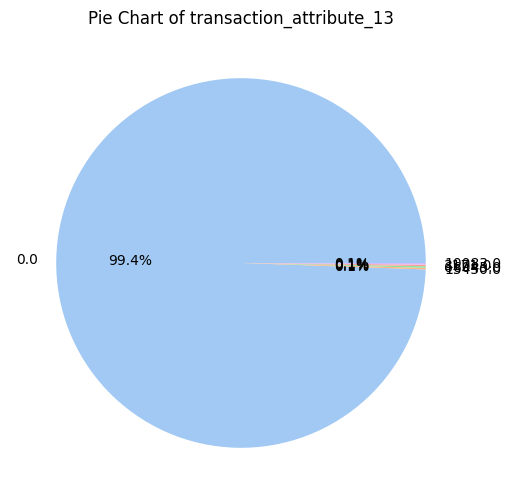

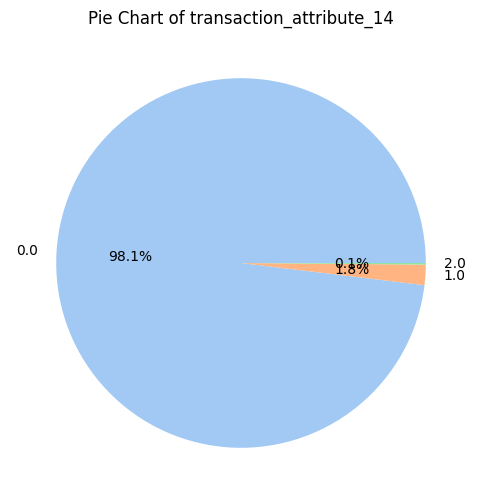

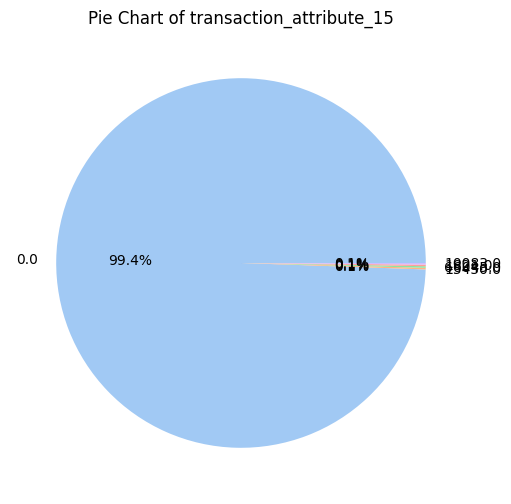

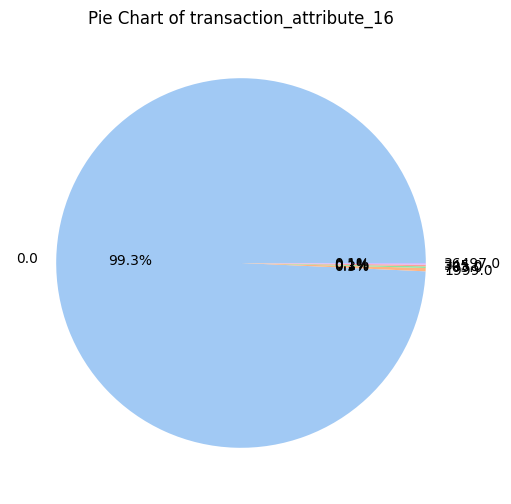

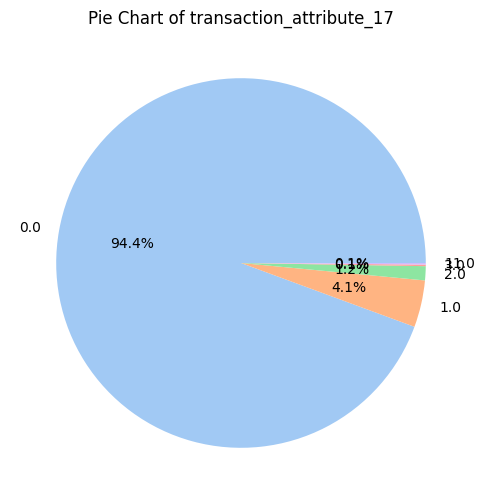

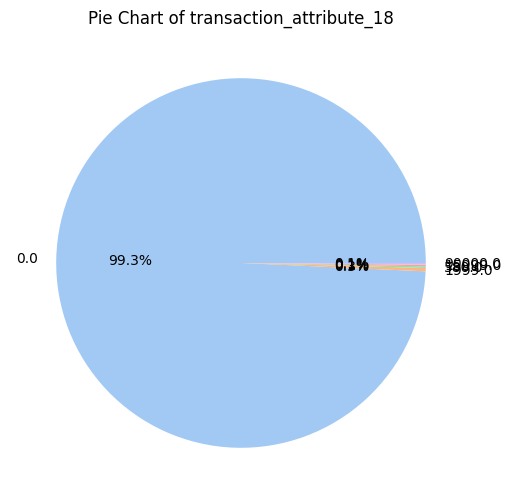

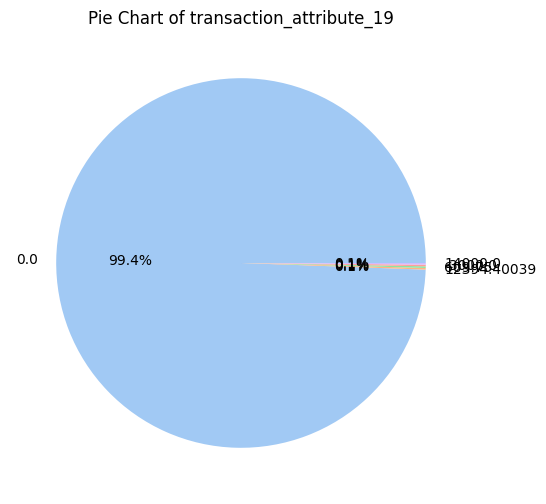

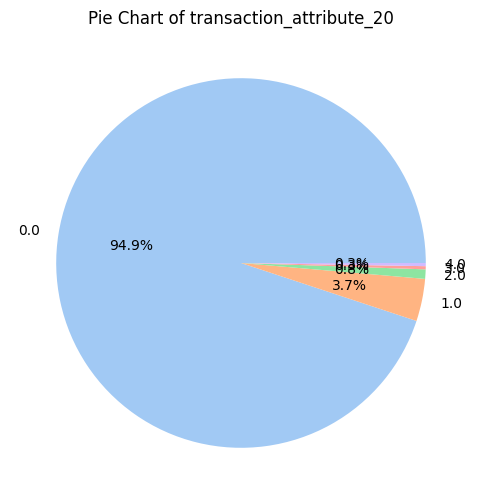

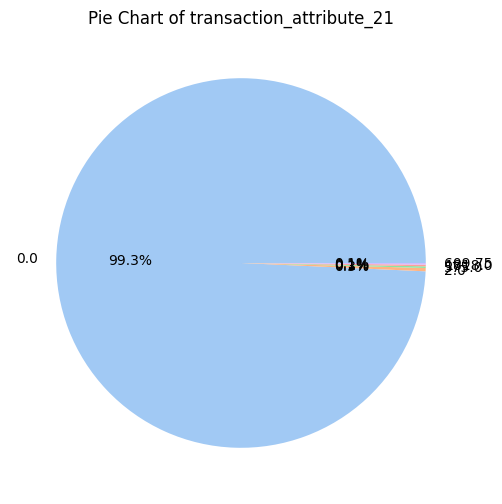

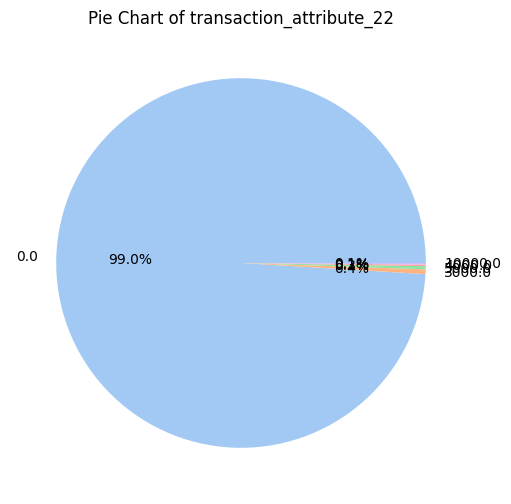

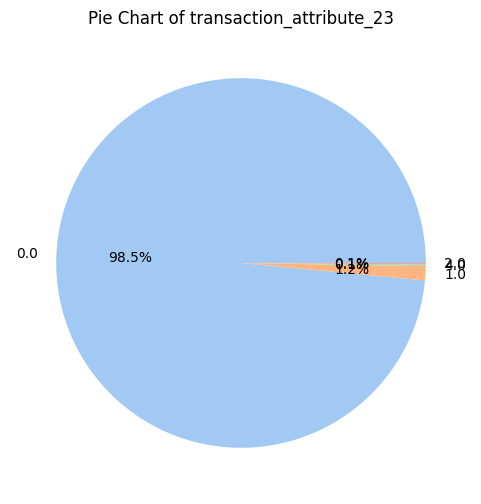

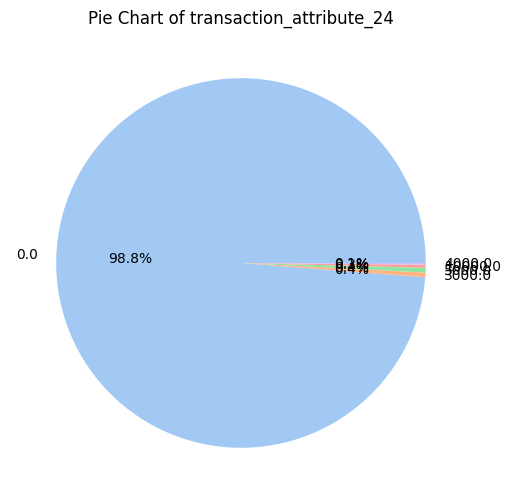

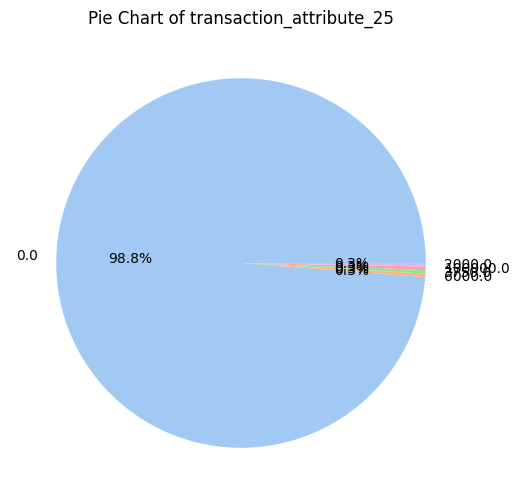

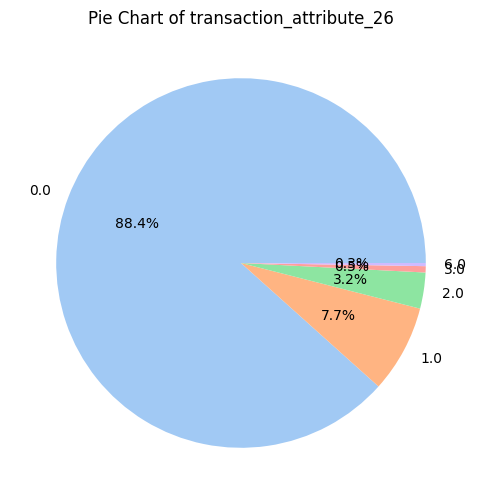

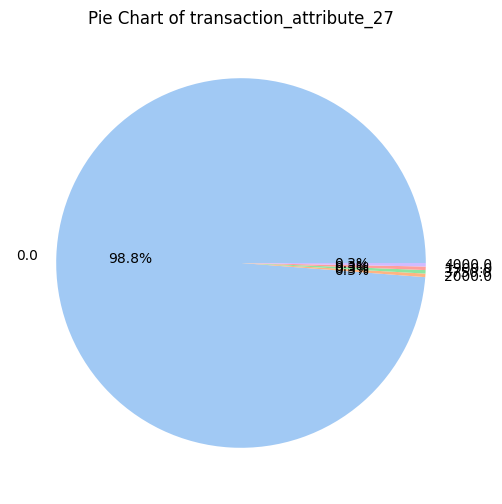

In [28]:
for col in numerical_columns[:30]:
  pie_data = df[col].value_counts().head(5)
  plt.figure(figsize=(6, 6))
  plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
  plt.title(f"Pie Chart of {col}")
  plt.show()

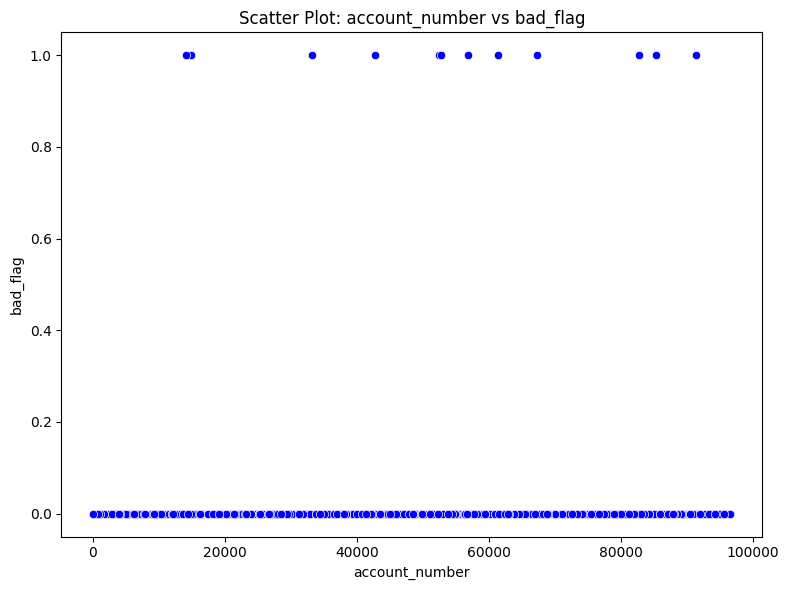

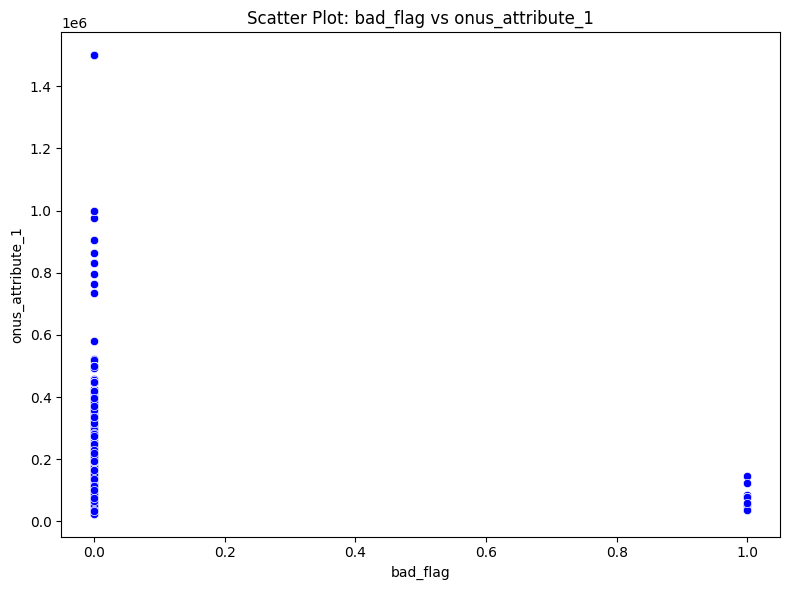

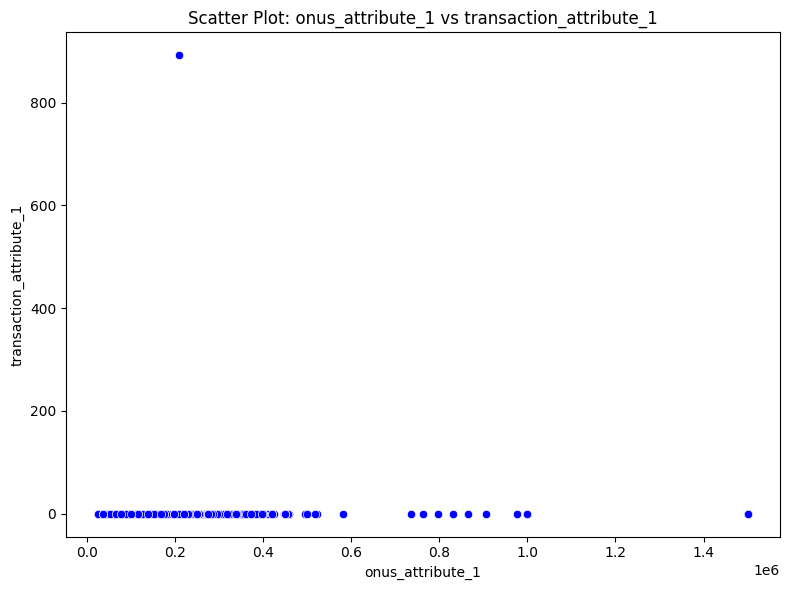

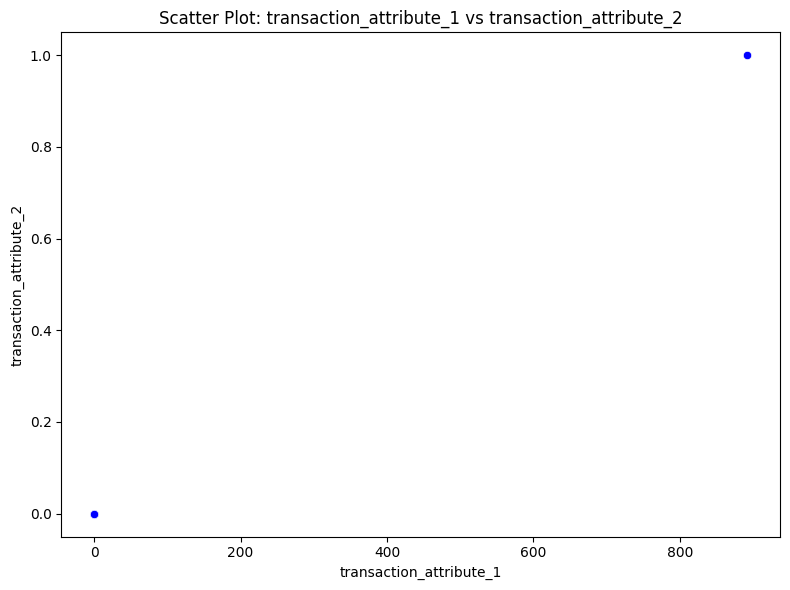

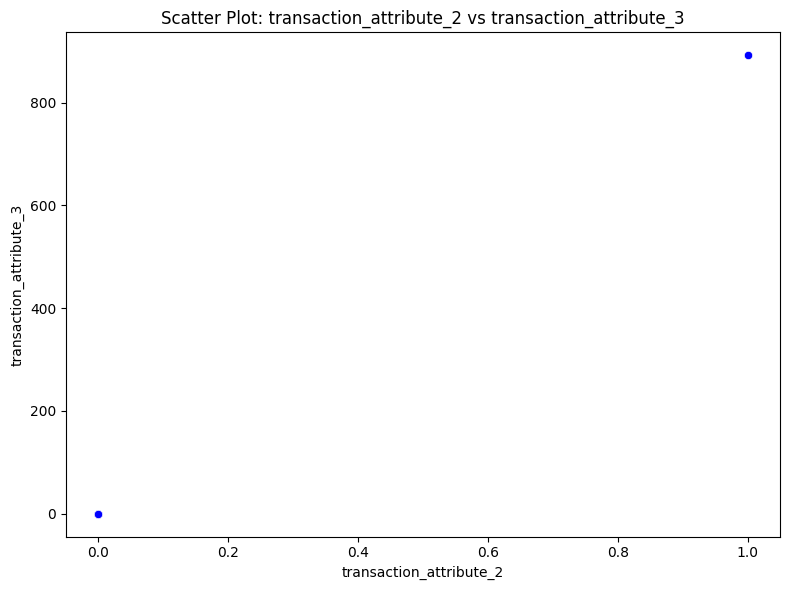

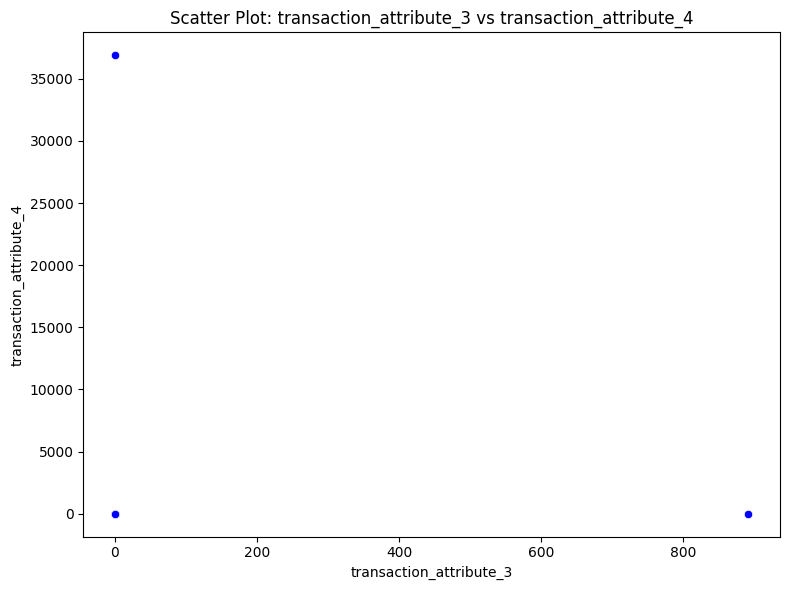

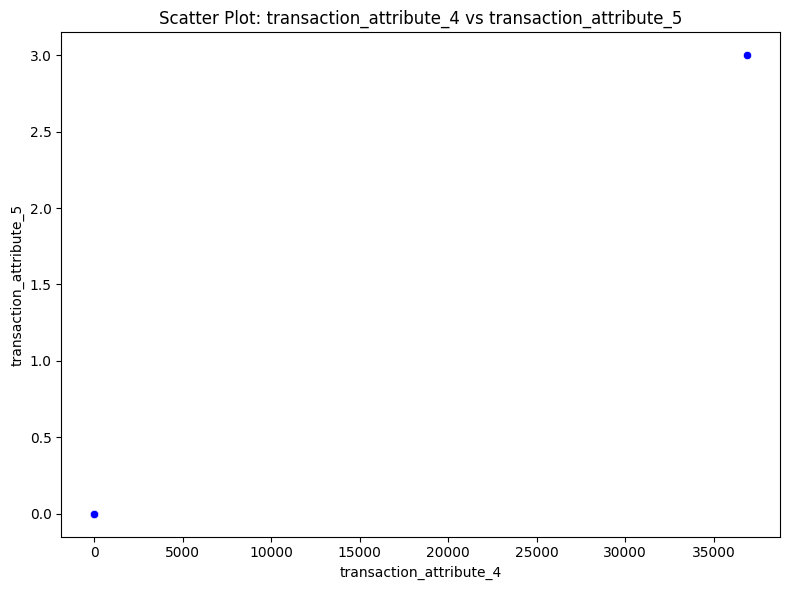

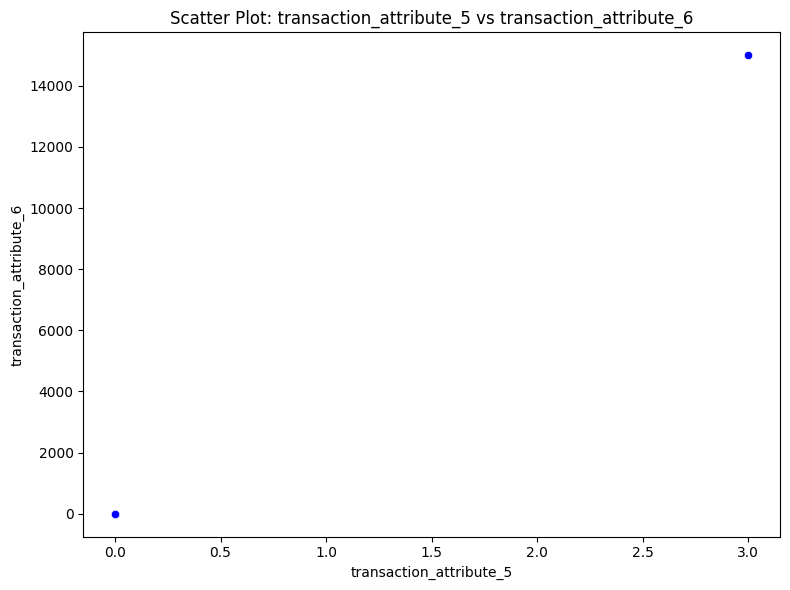

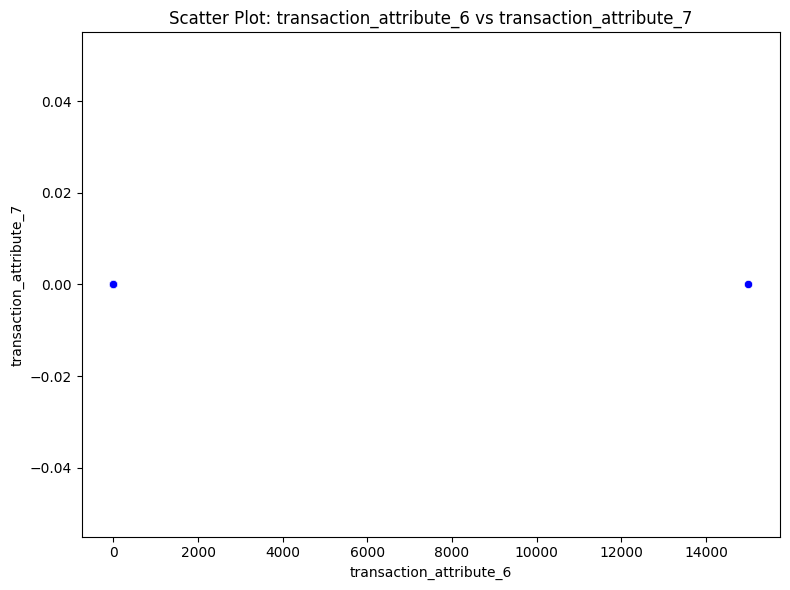

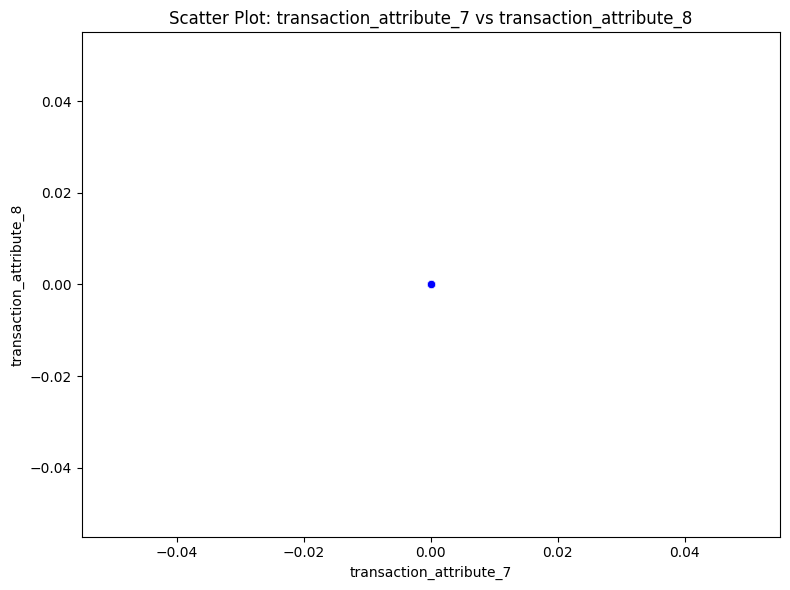

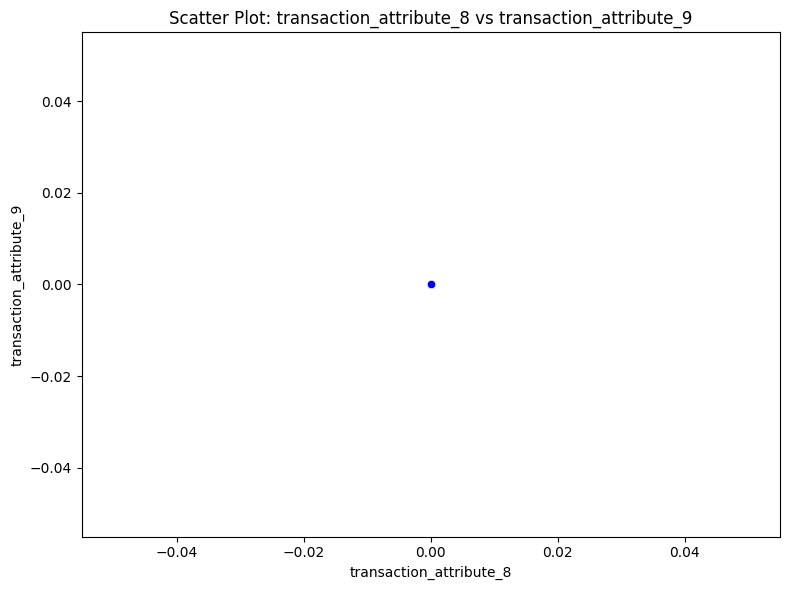

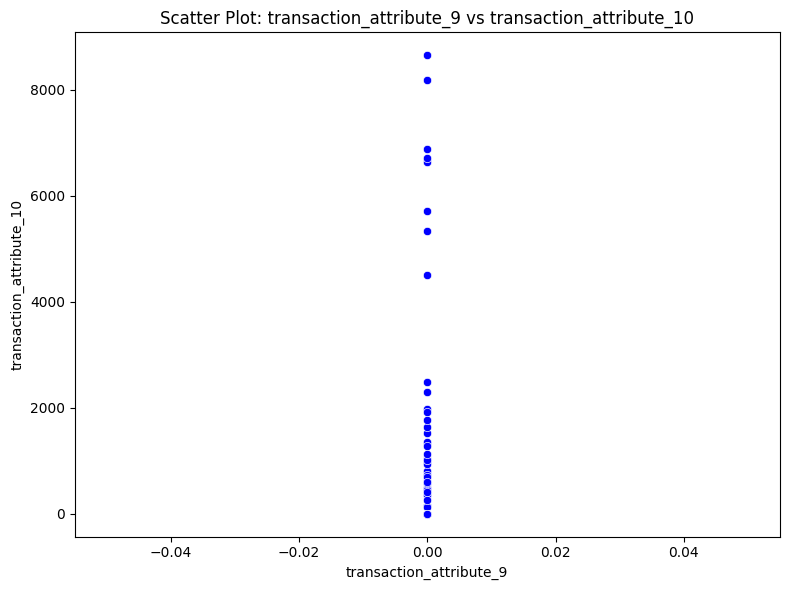

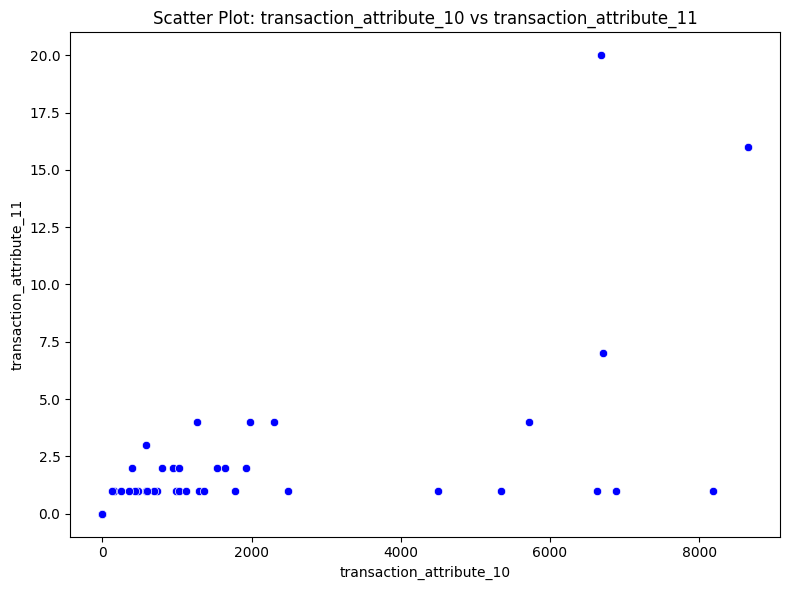

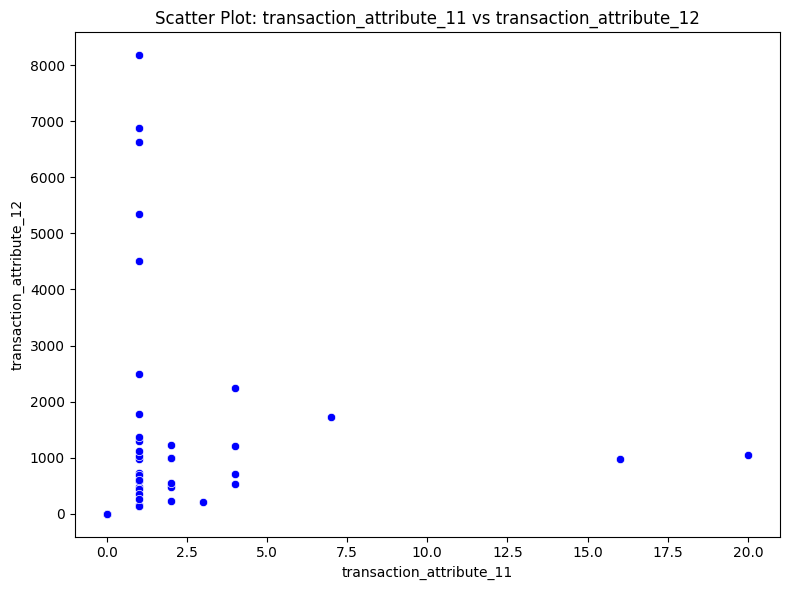

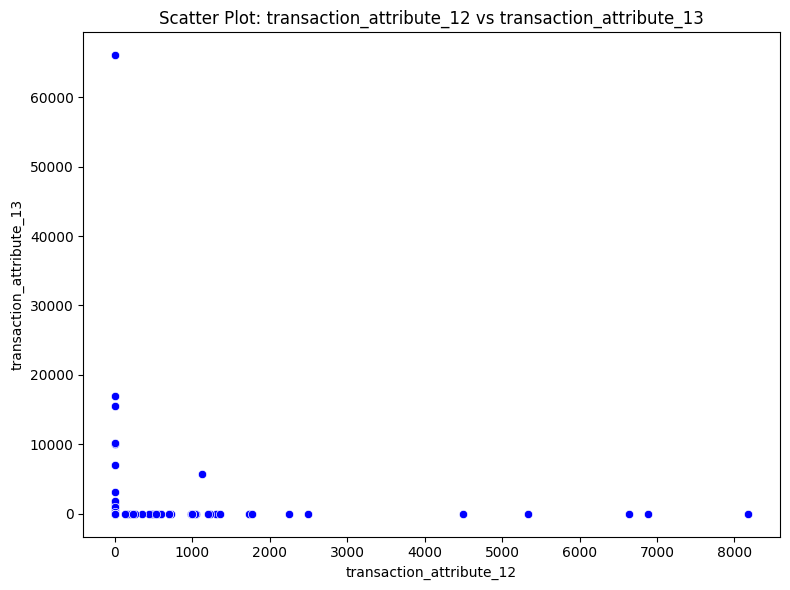

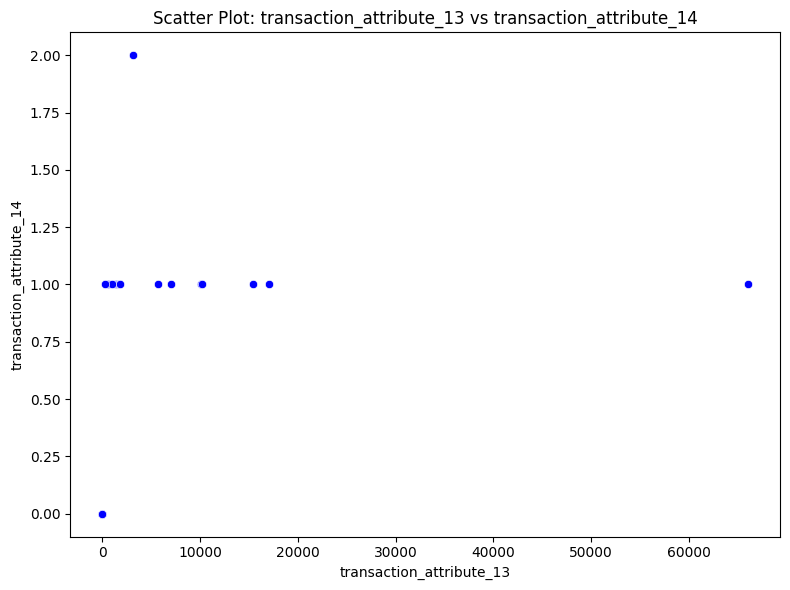

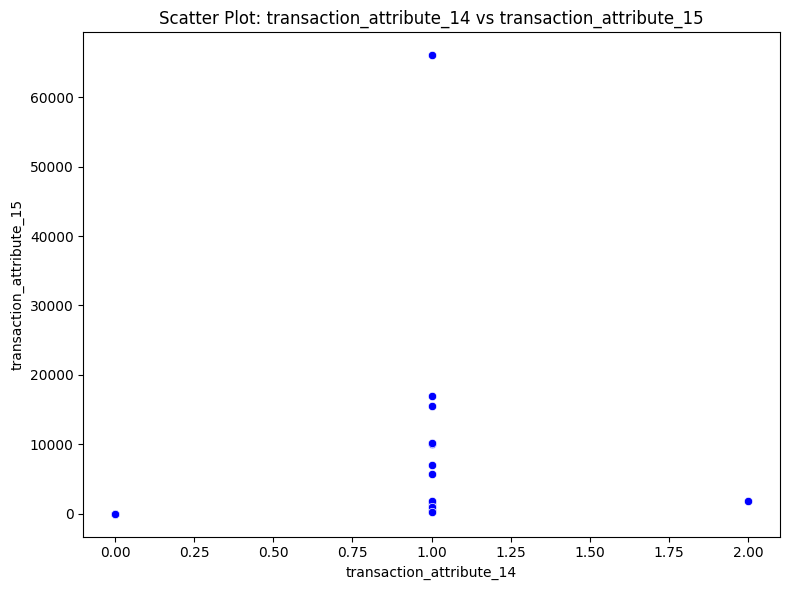

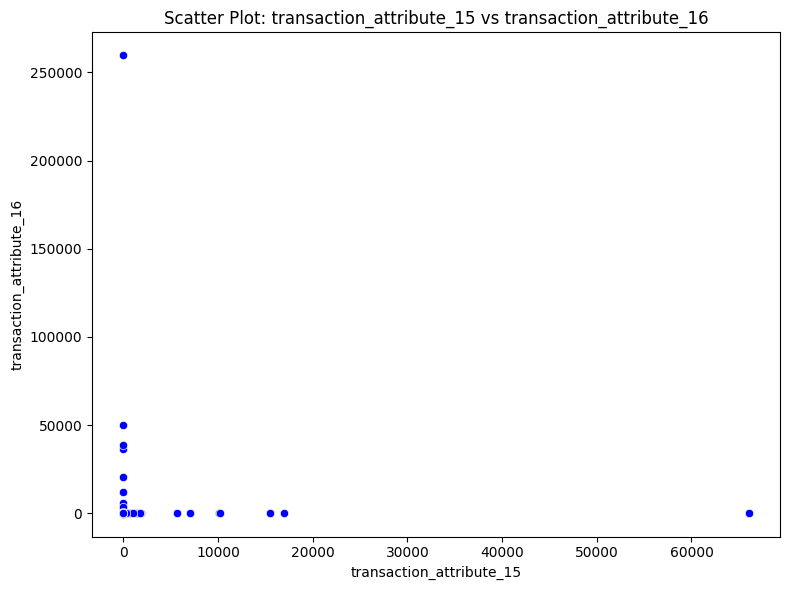

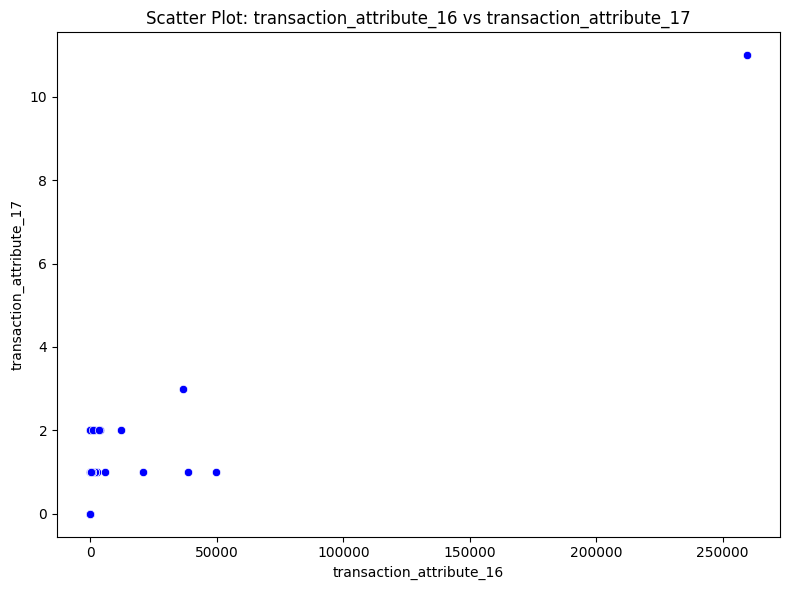

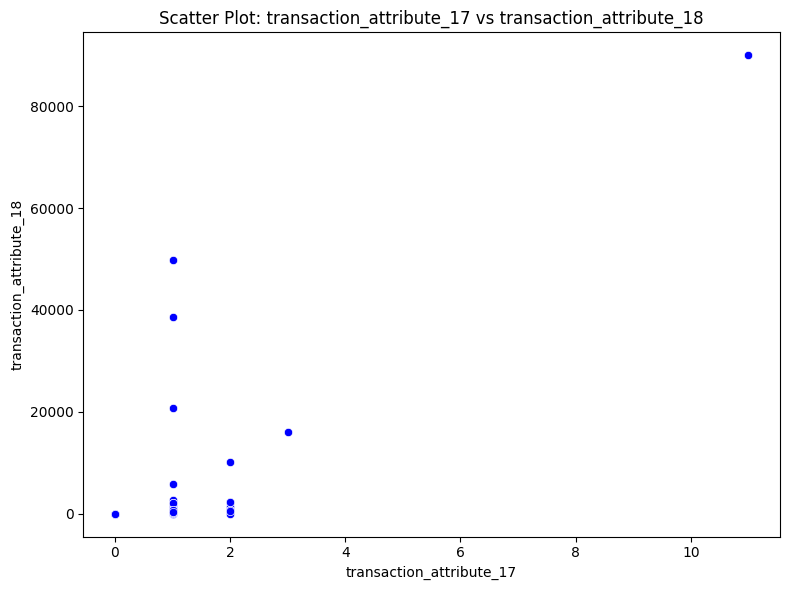

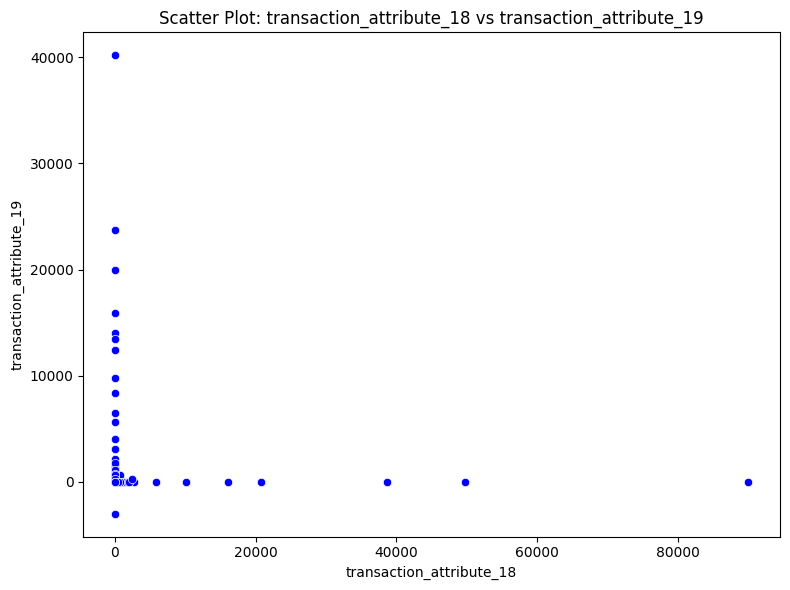

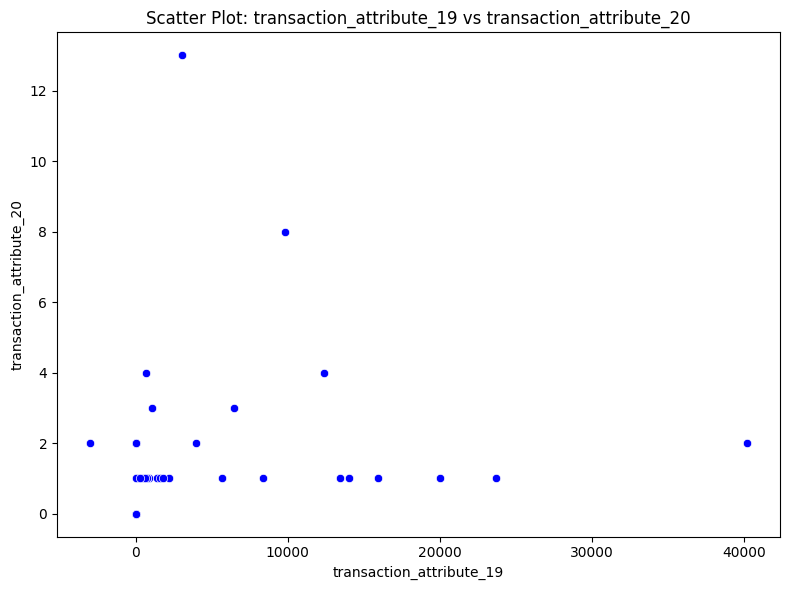

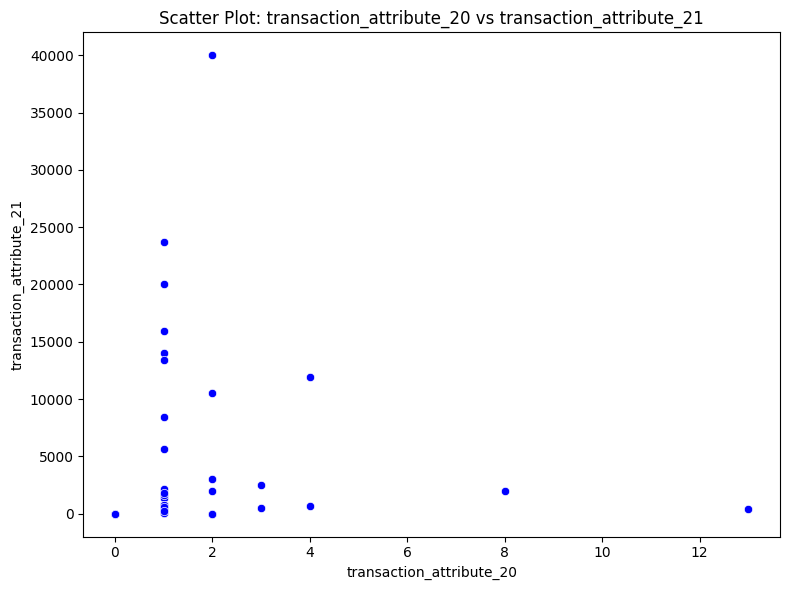

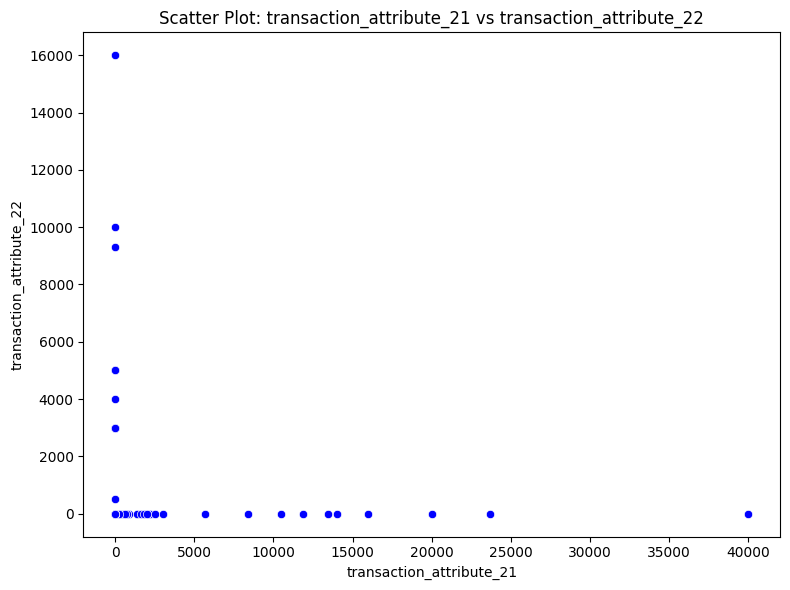

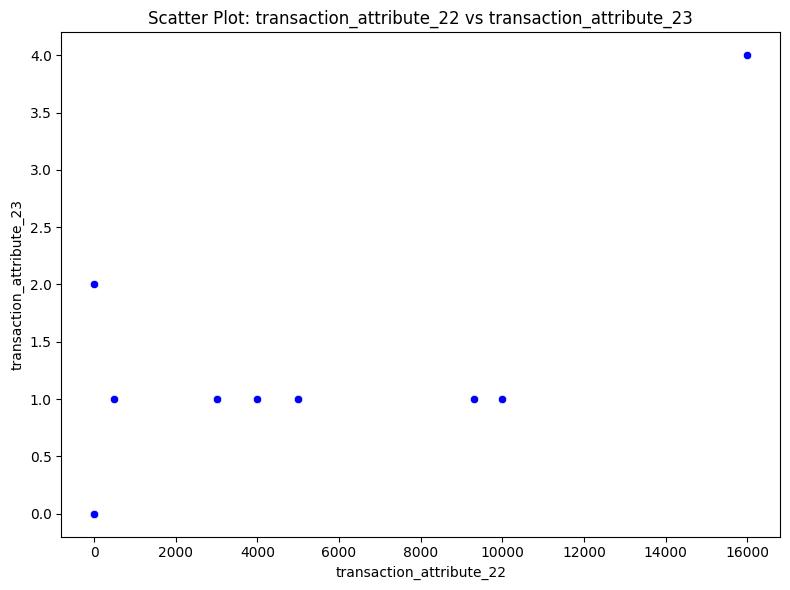

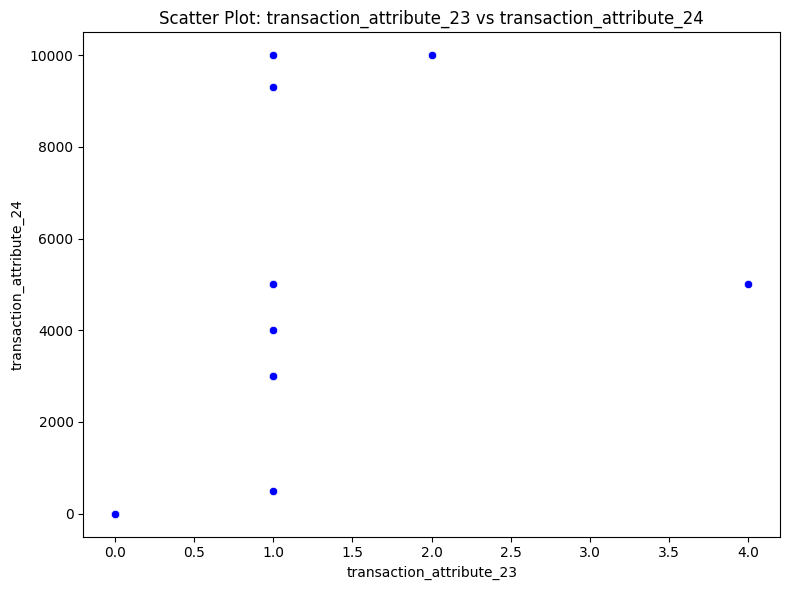

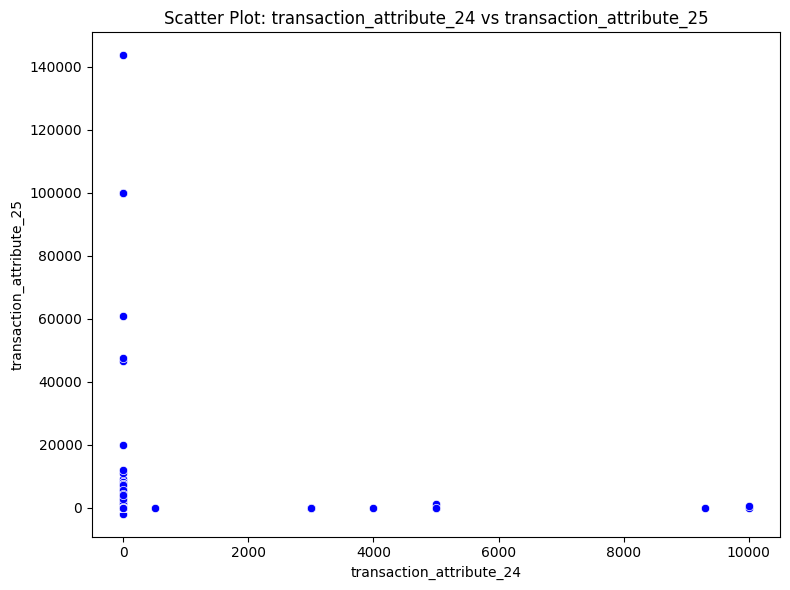

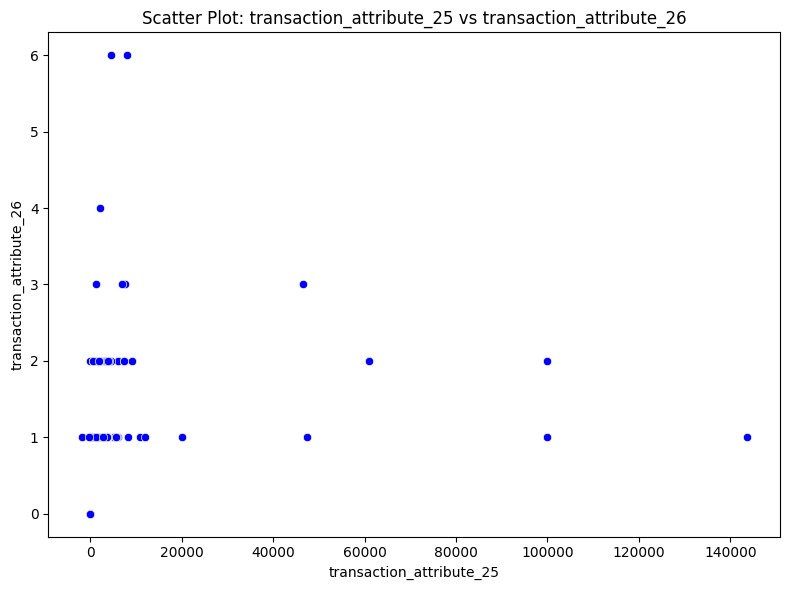

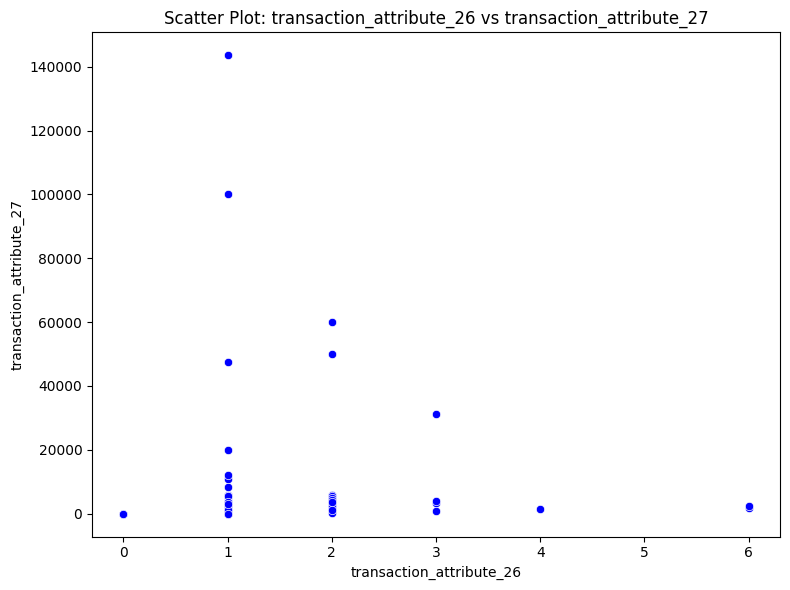

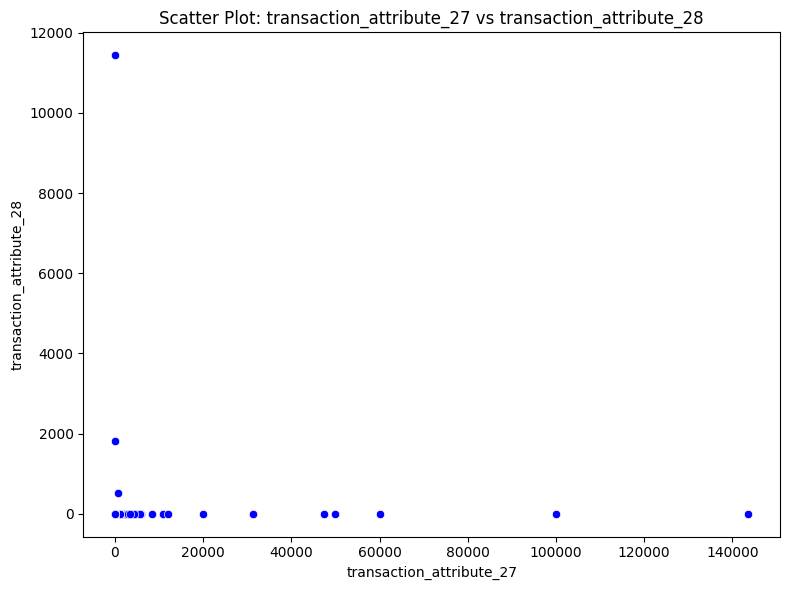

In [29]:
for i in range(30):
  x_col = numerical_columns[i]
  y_col = numerical_columns[(i + 1) % len(numerical_columns)]
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=df[x_col], y=df[y_col], color="blue")
  save_or_show_plot(plt, f"Scatter Plot: {x_col} vs {y_col}")

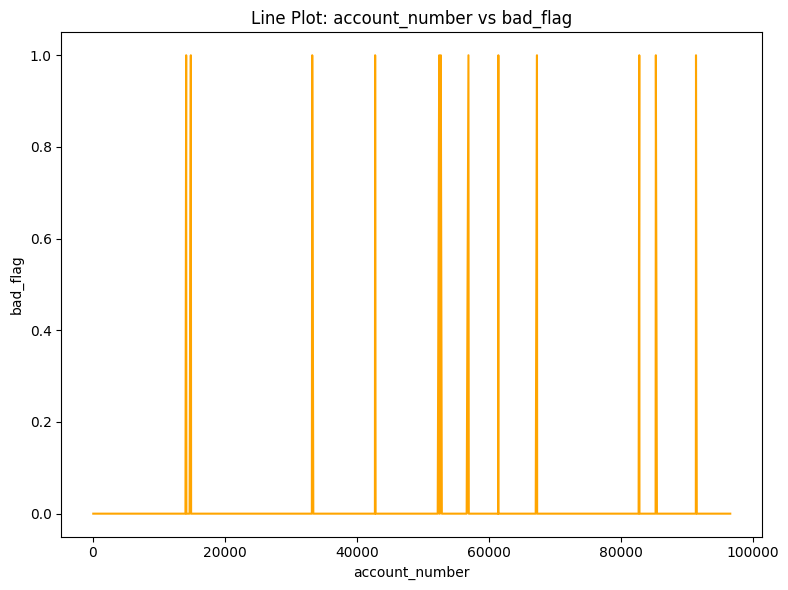

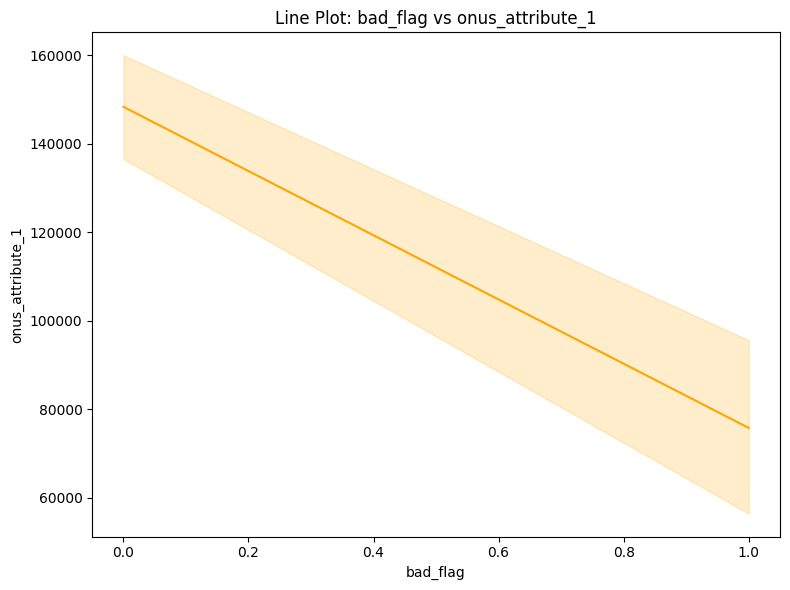

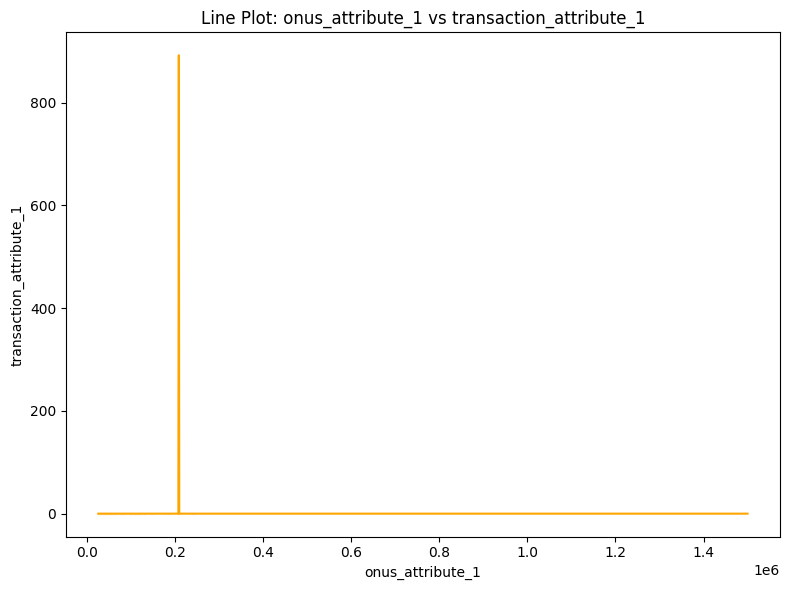

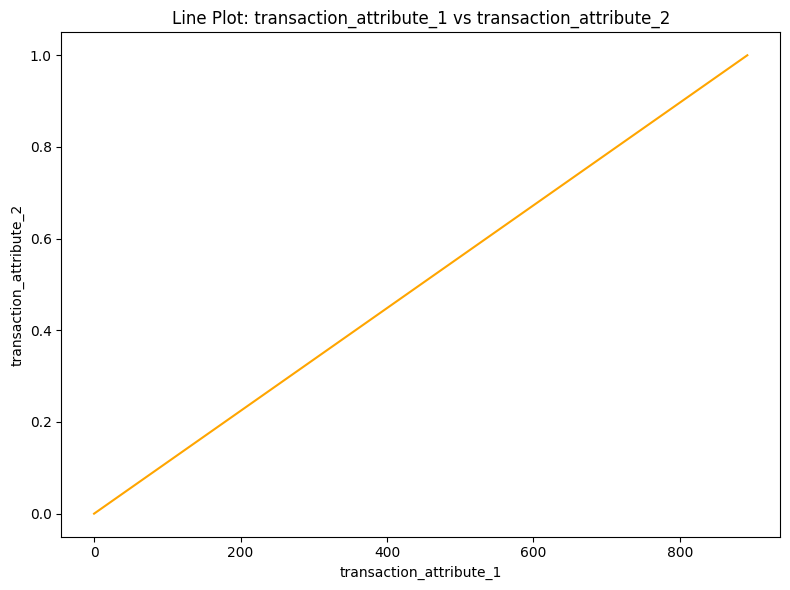

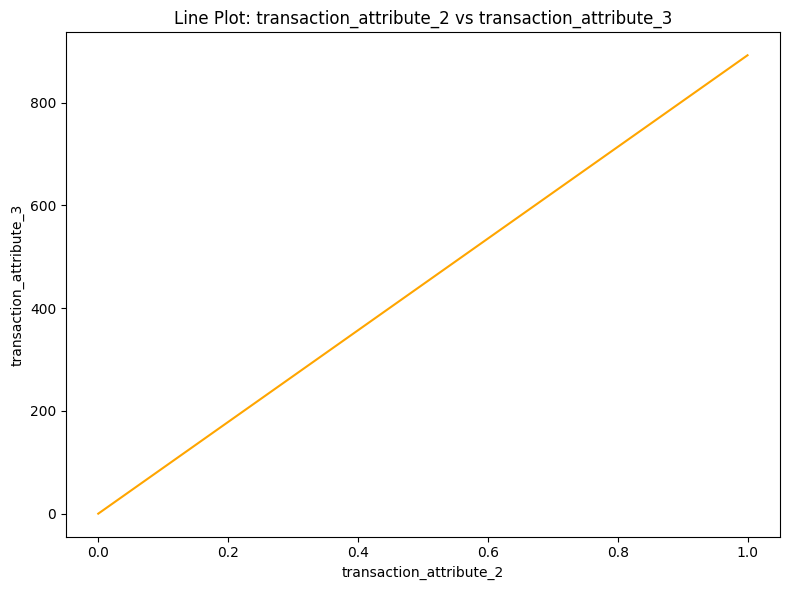

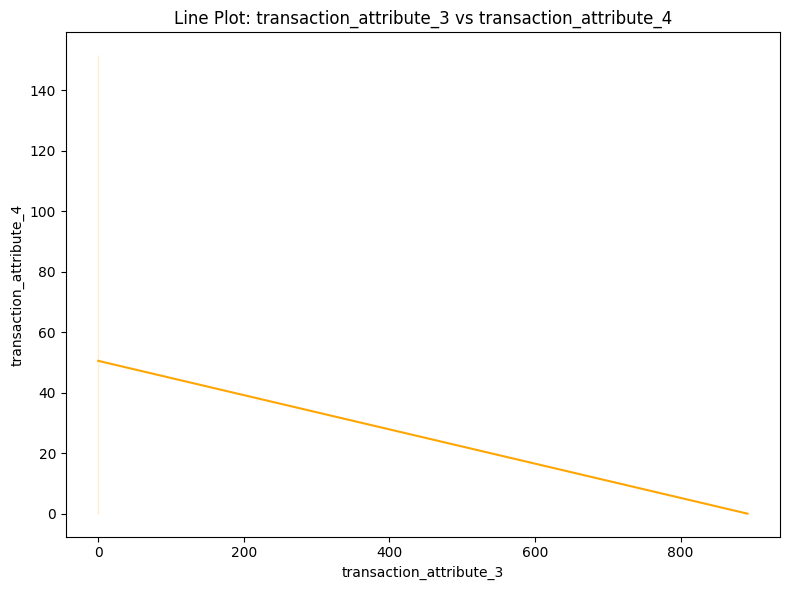

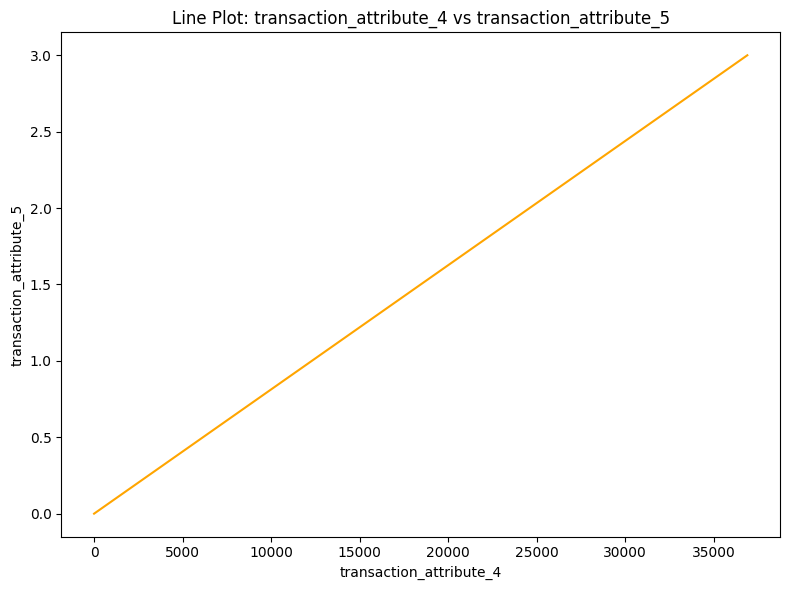

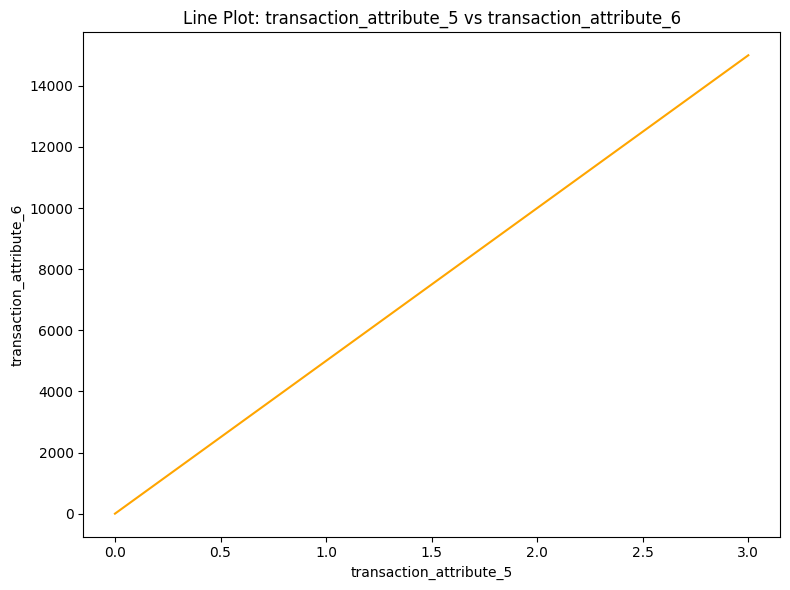

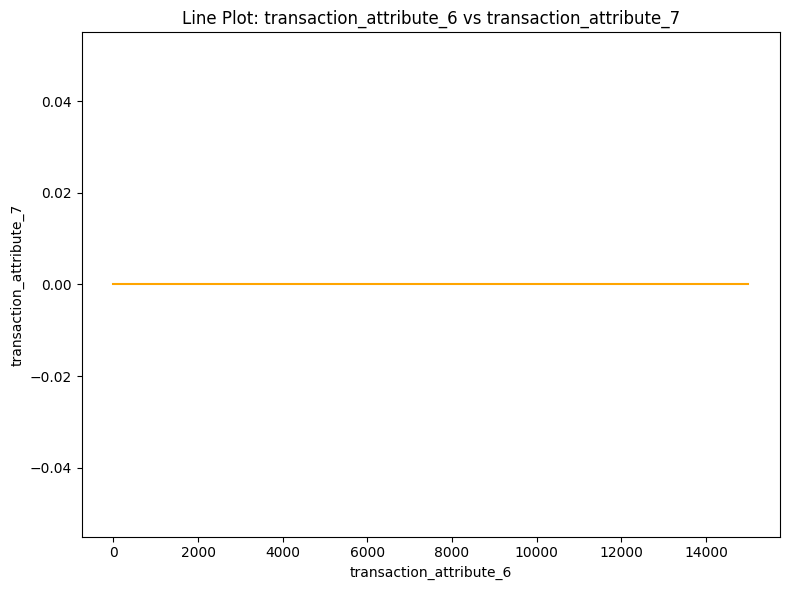

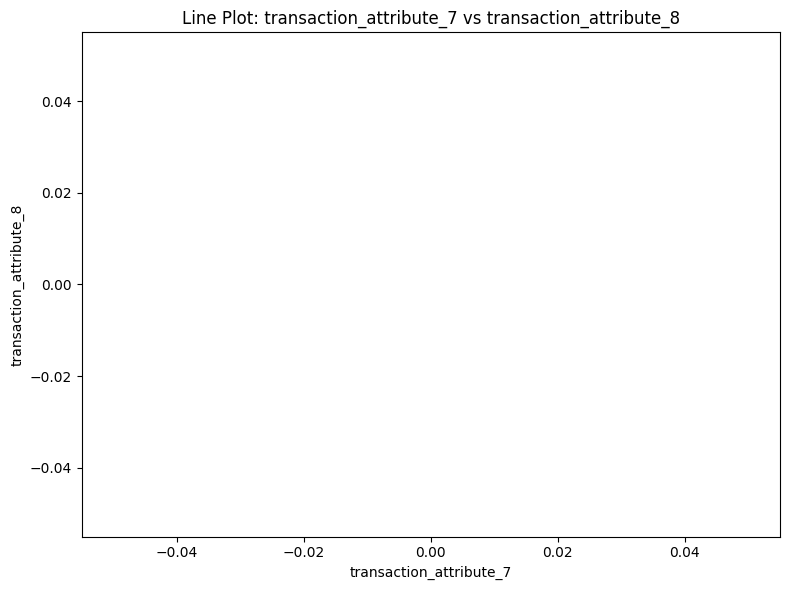

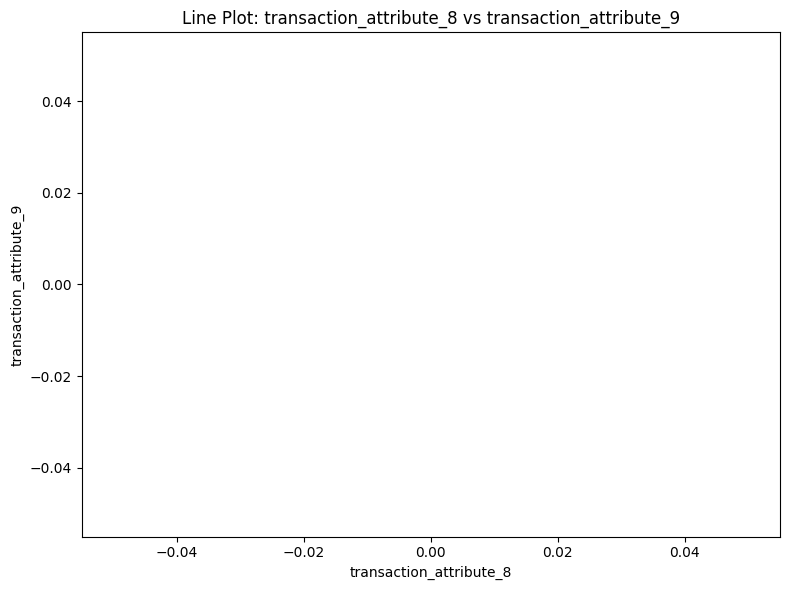

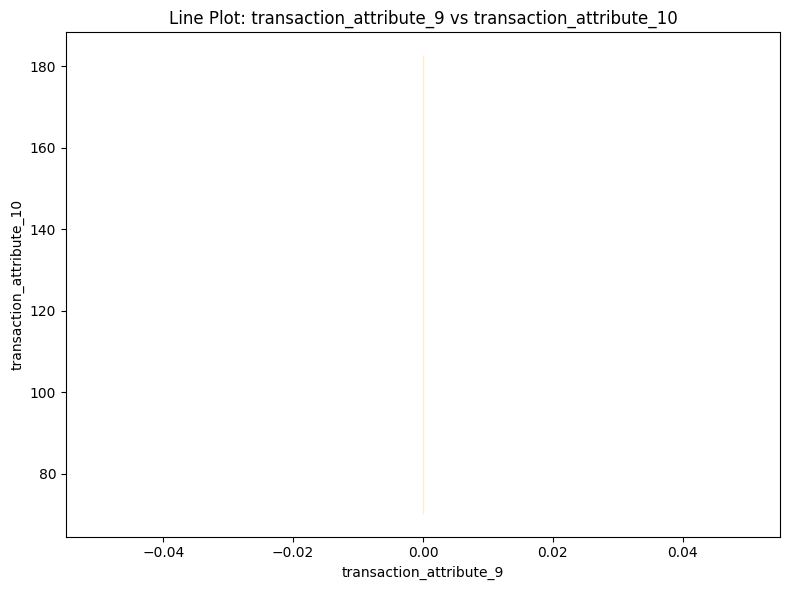

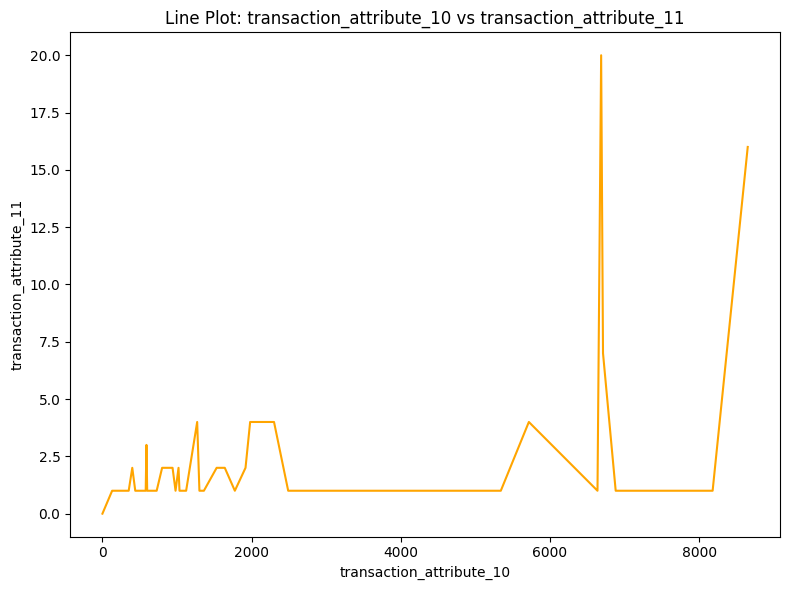

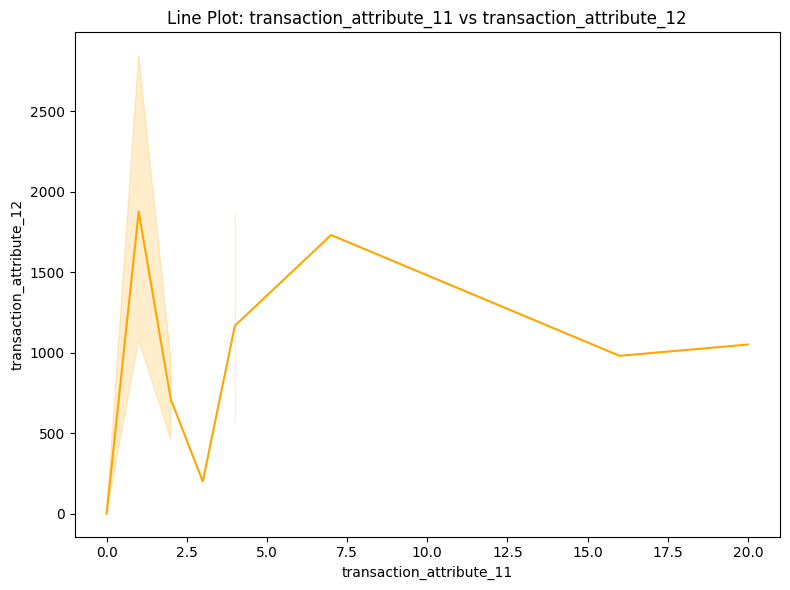

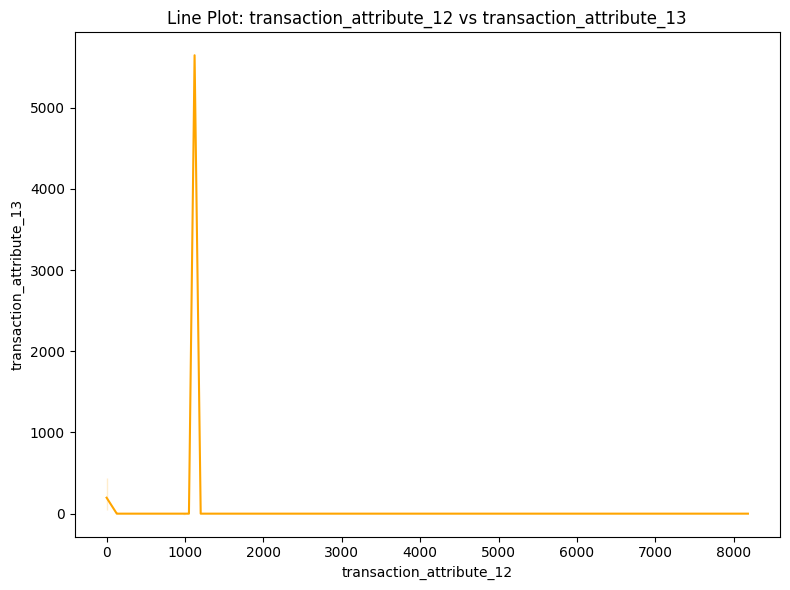

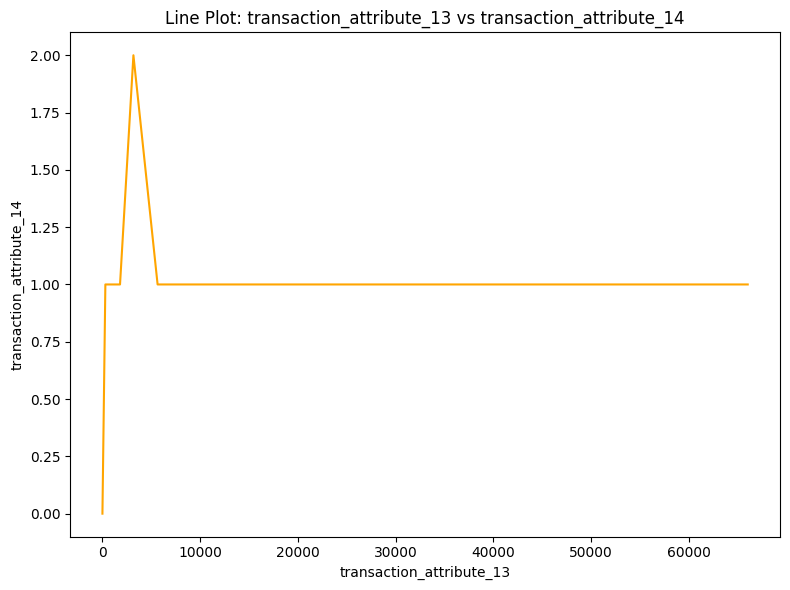

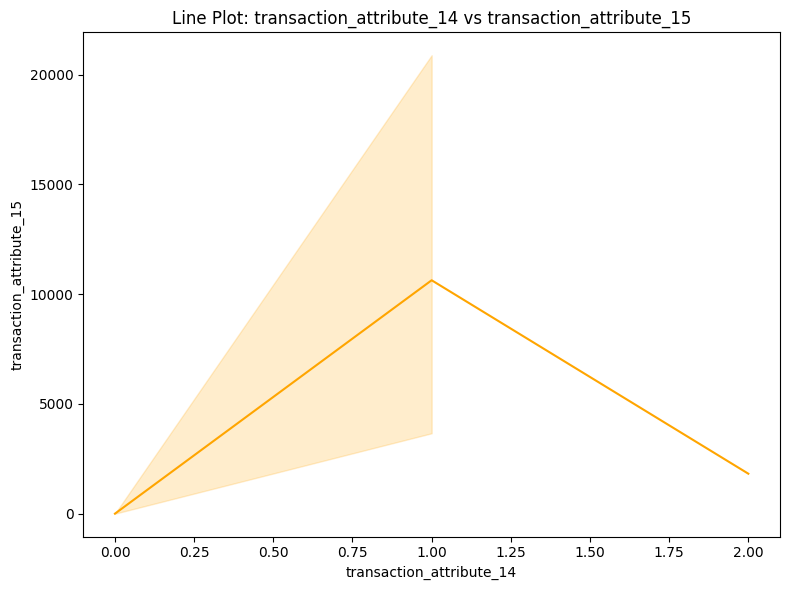

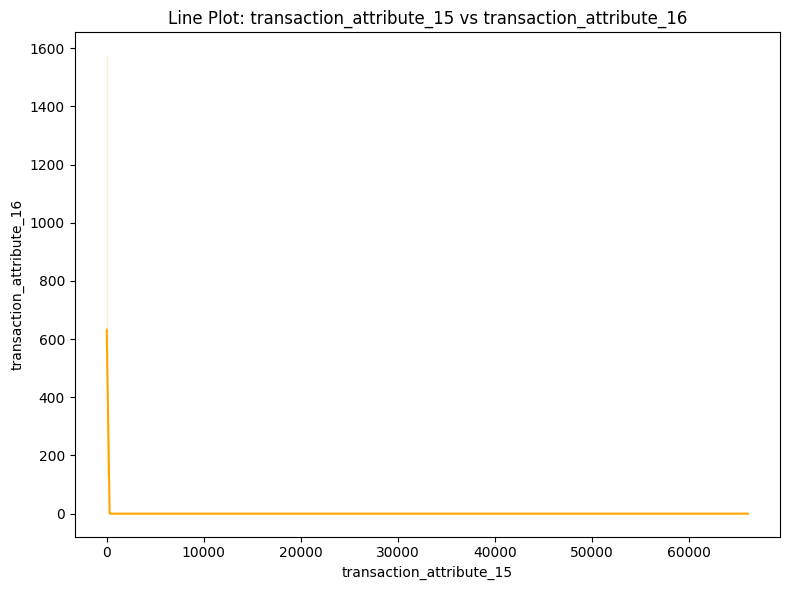

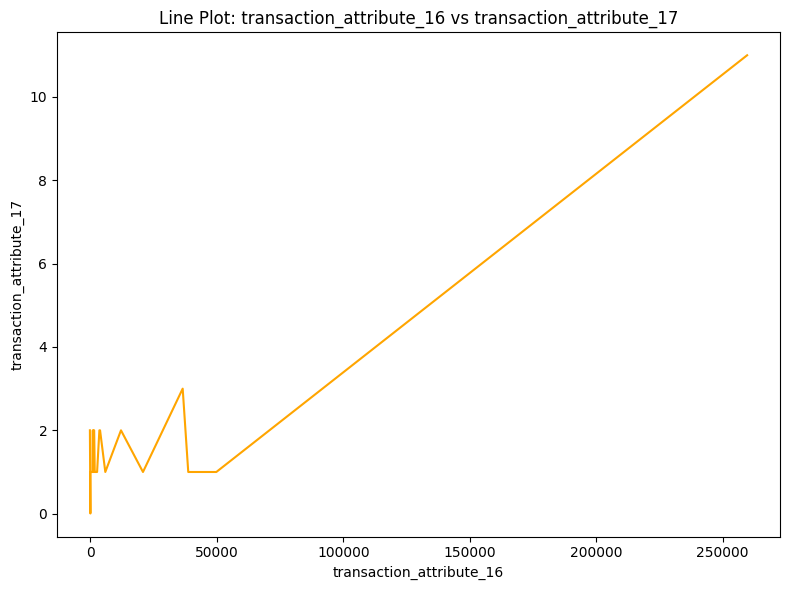

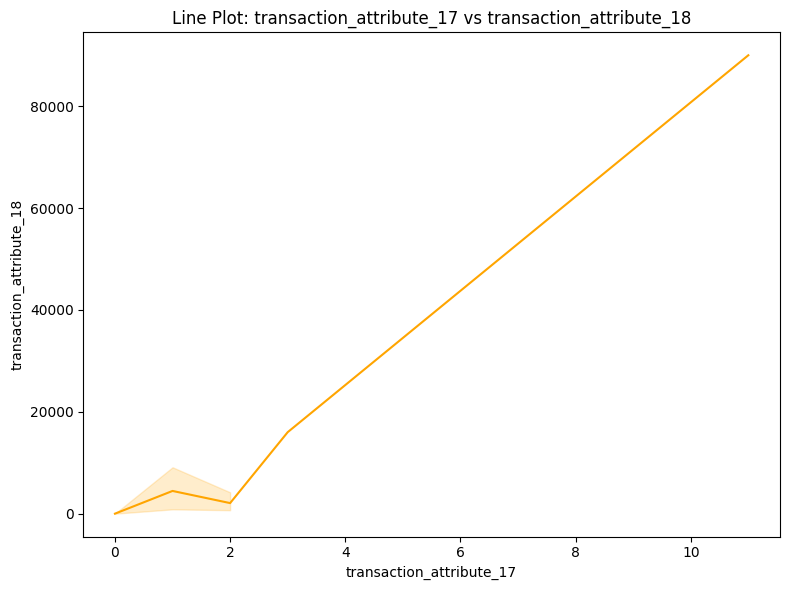

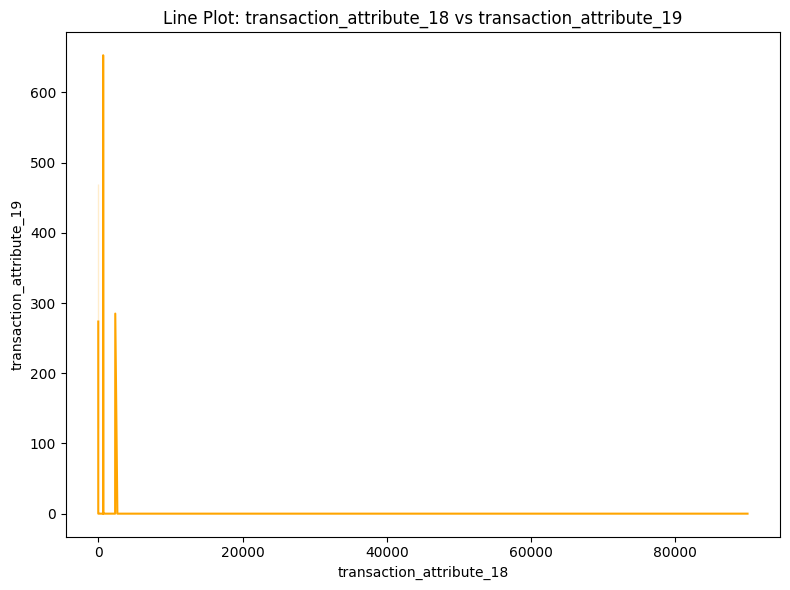

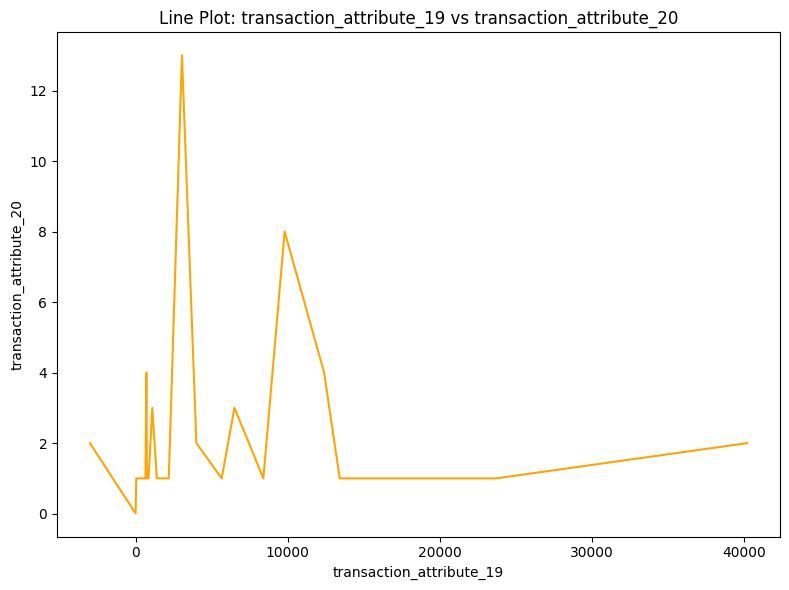

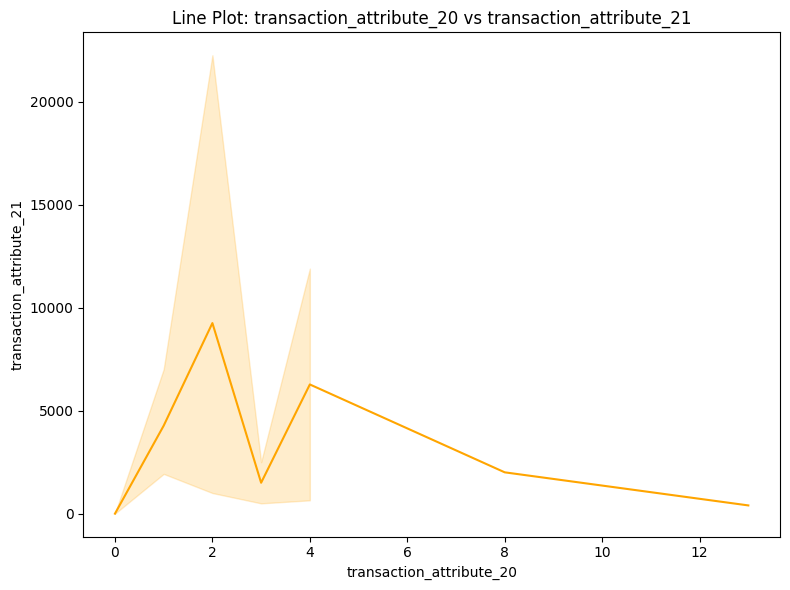

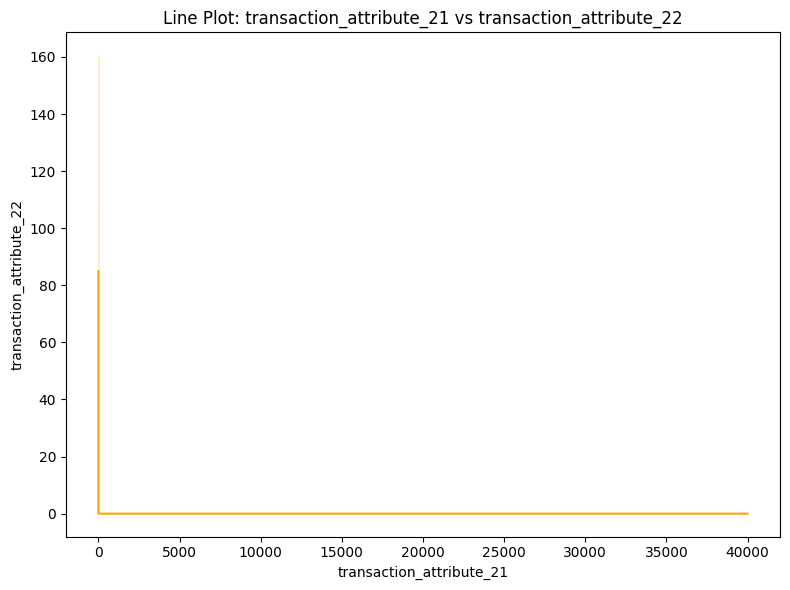

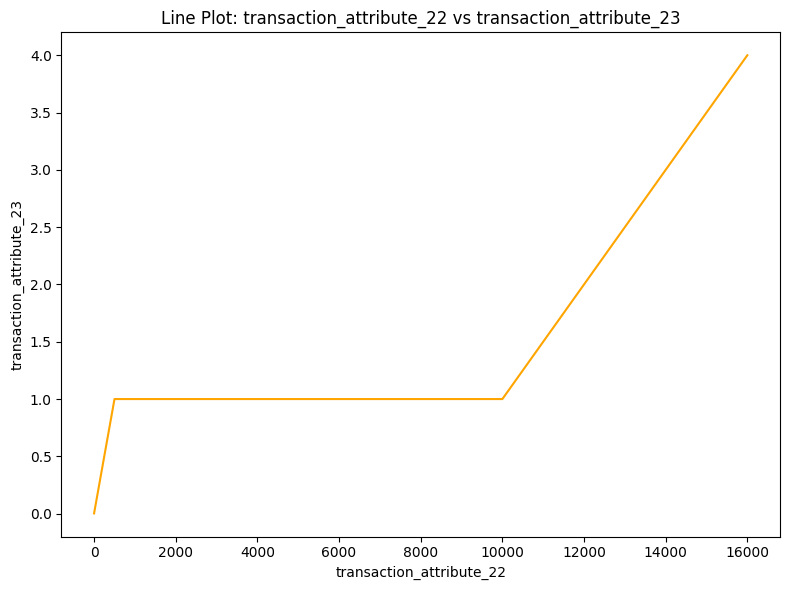

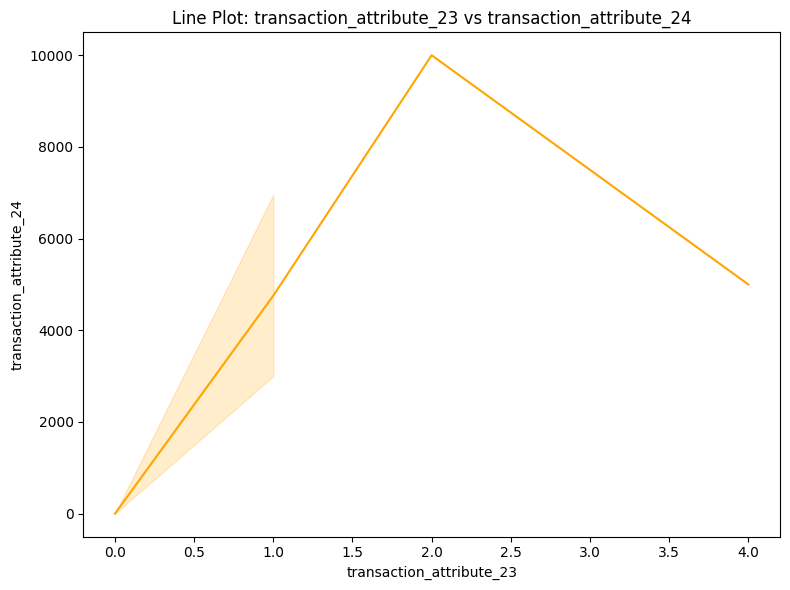

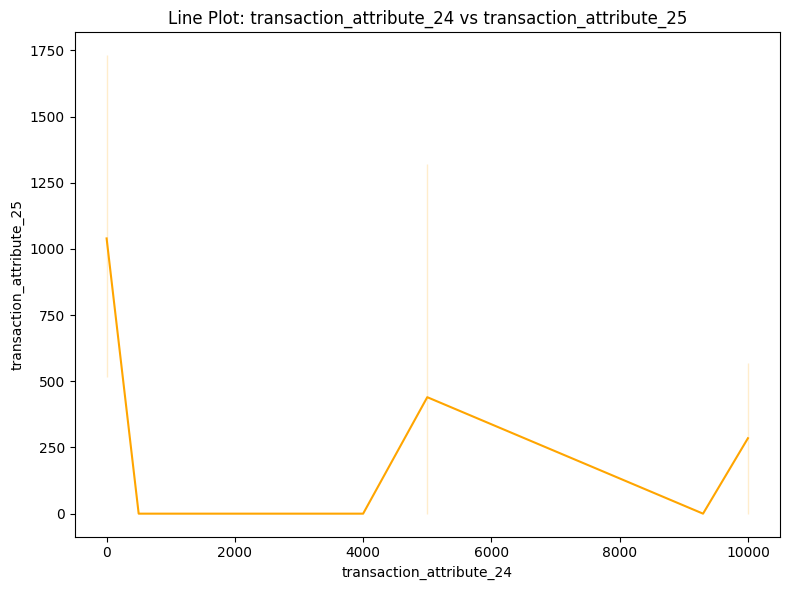

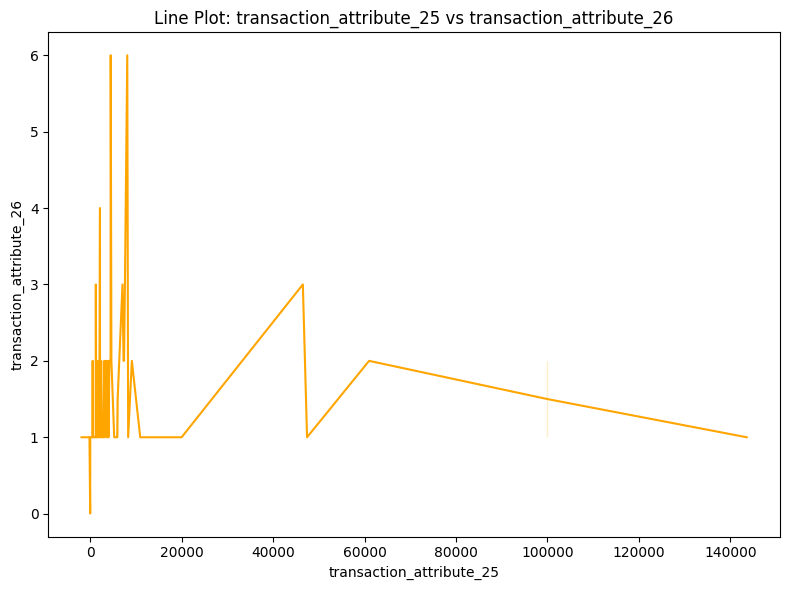

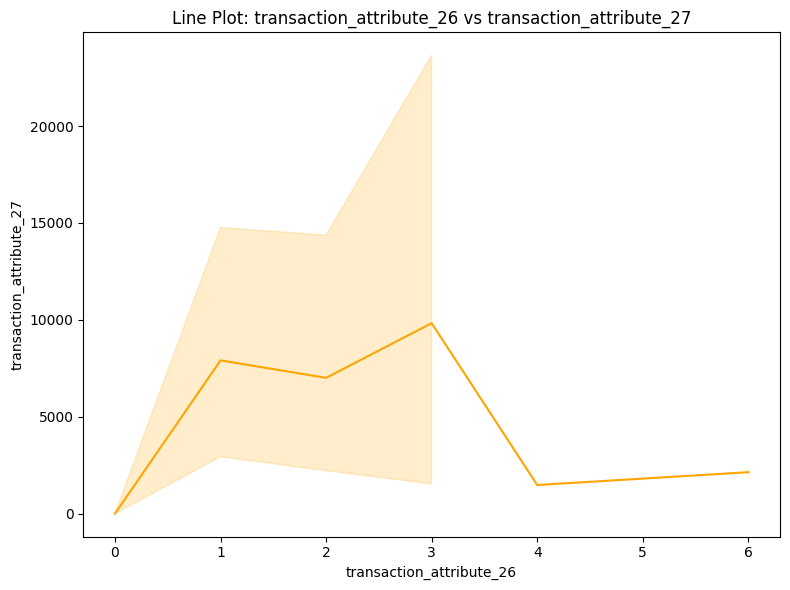

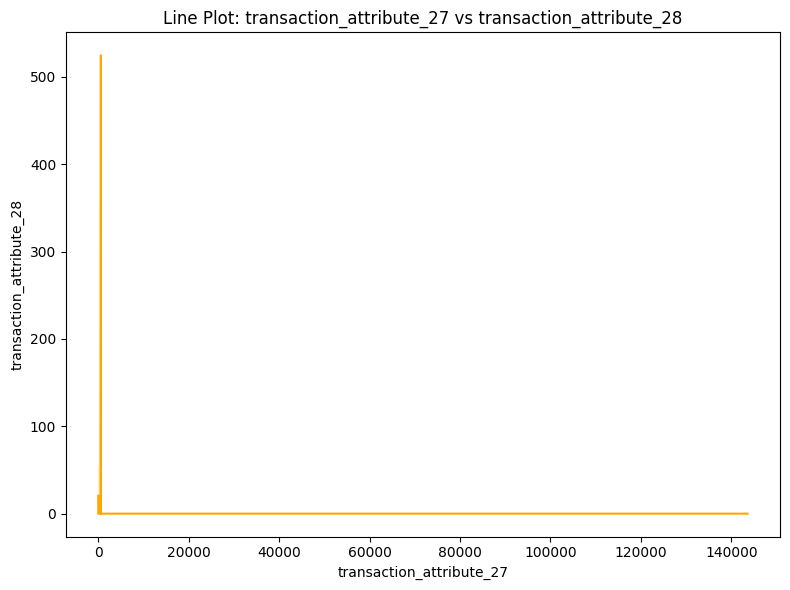

In [31]:
for i in range(30):
  x_col = numerical_columns[i]
  y_col = numerical_columns[(i + 1) % len(numerical_columns)]
  plt.figure(figsize=(8, 6))
  sns.lineplot(x=df[x_col], y=df[y_col], color="orange")
  save_or_show_plot(plt, f"Line Plot: {x_col} vs {y_col}")

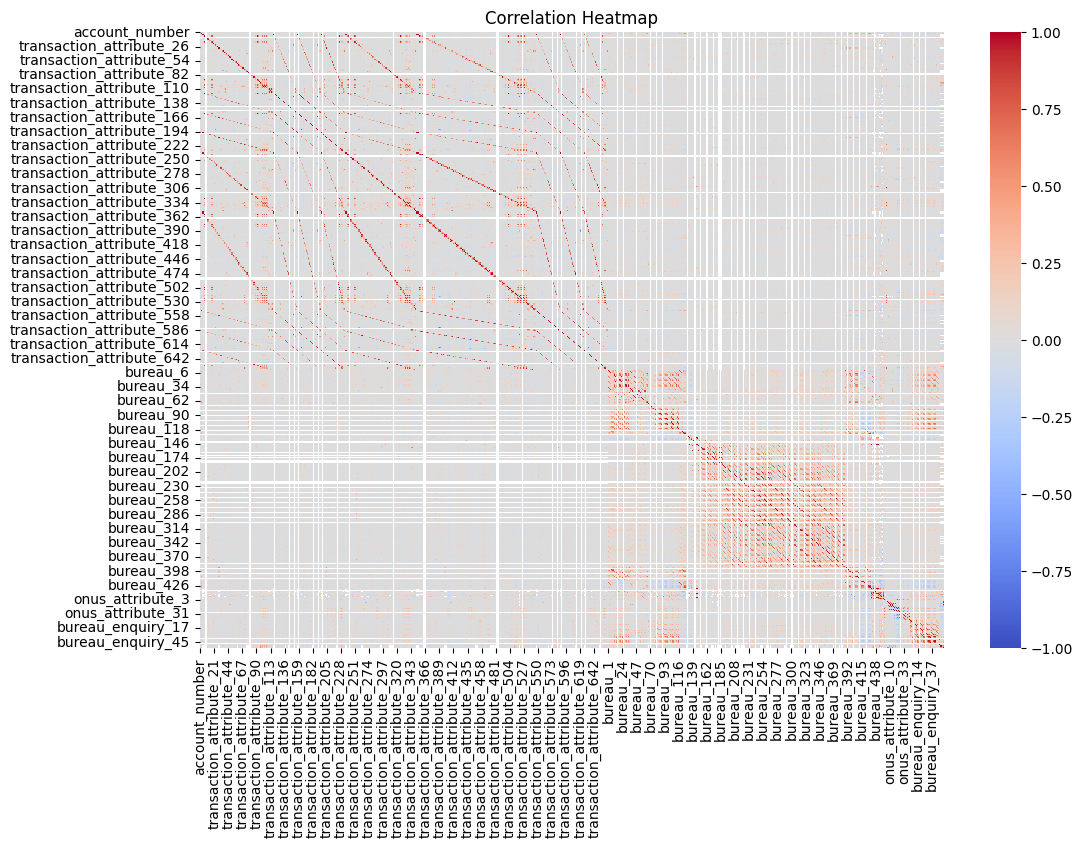

In [32]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

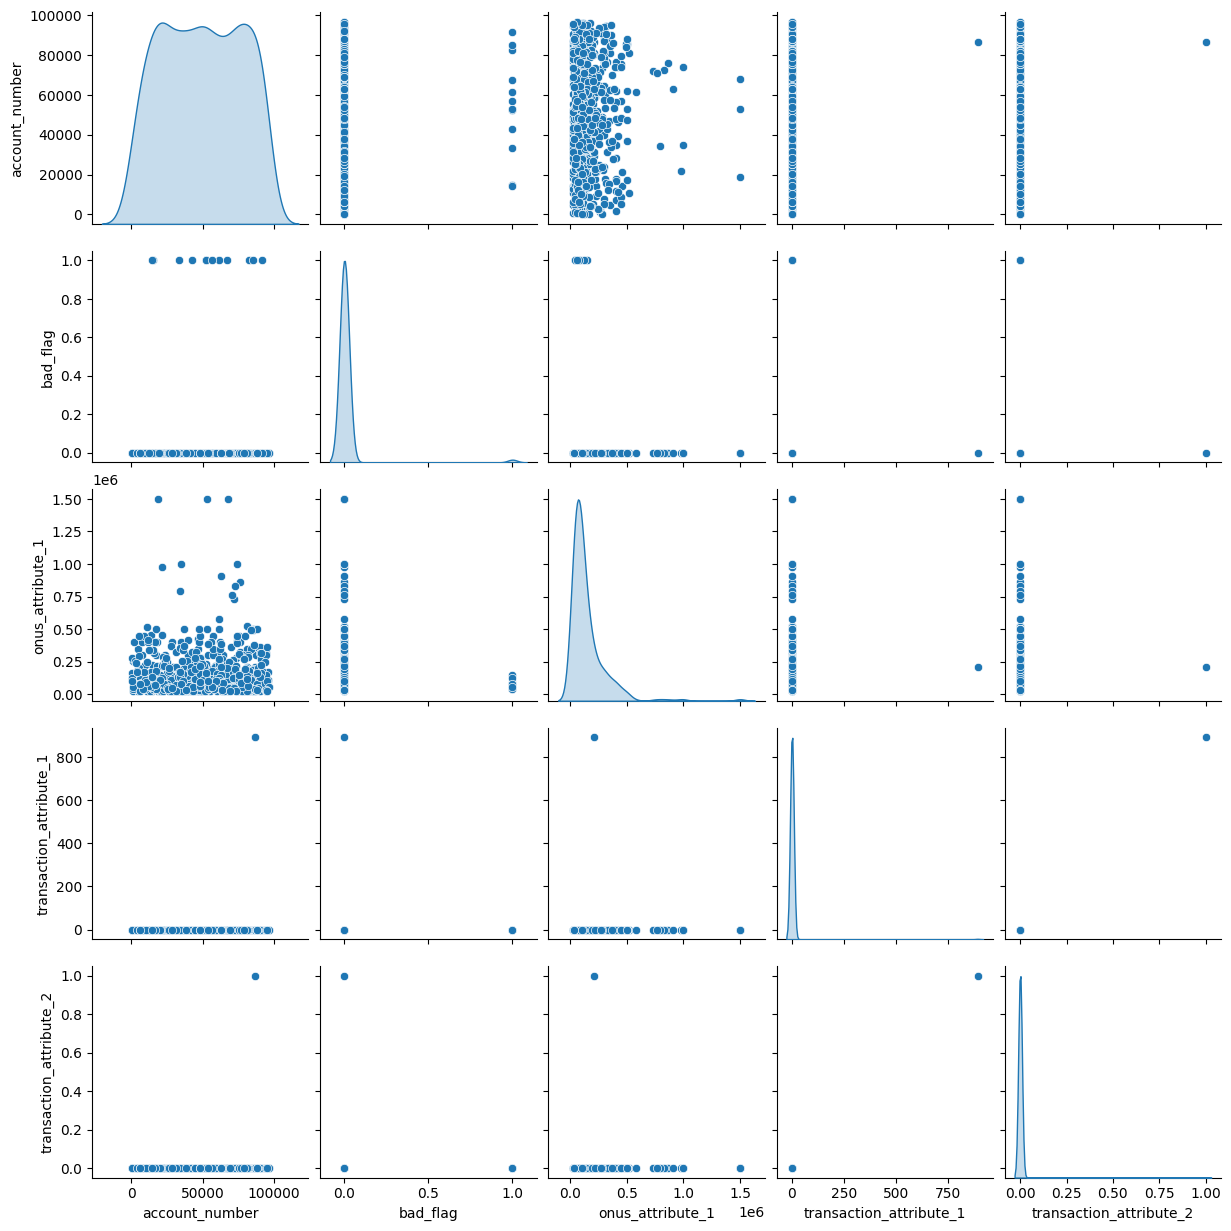

In [33]:
sns.pairplot(df[numerical_columns[:5]], diag_kind="kde", palette="husl")
plt.show()

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


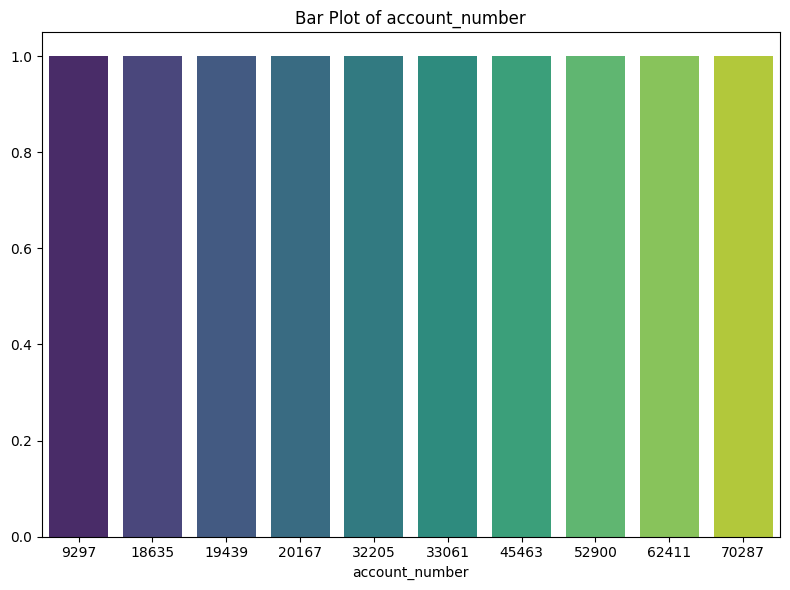

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


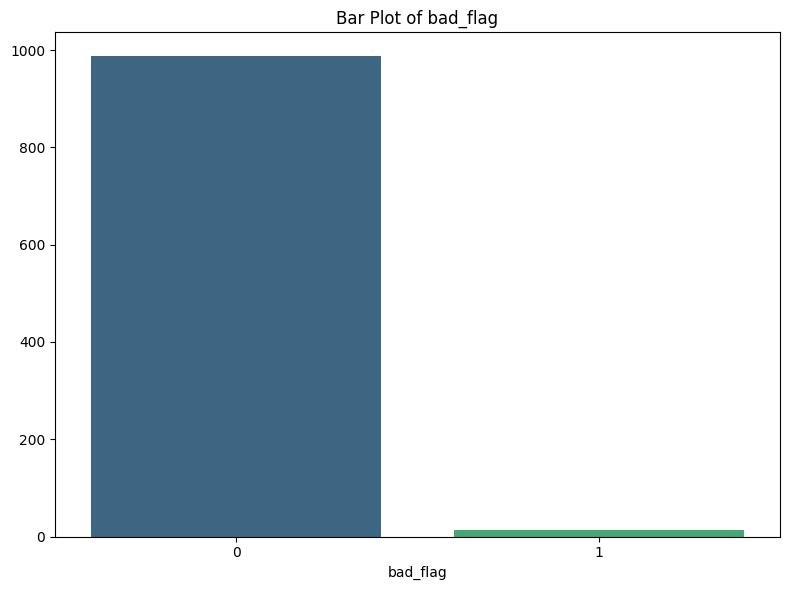

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


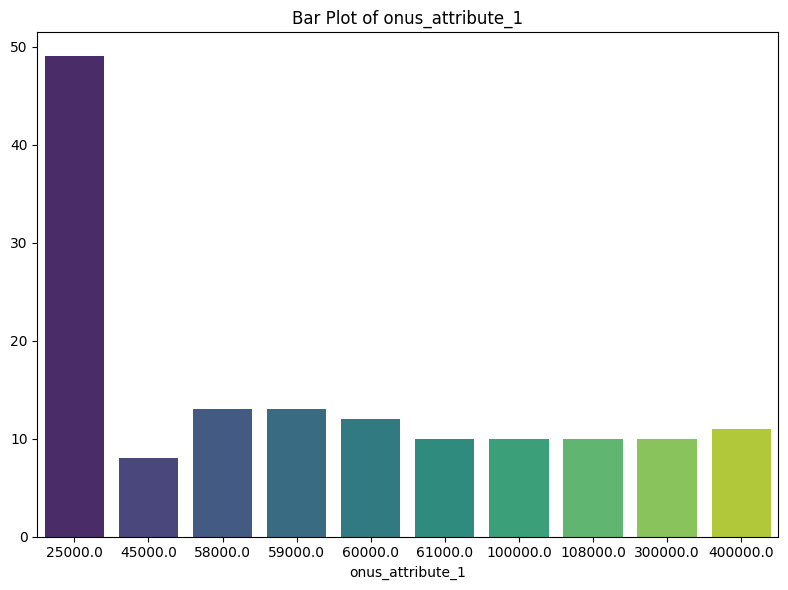

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


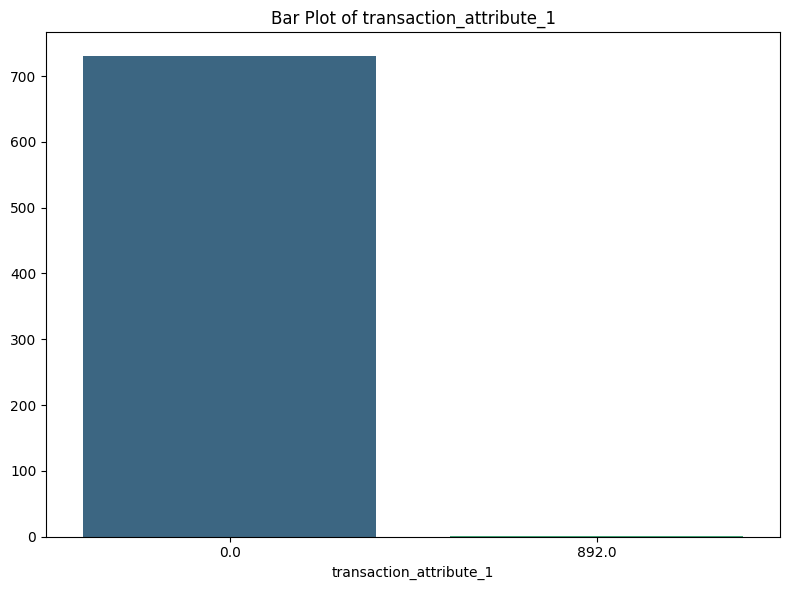

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


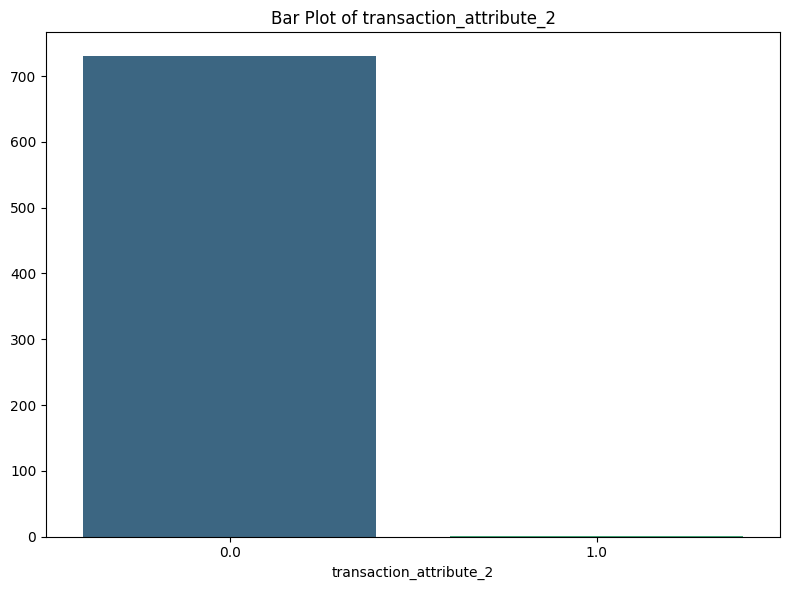

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


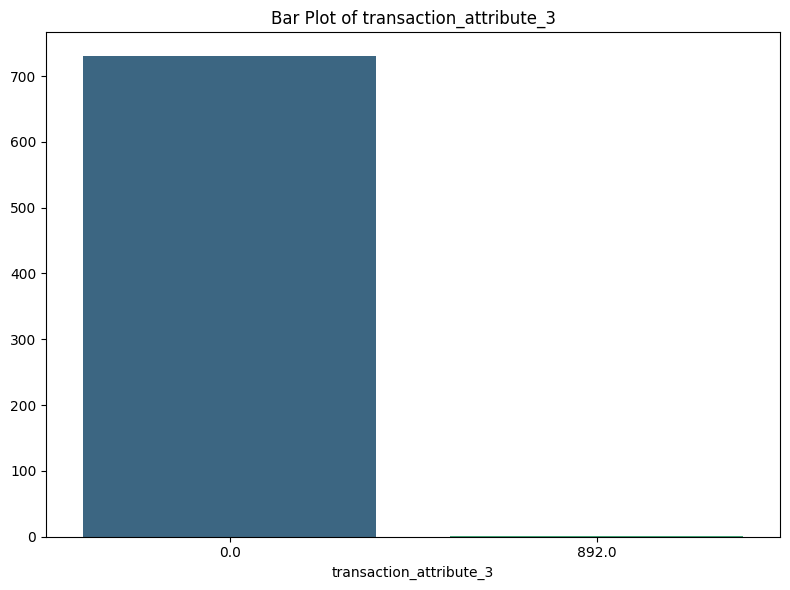

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


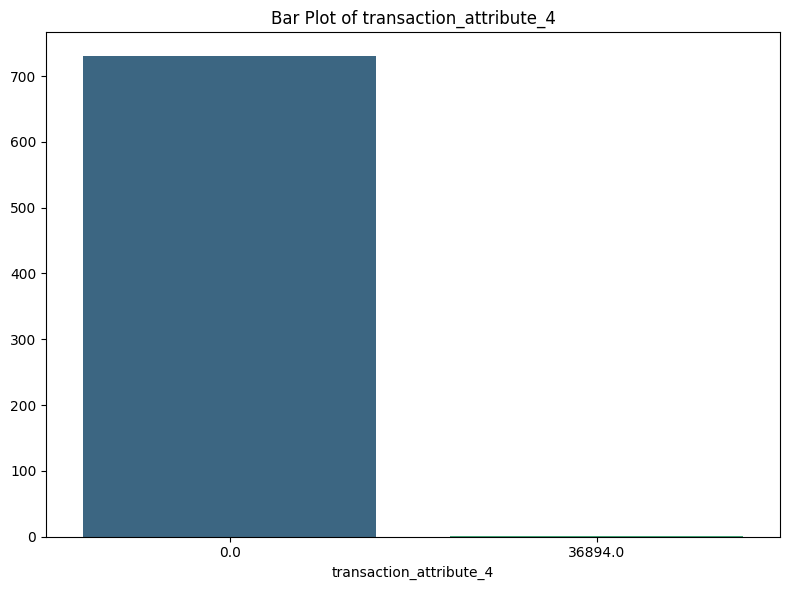

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


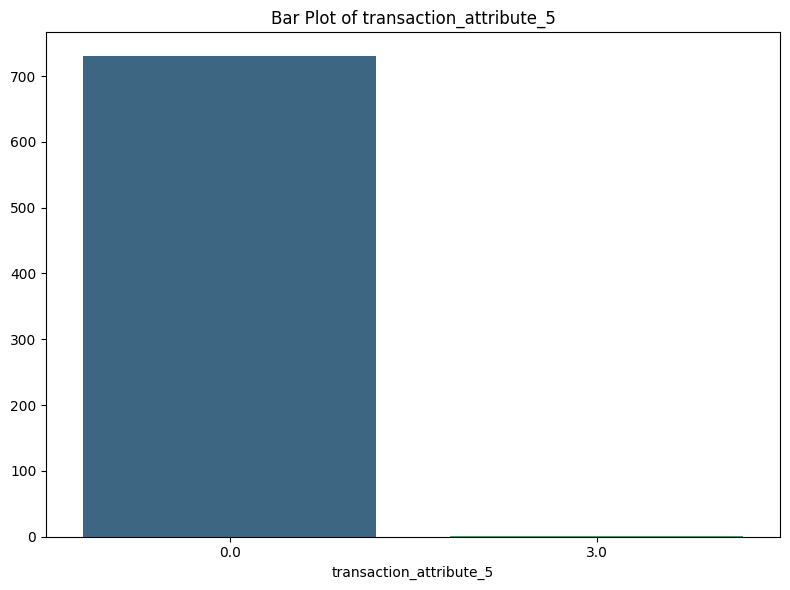

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


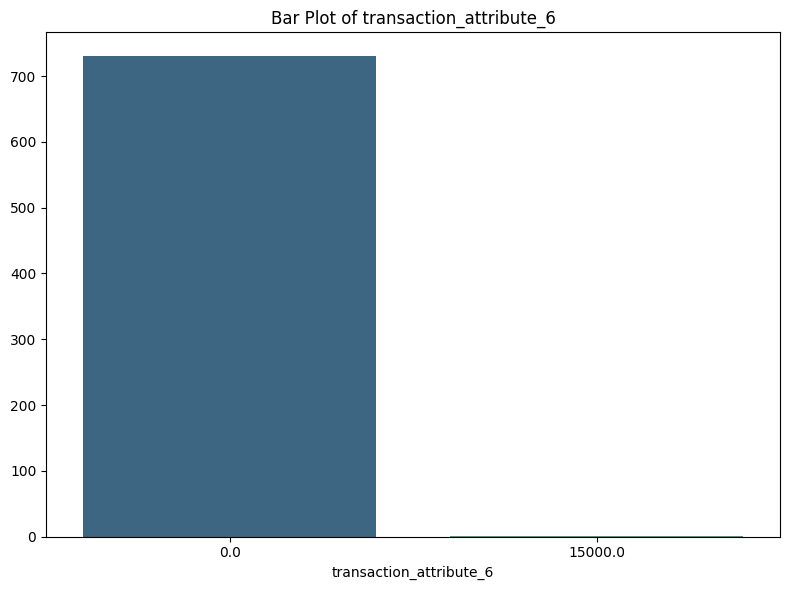

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


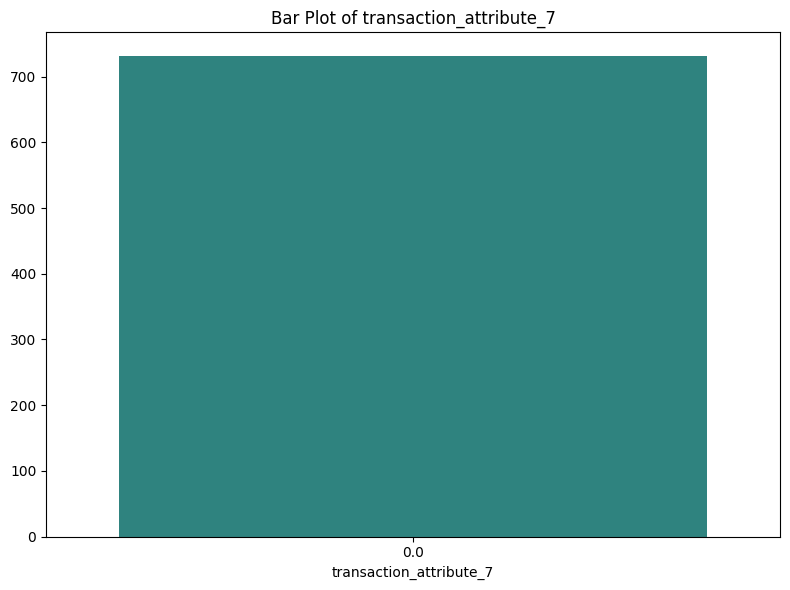

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


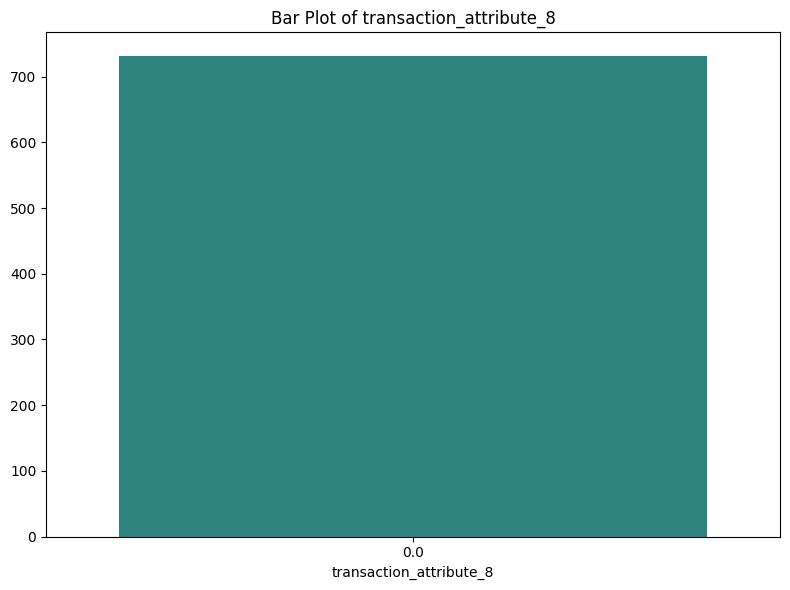

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


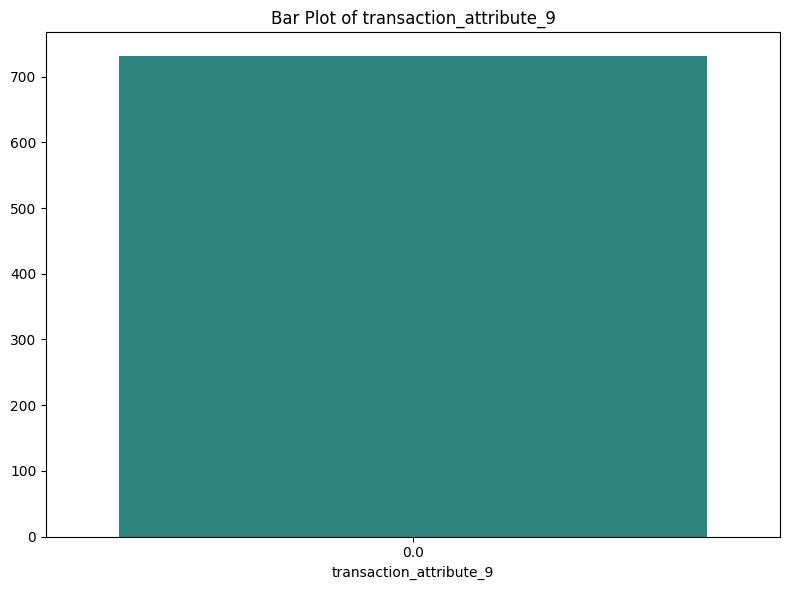

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


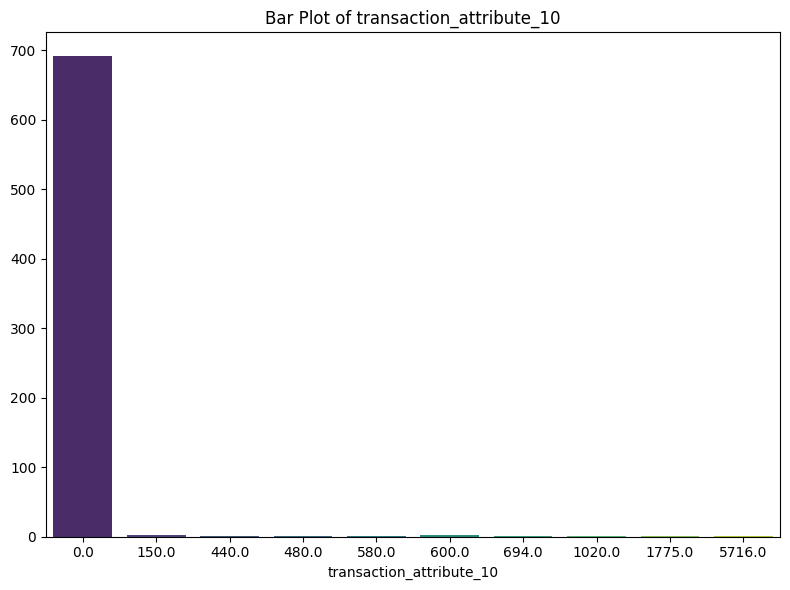

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


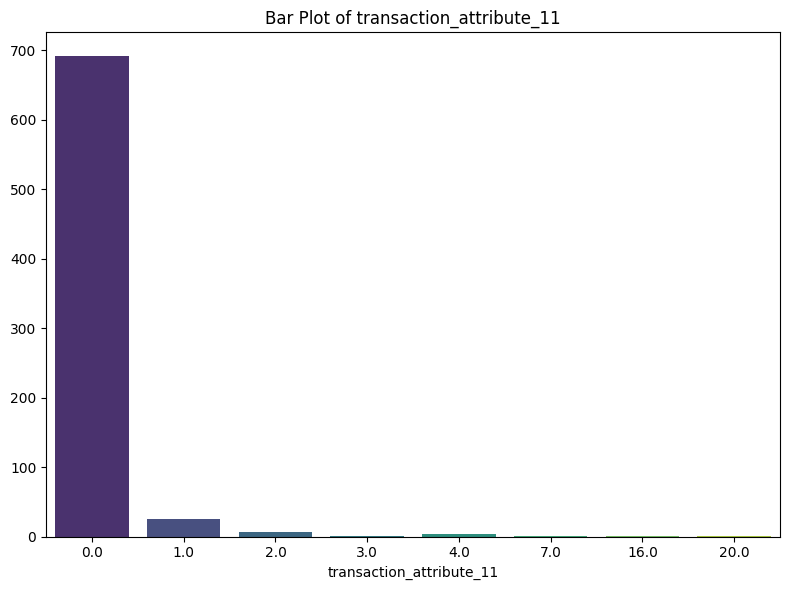

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


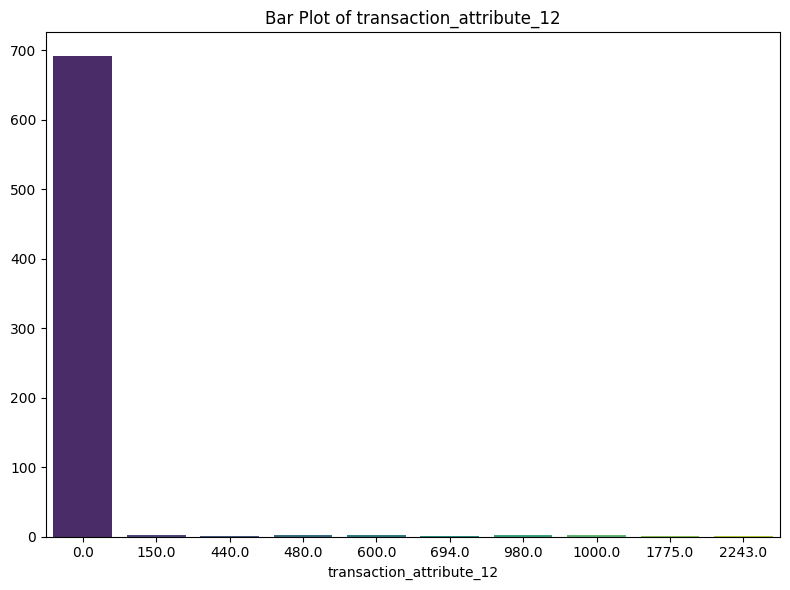

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


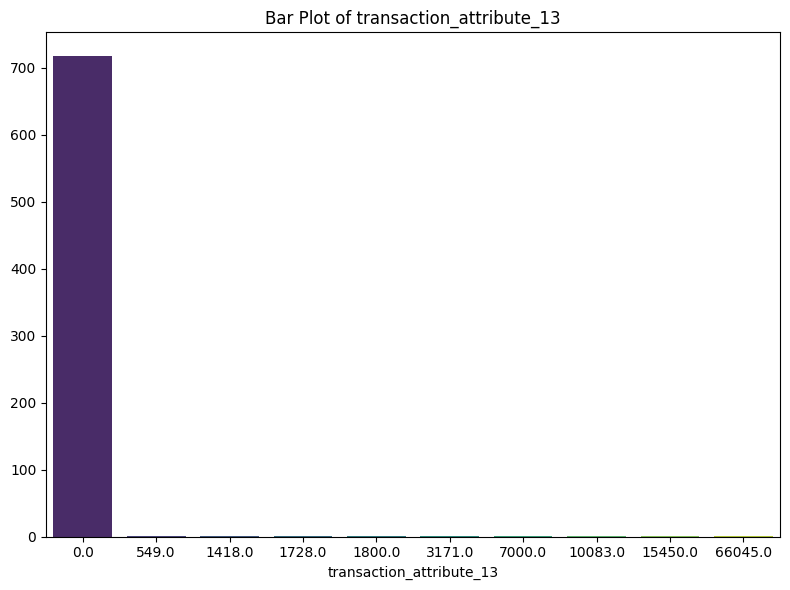

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


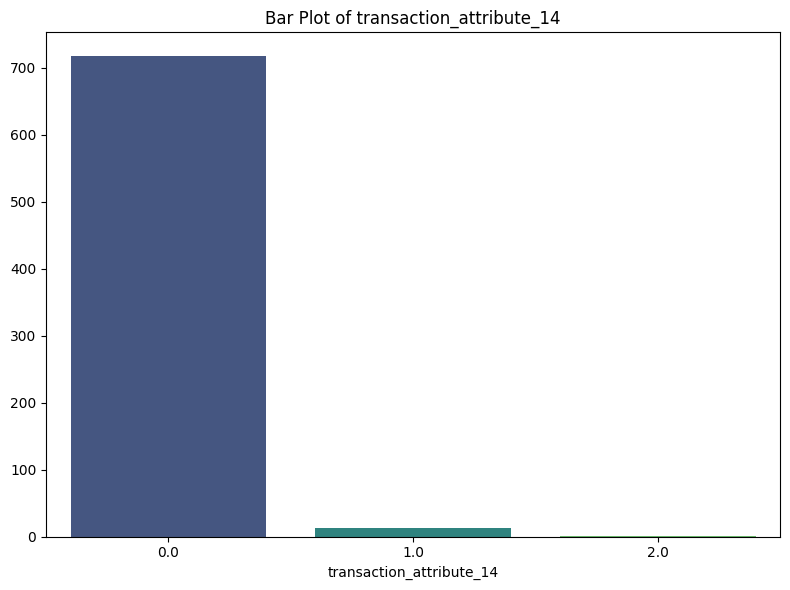

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


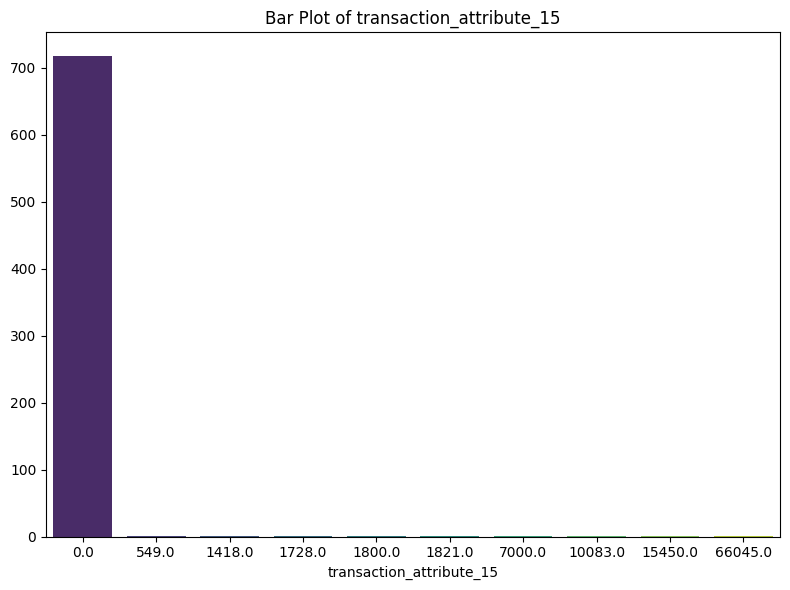

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


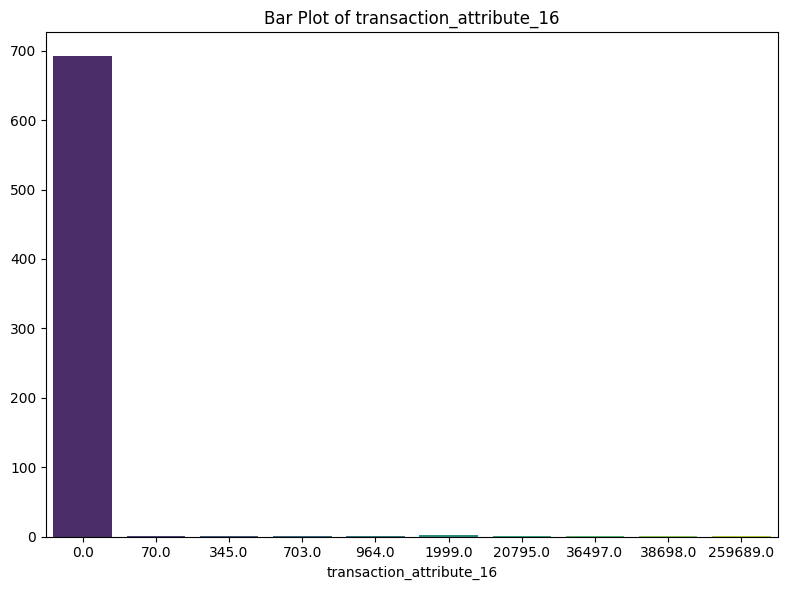

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


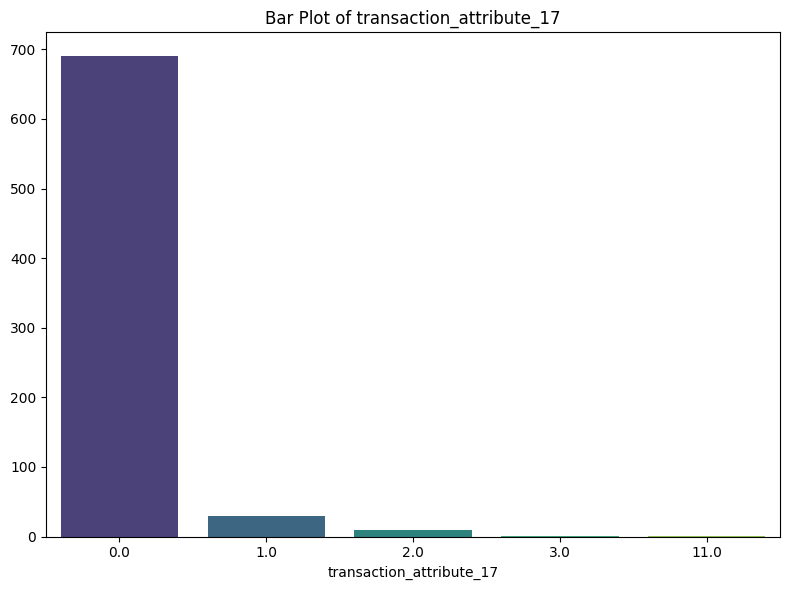

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


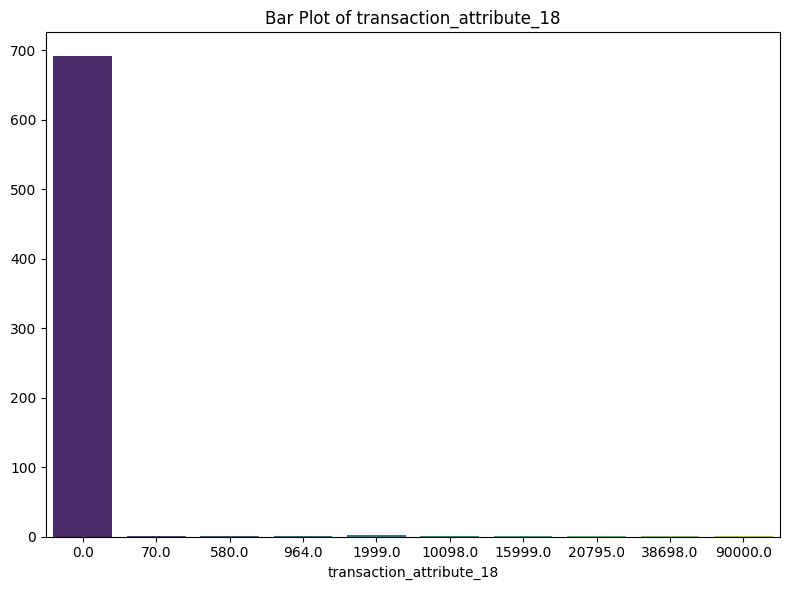

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


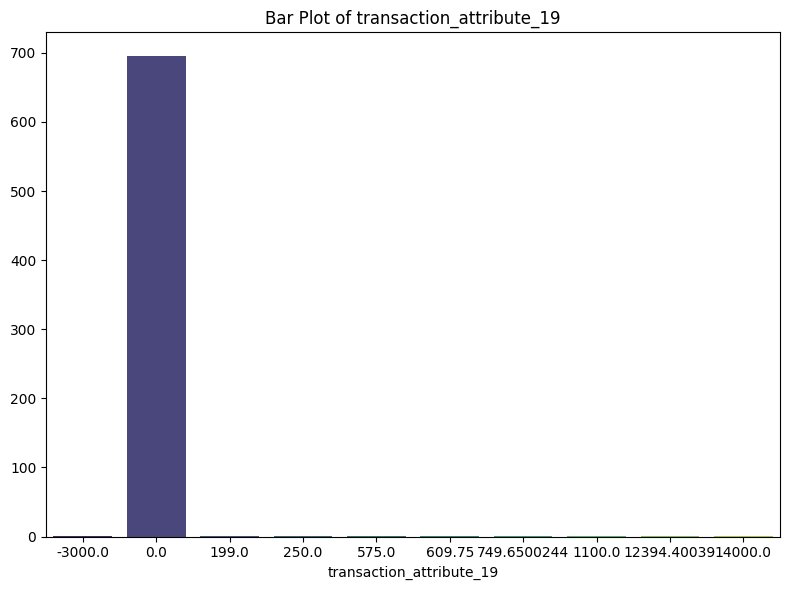

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


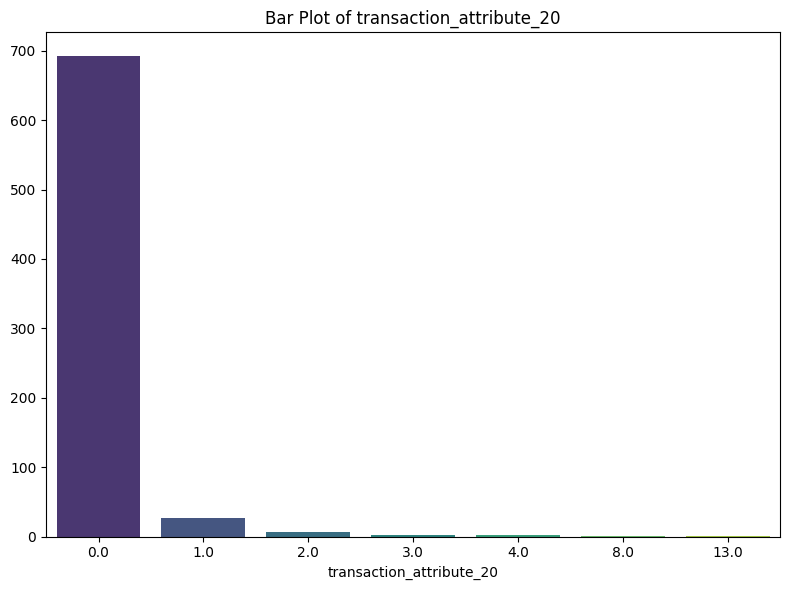

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


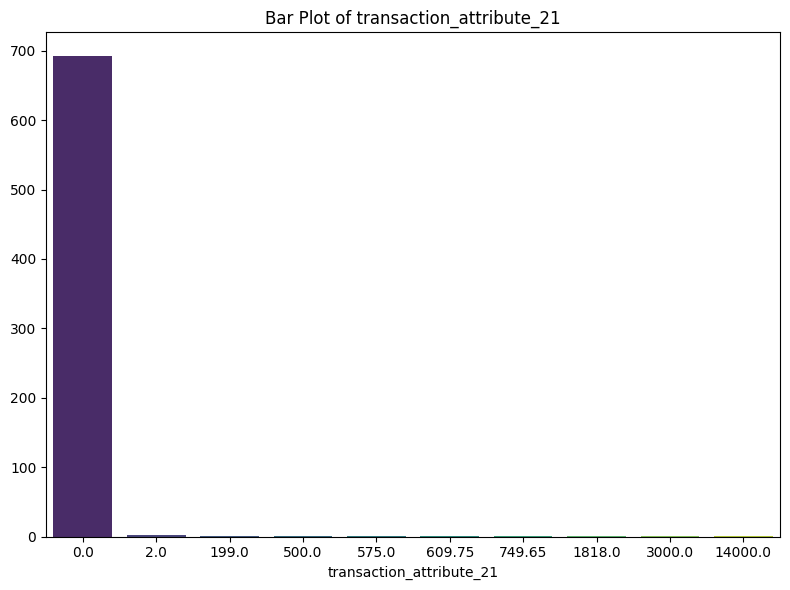

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


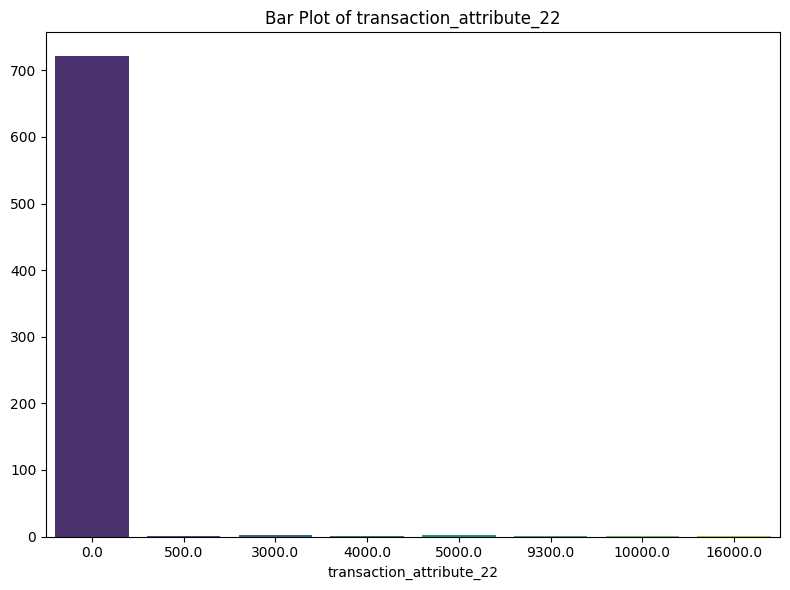

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


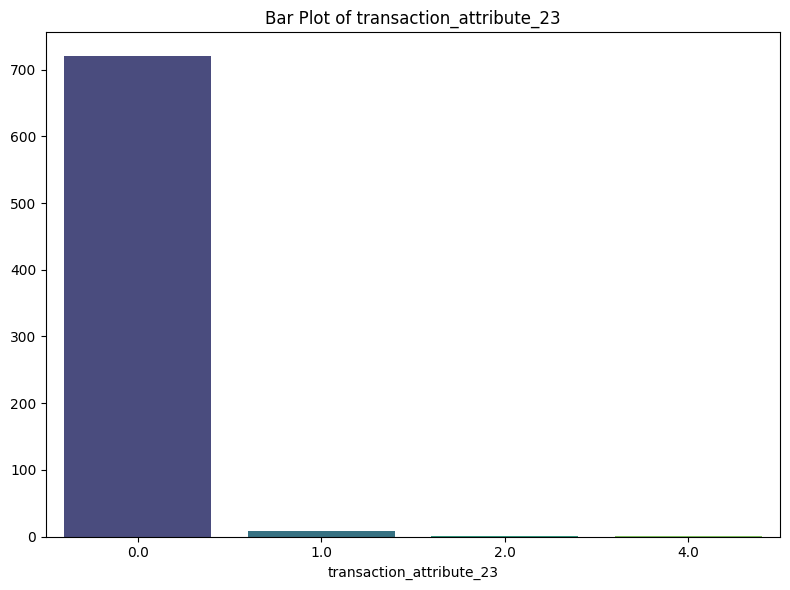

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


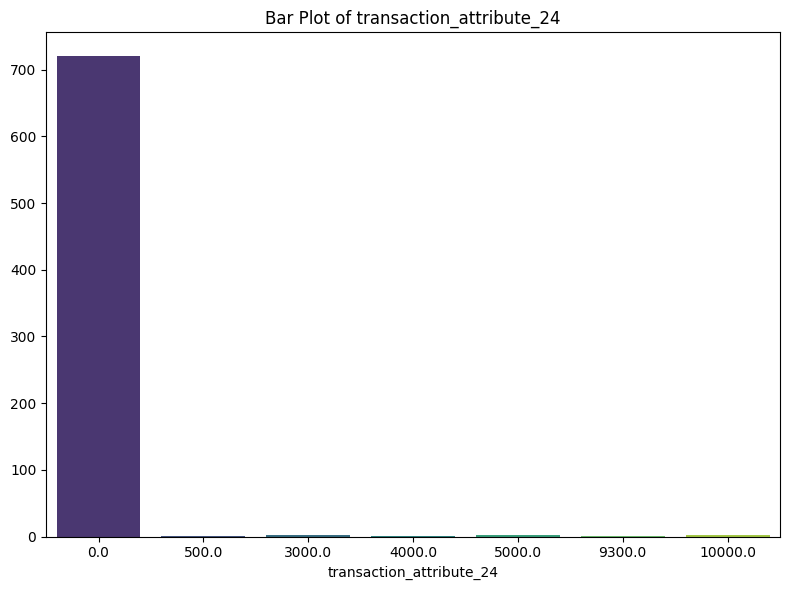

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


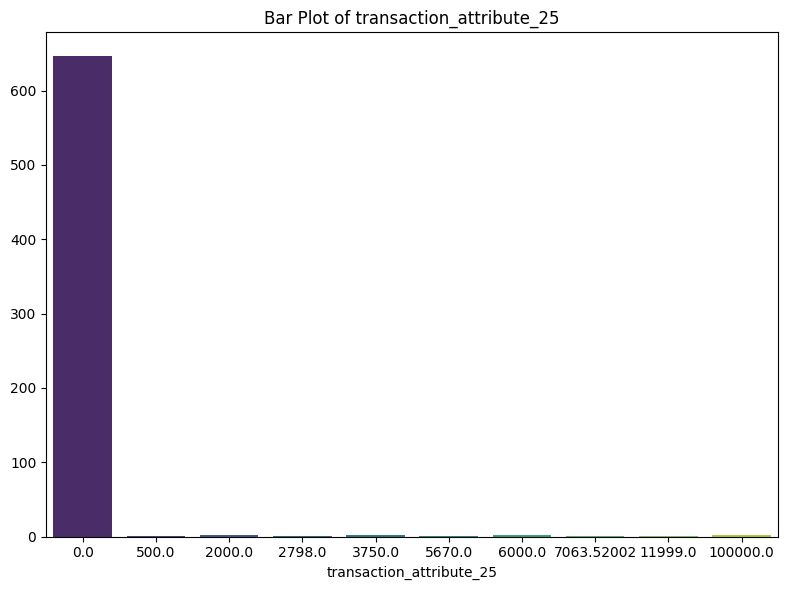

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


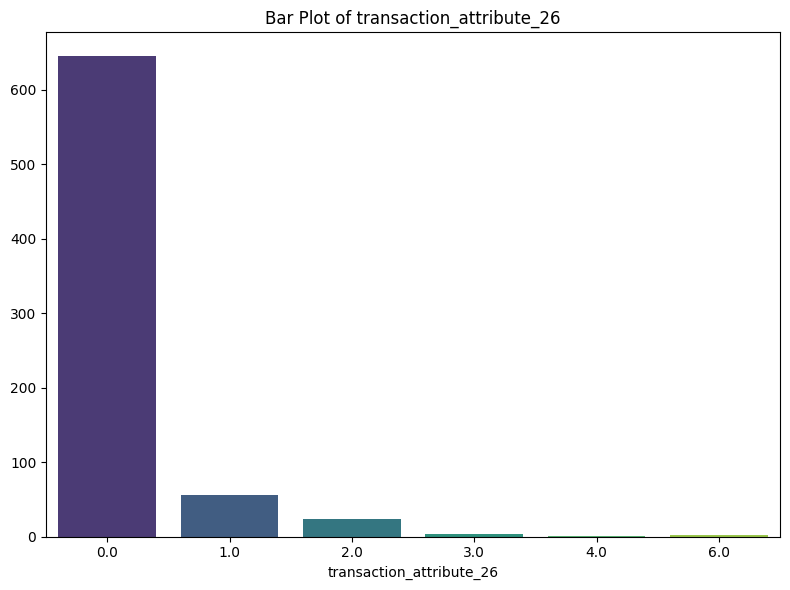

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


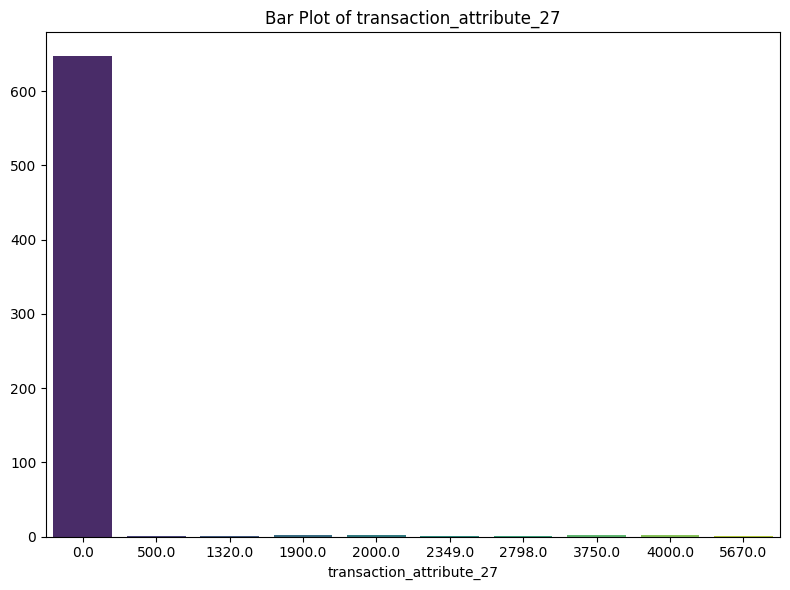

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


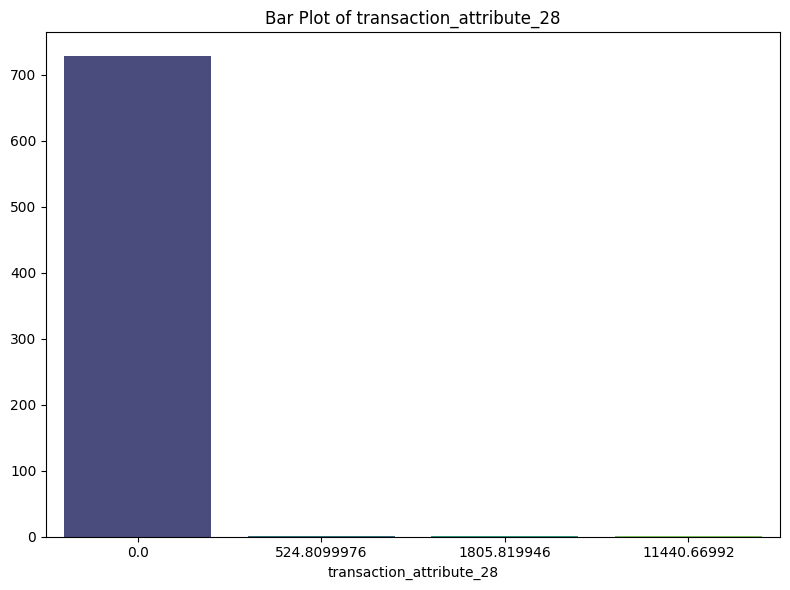

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


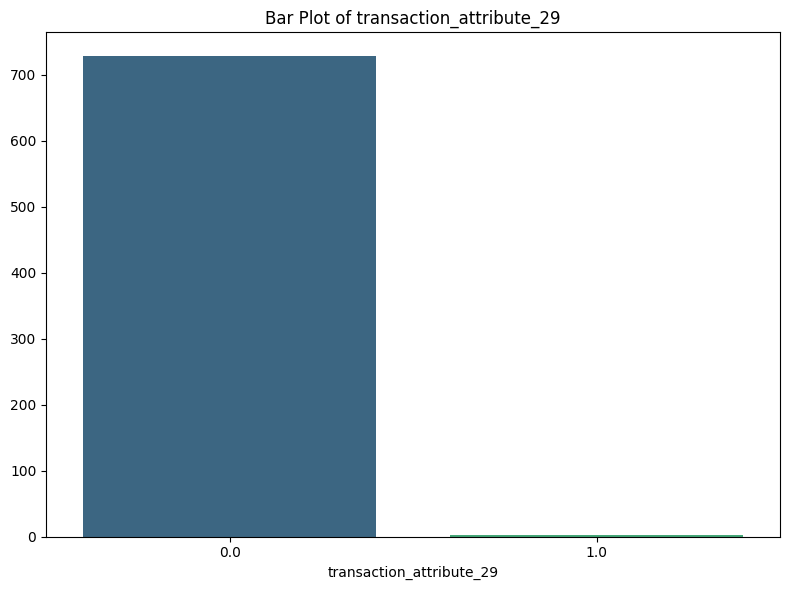

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


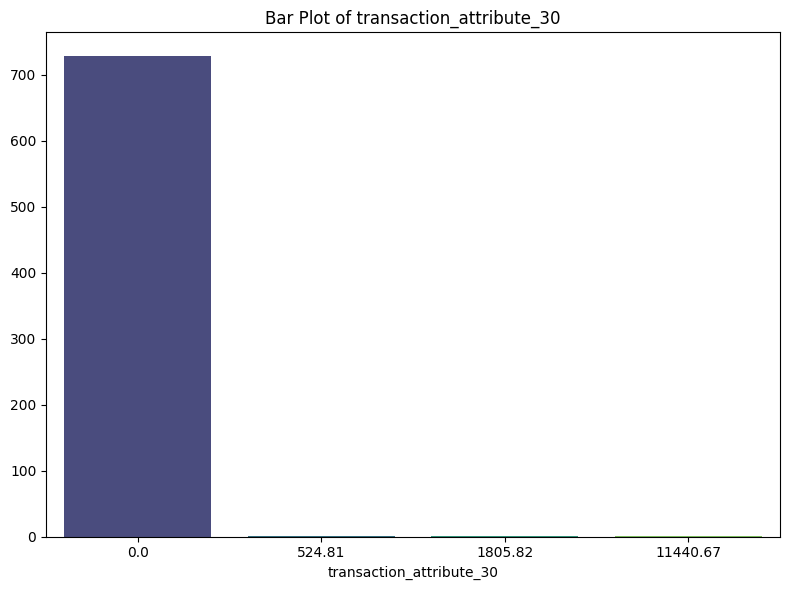

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


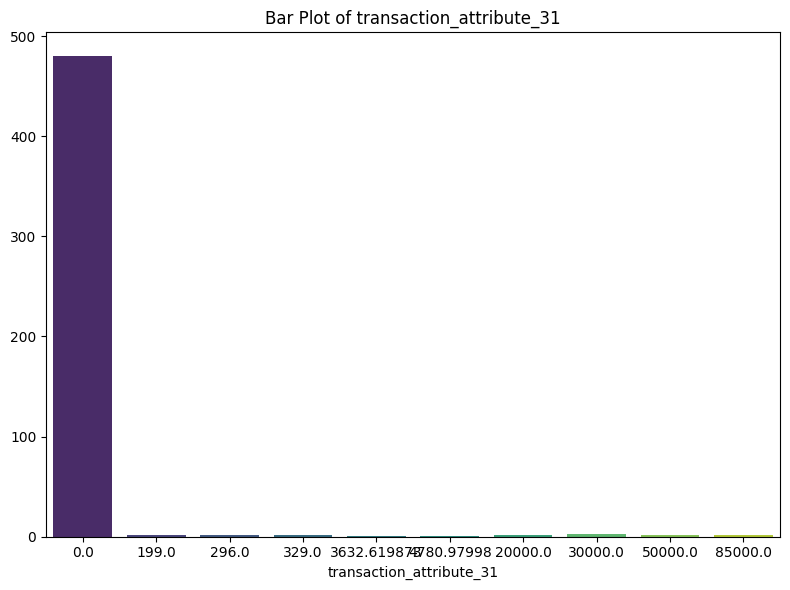

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


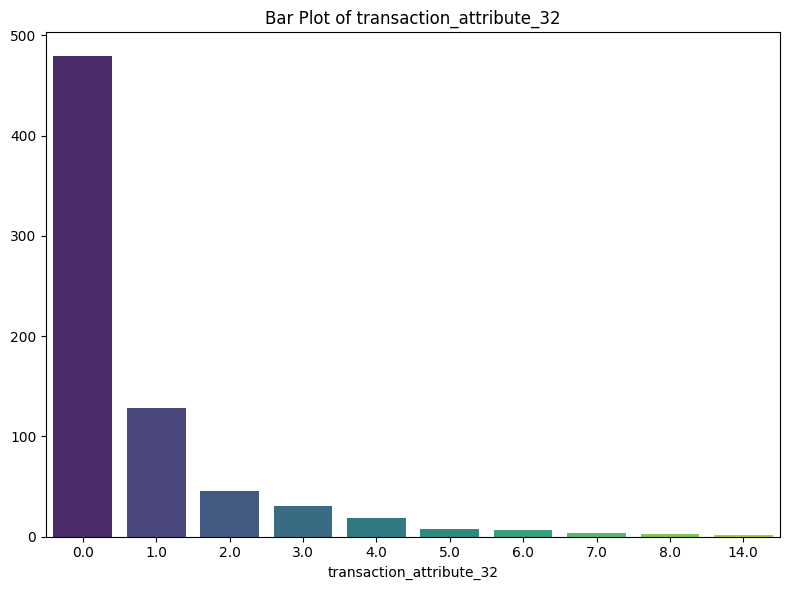

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


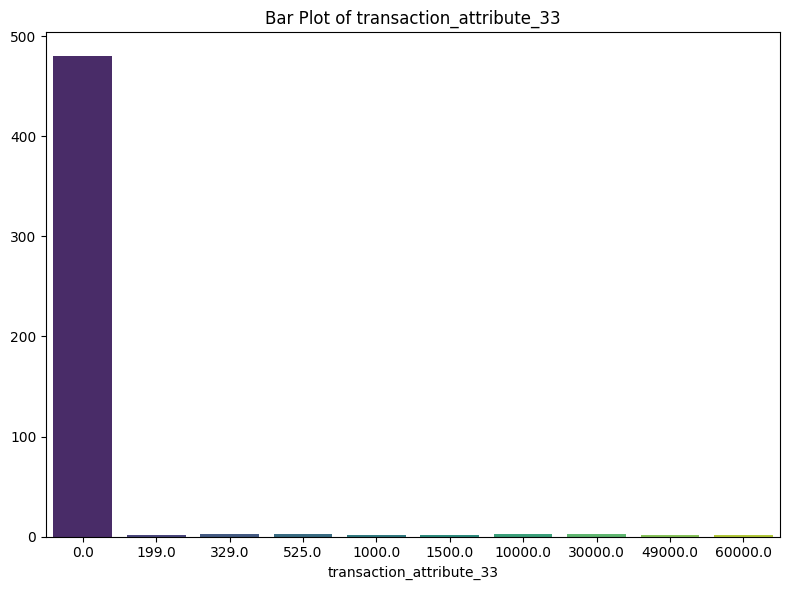

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


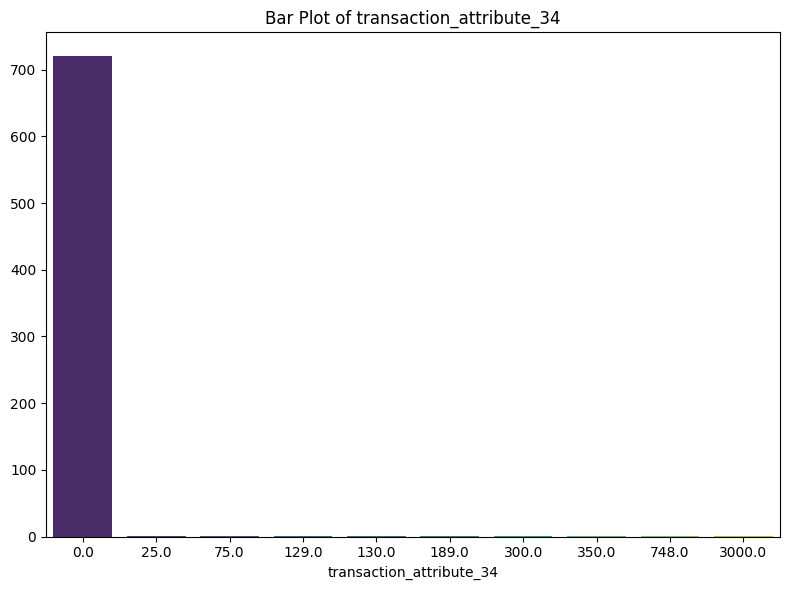

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


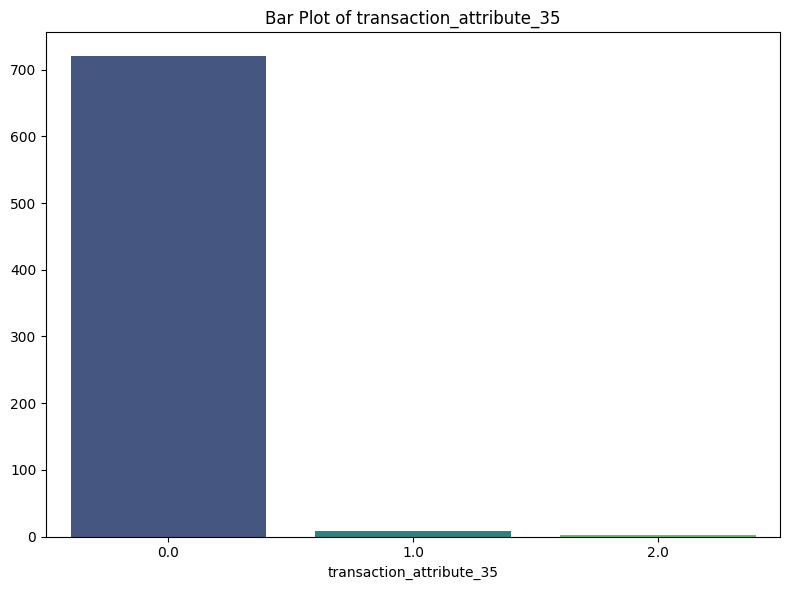

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


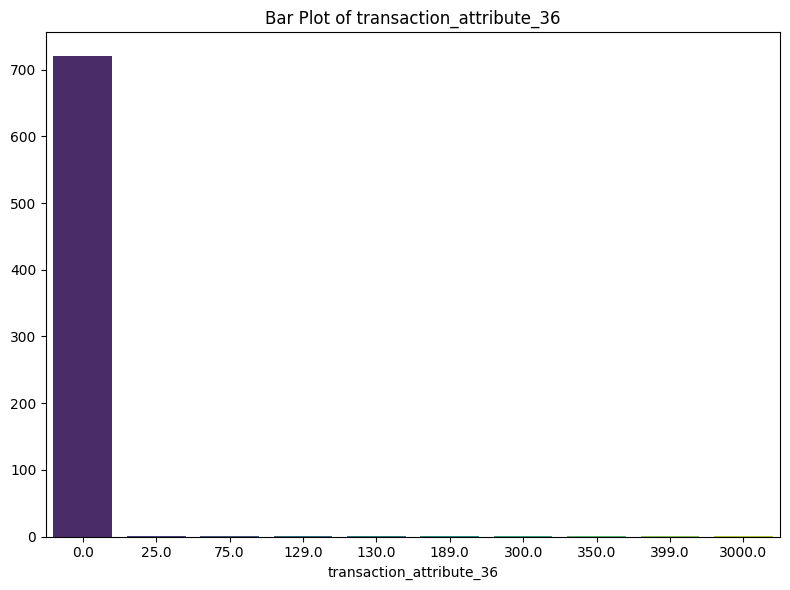

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


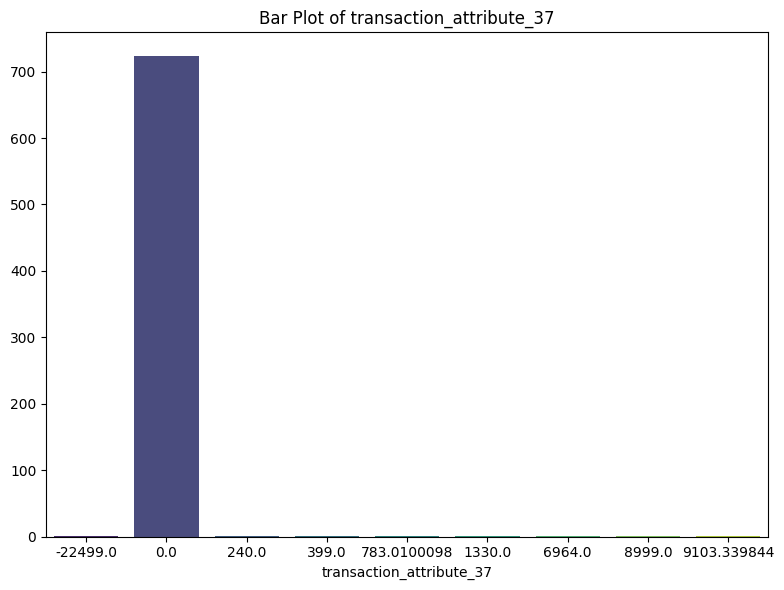

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


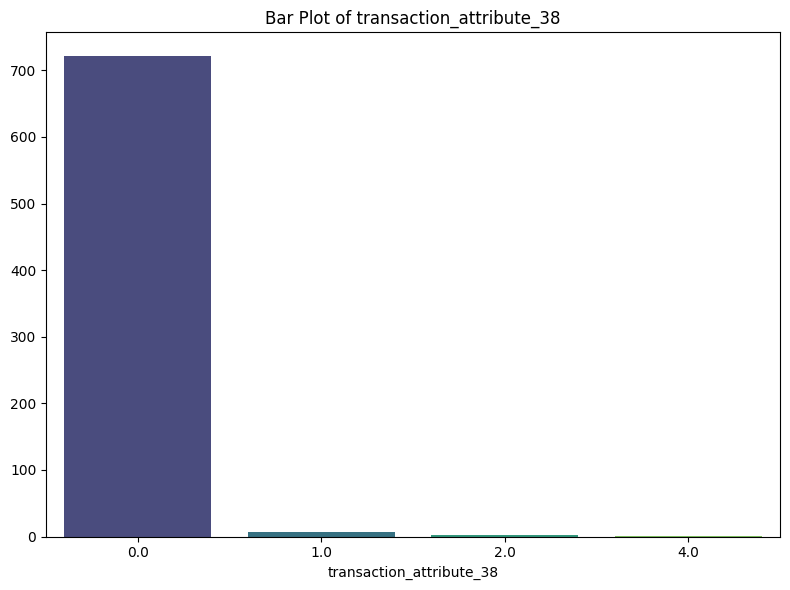

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


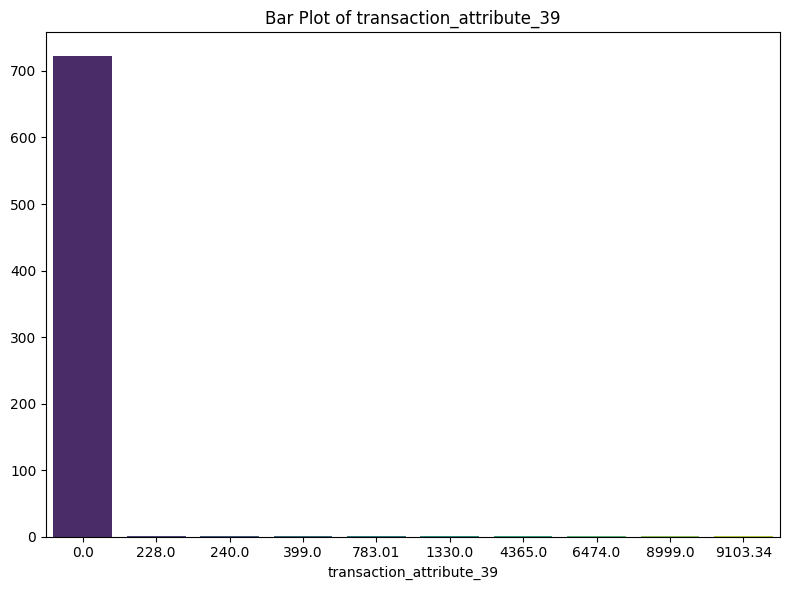

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


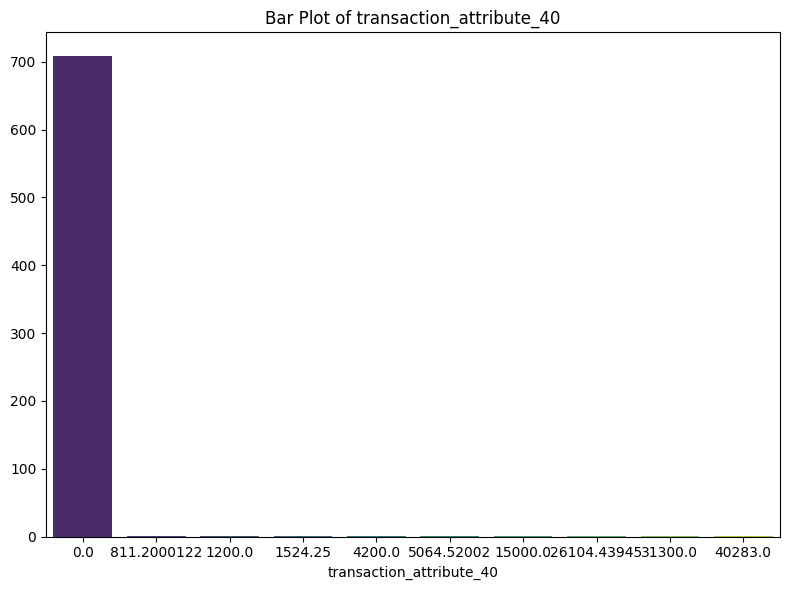

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


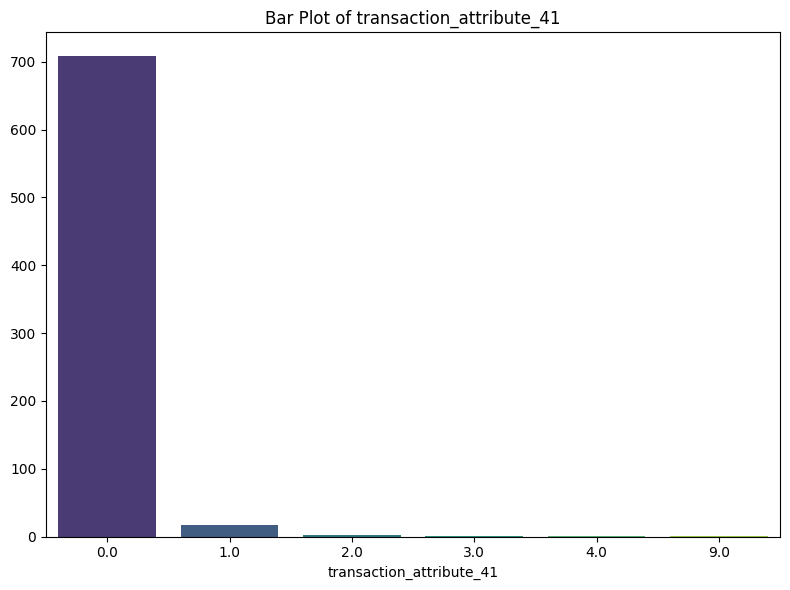

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


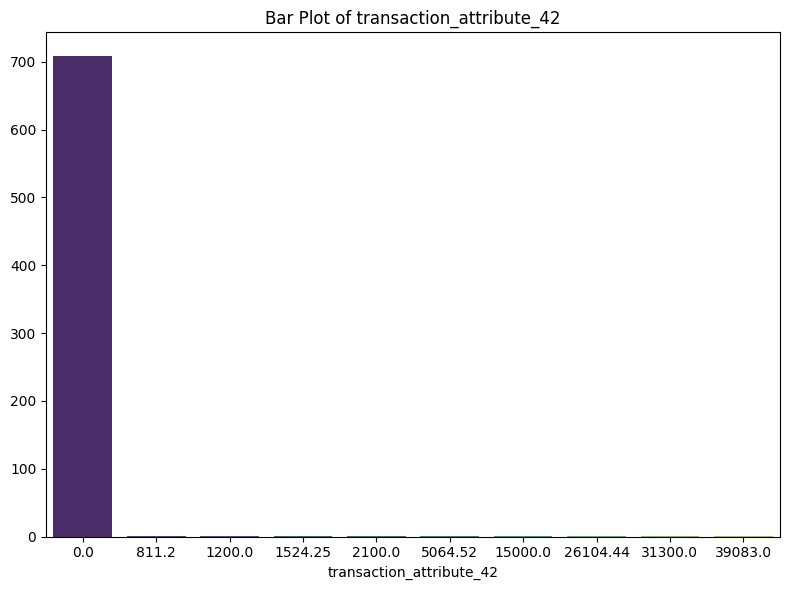

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


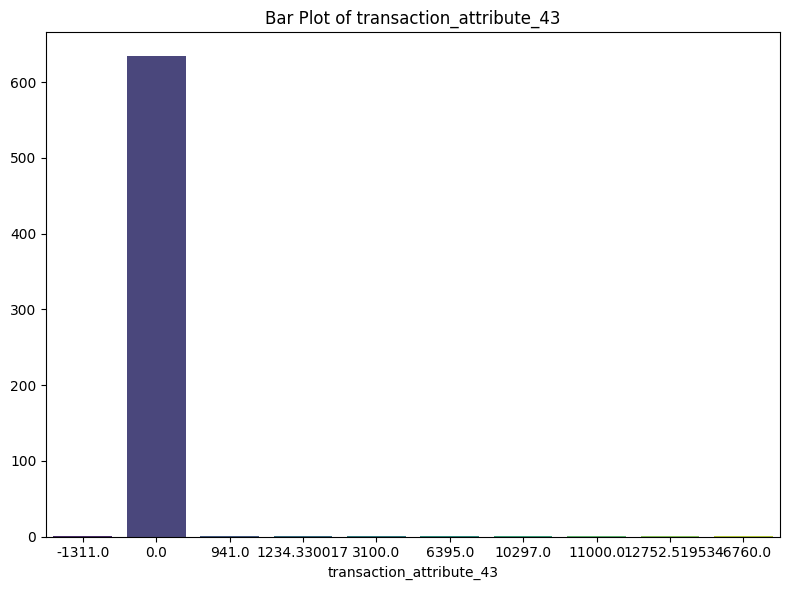

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


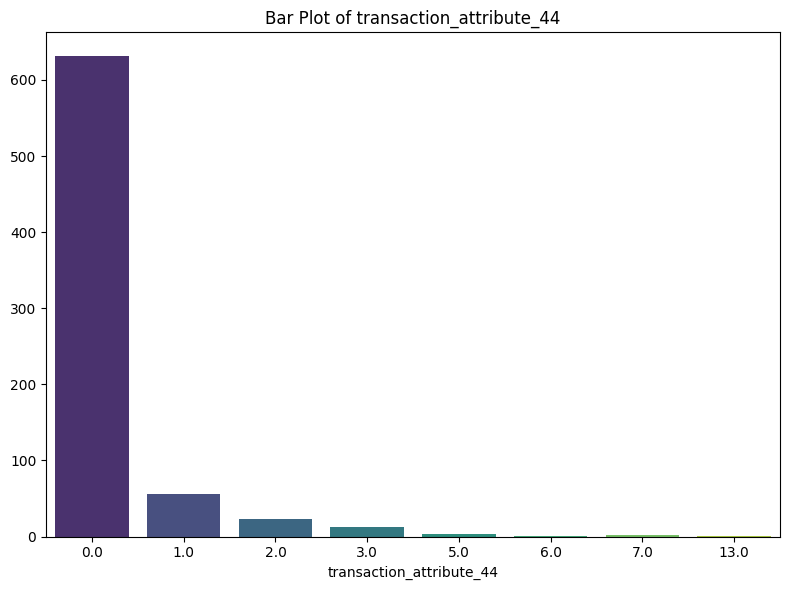

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


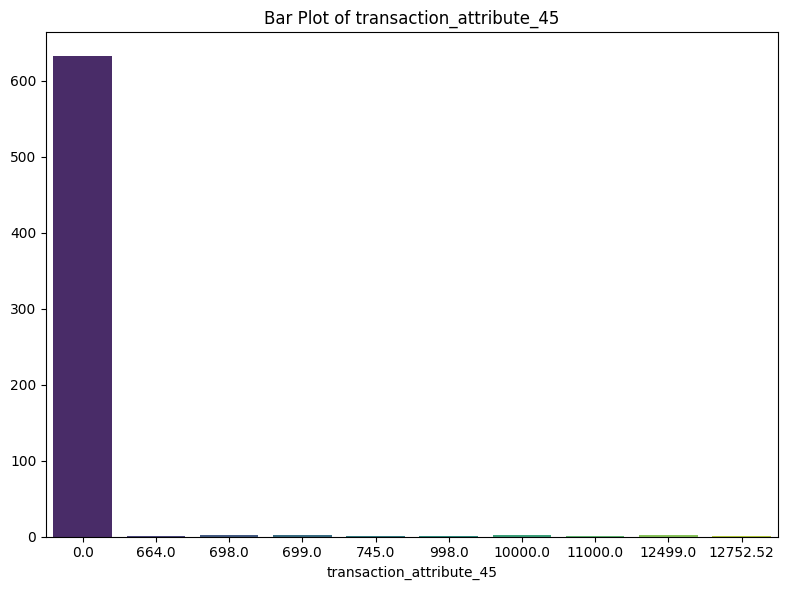

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


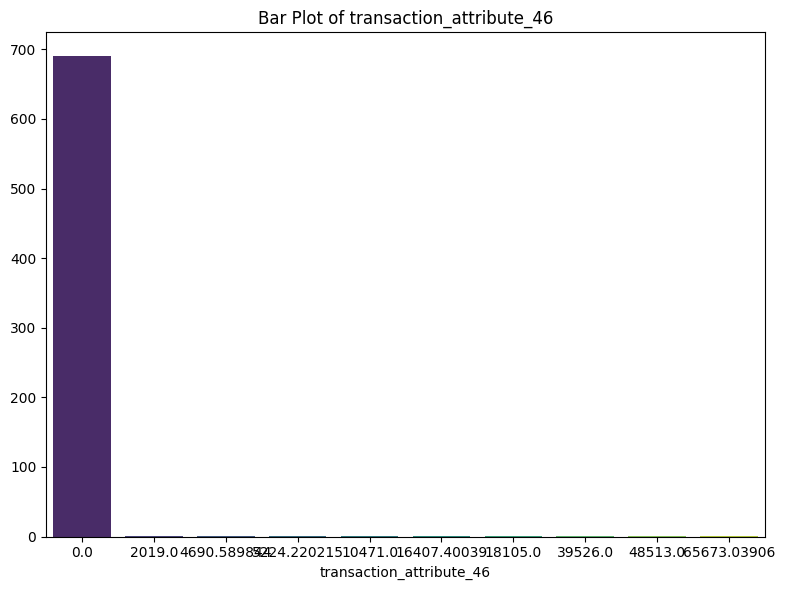

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


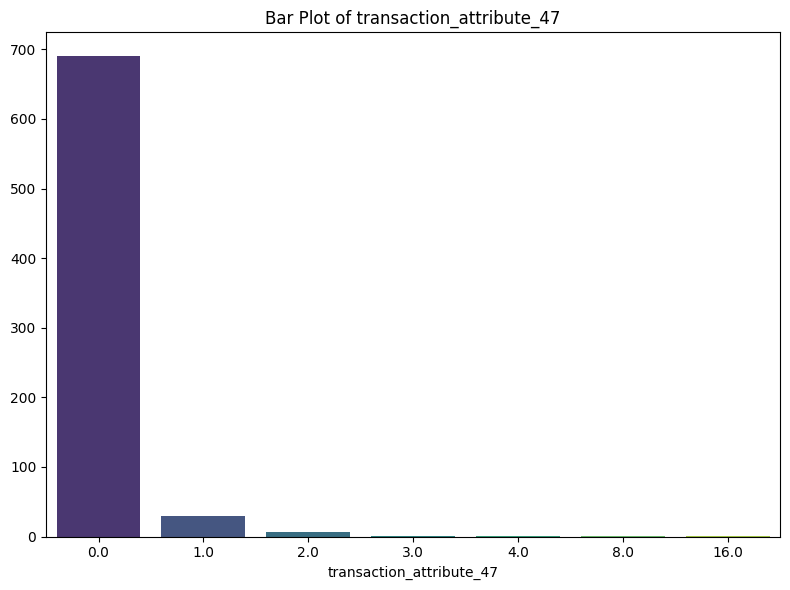

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


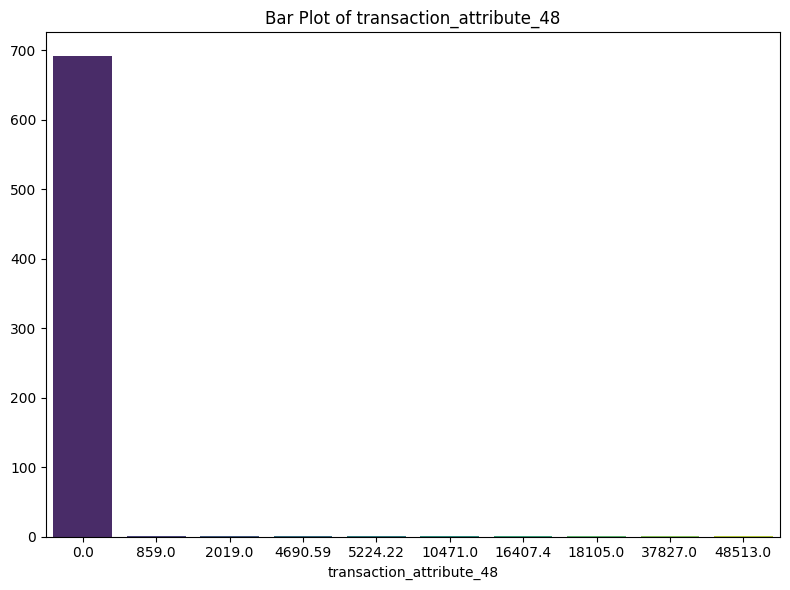

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


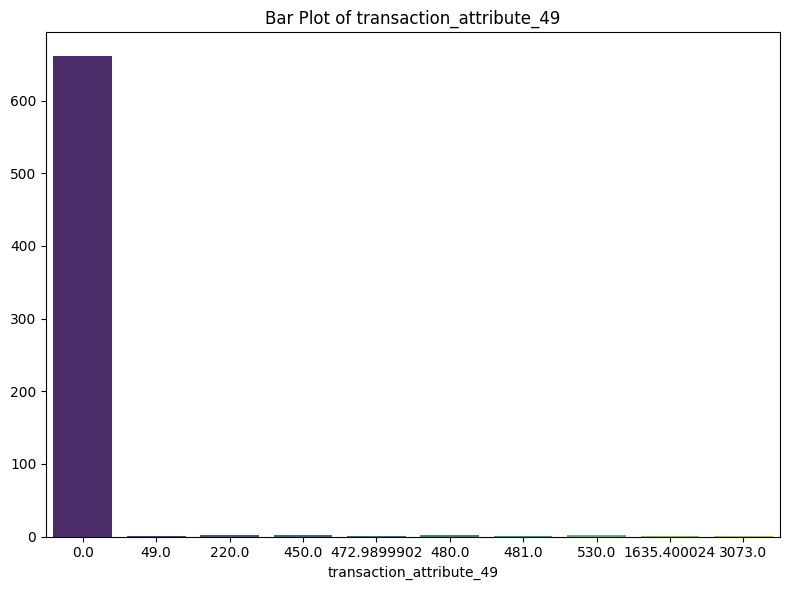

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


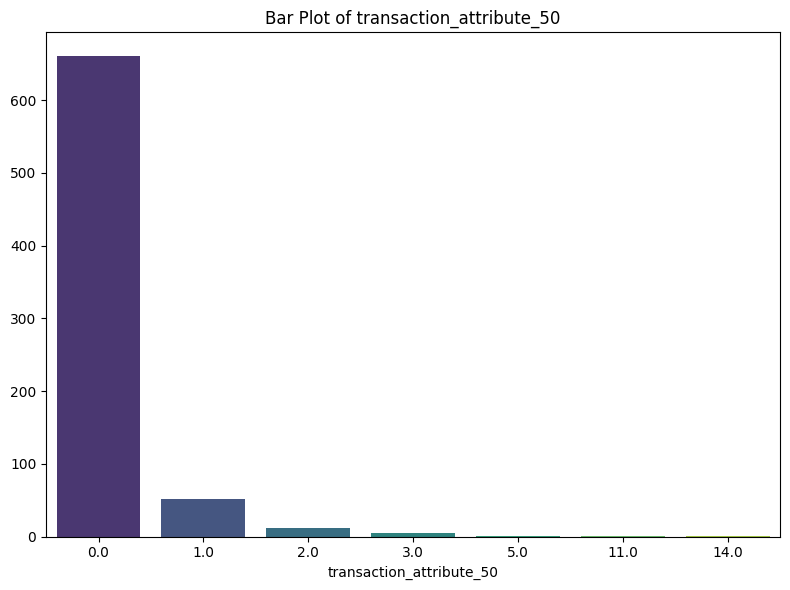

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


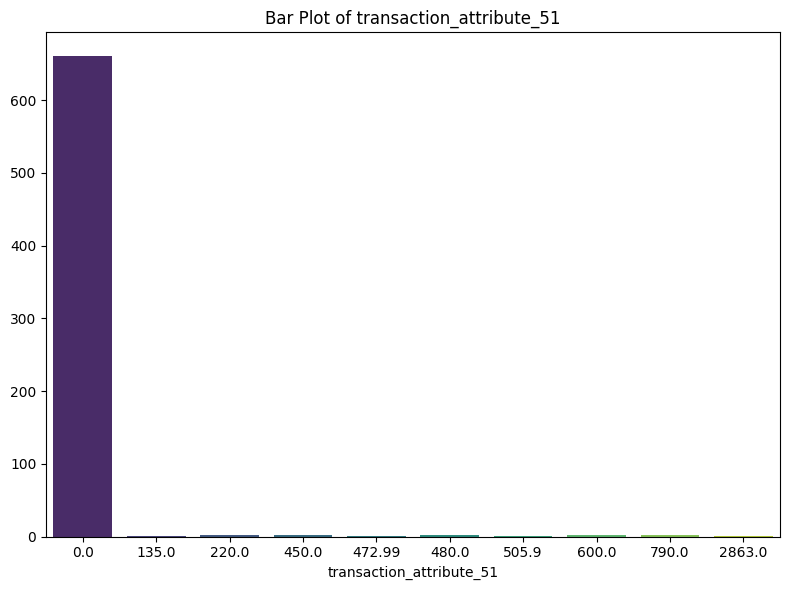

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


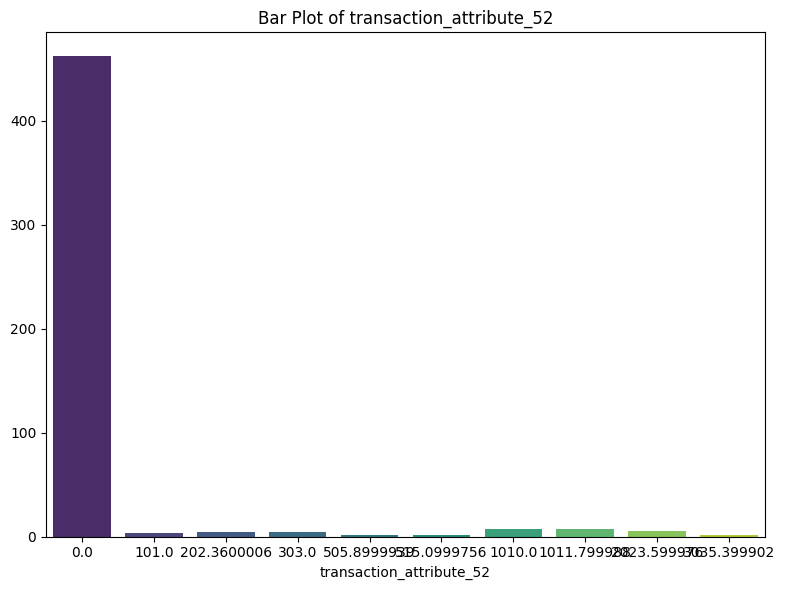

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


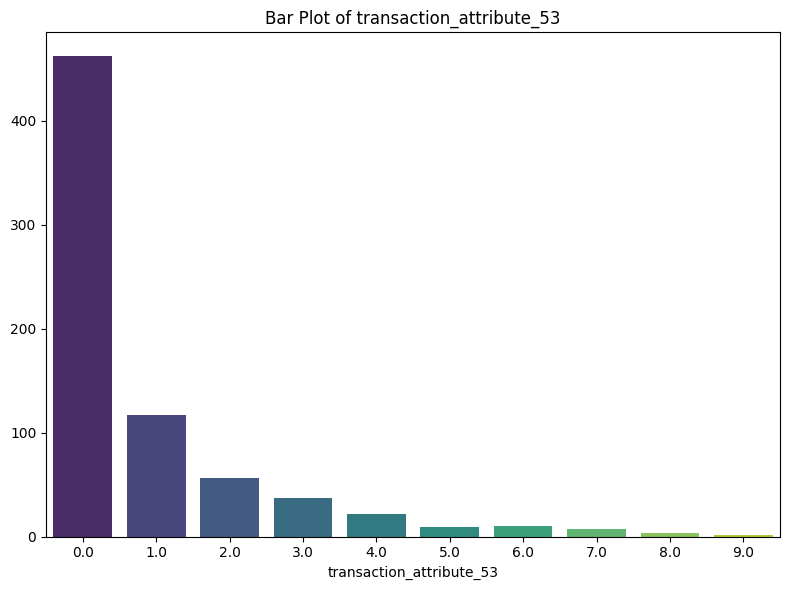

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


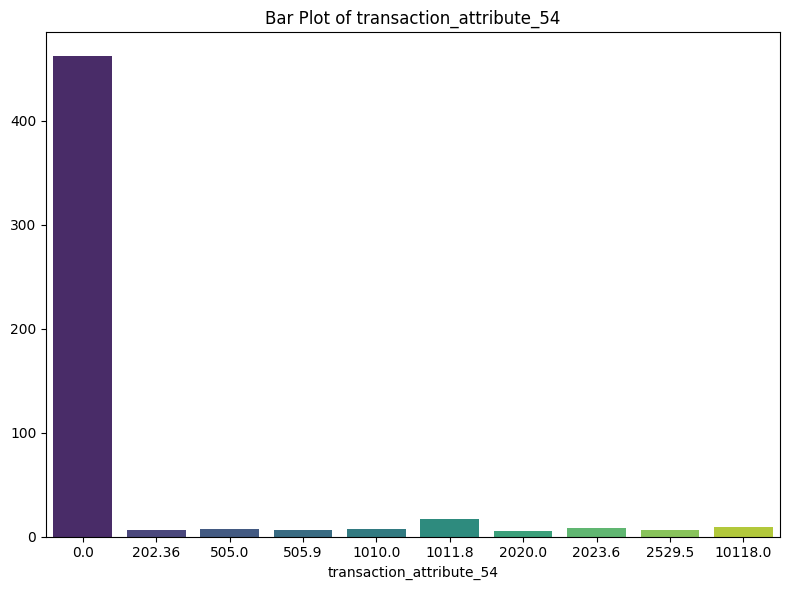

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


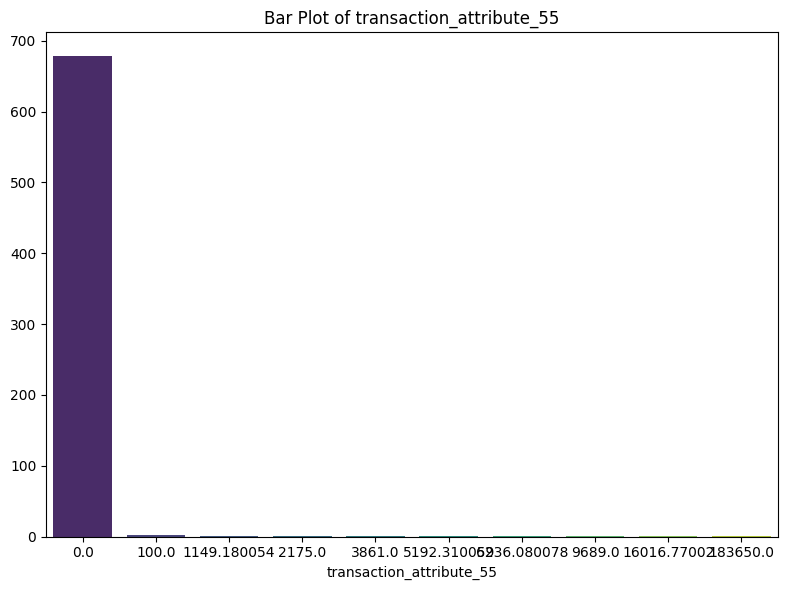

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


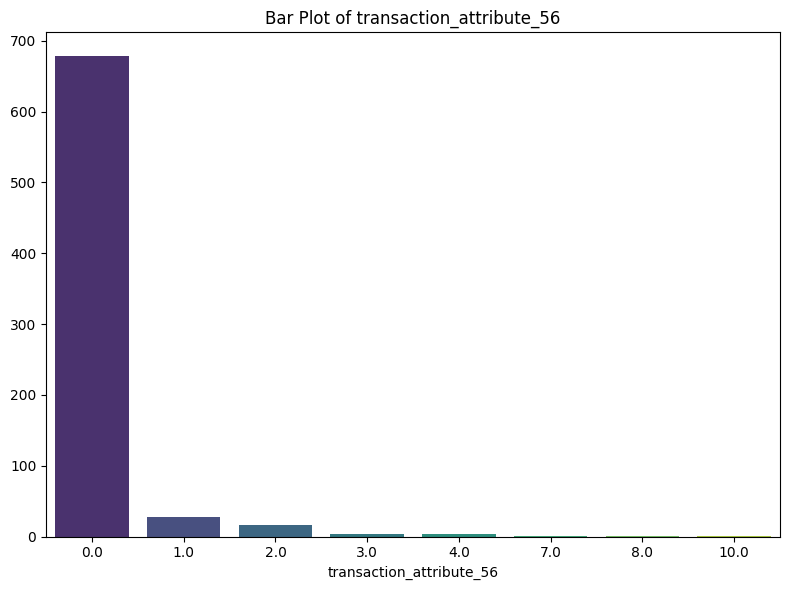

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


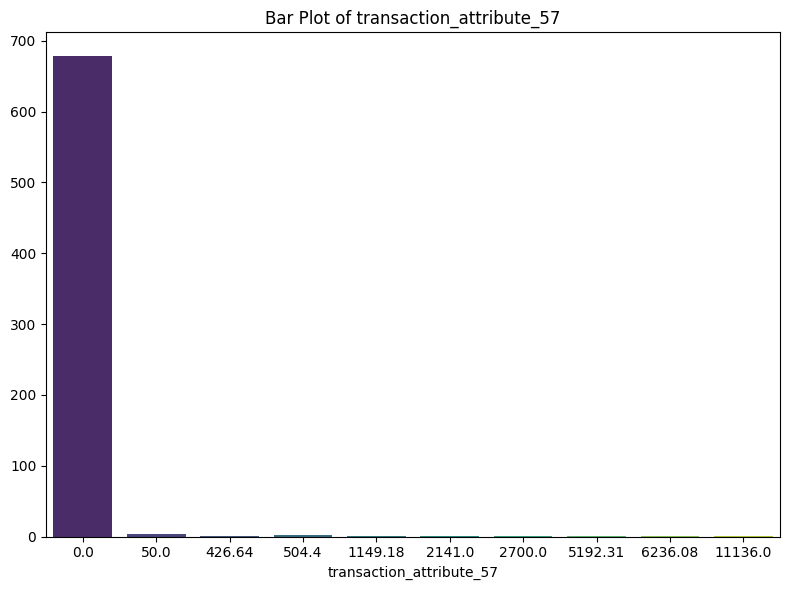

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


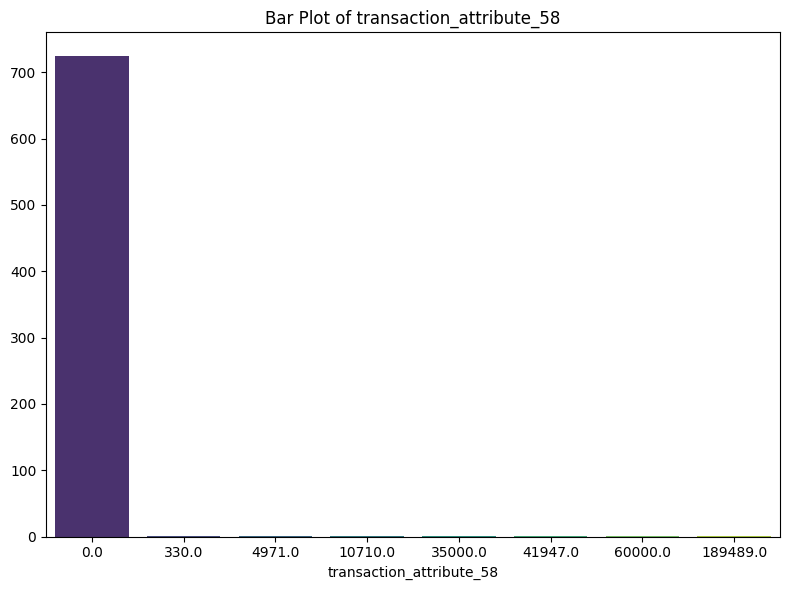

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


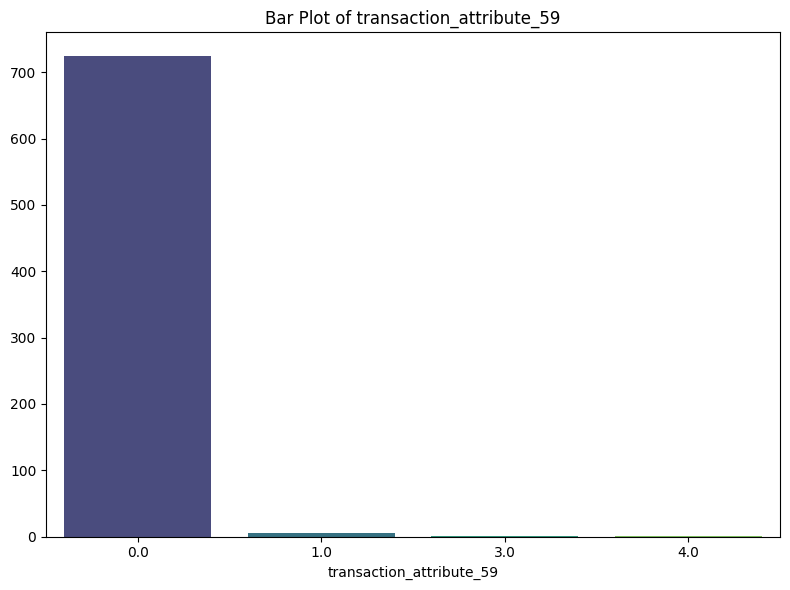

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


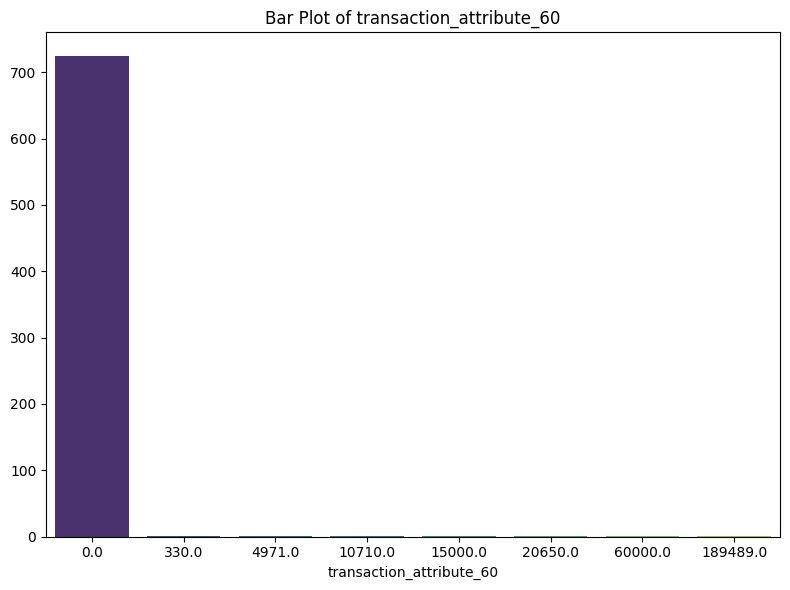

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


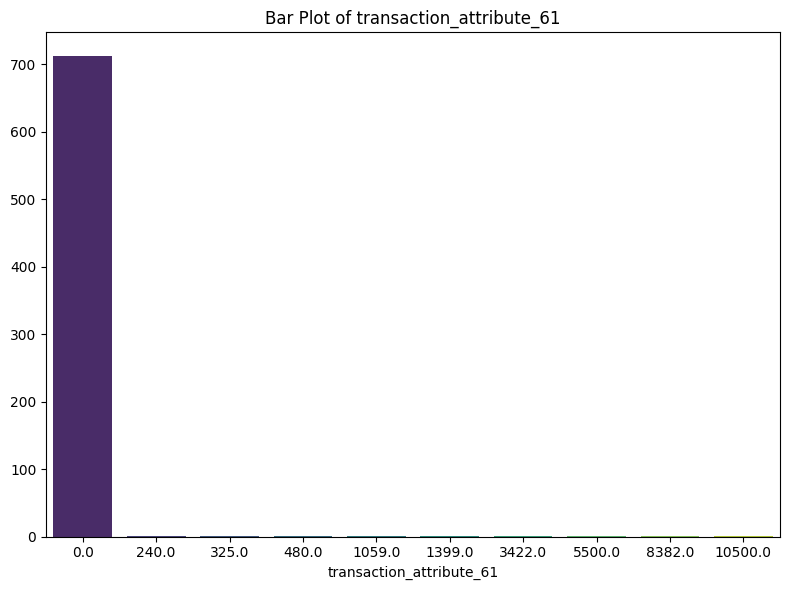

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


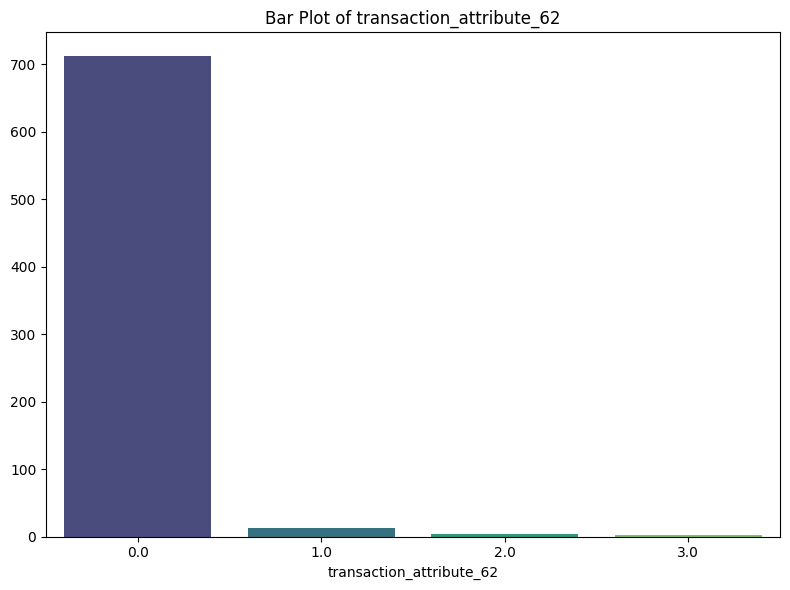

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


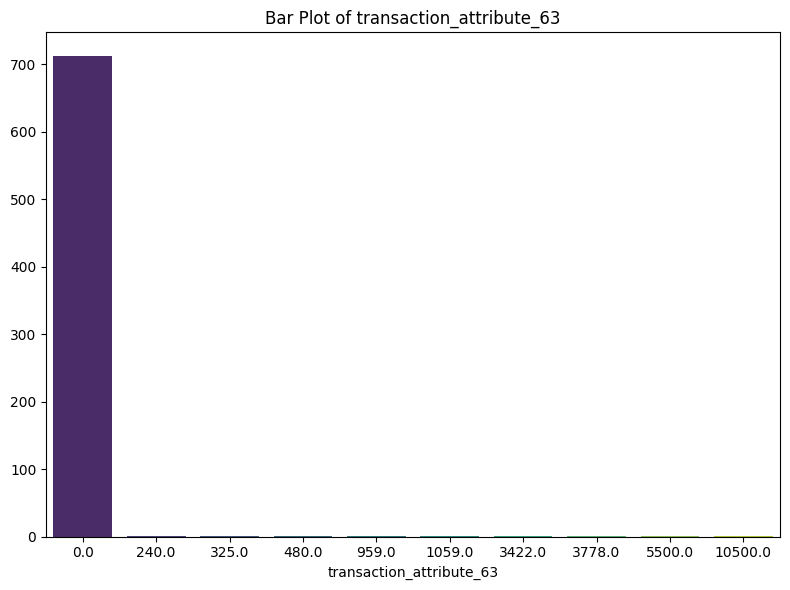

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


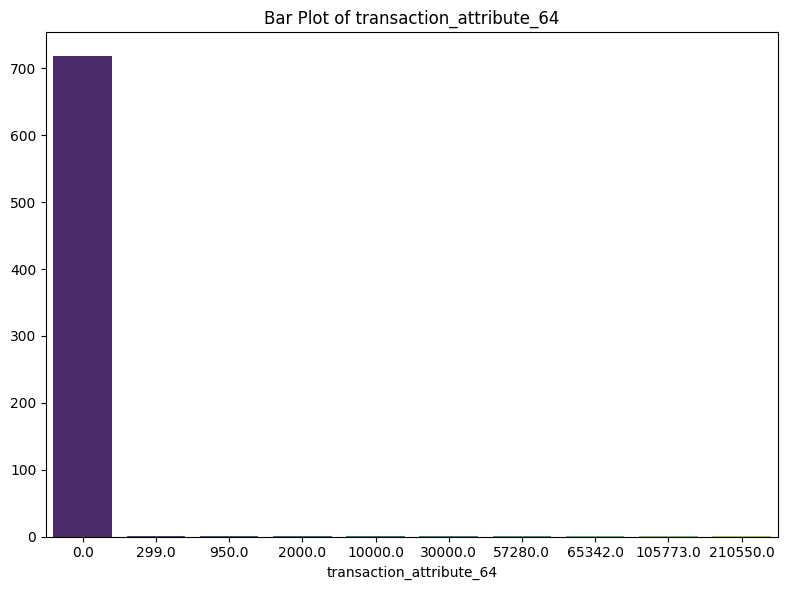

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


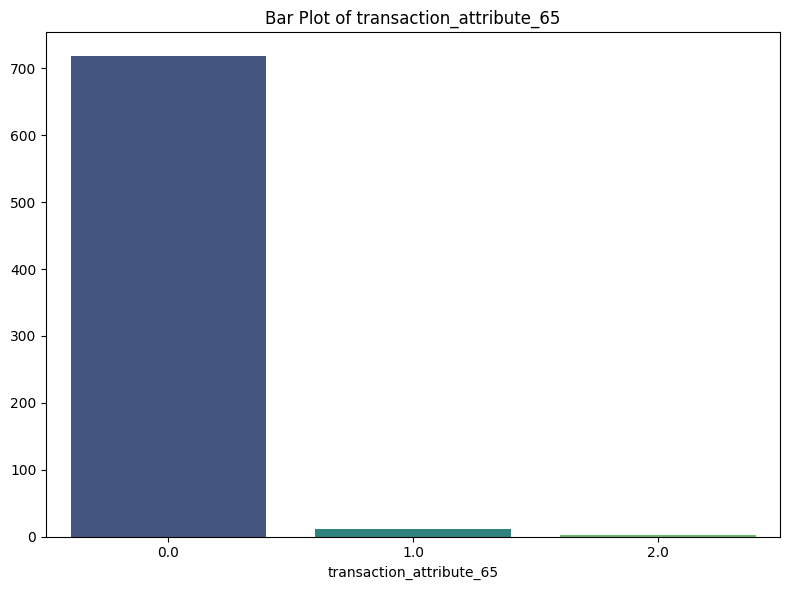

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


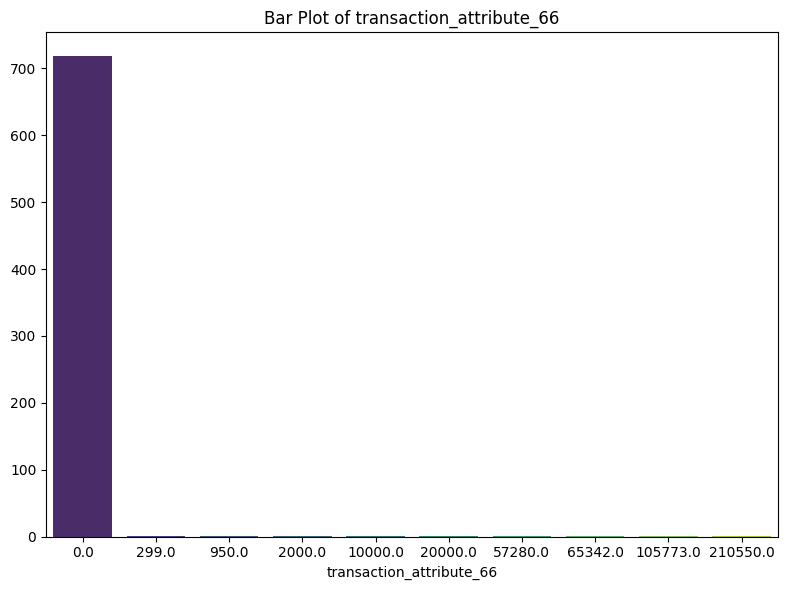

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


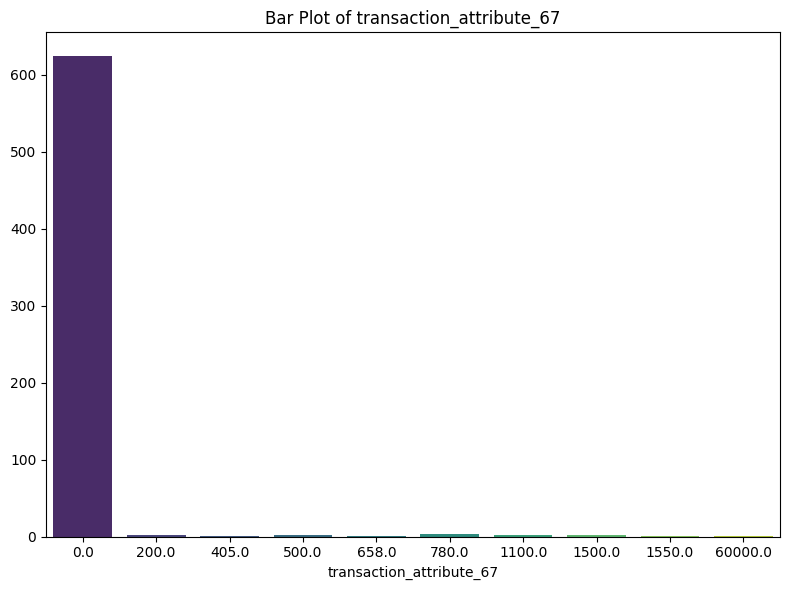

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


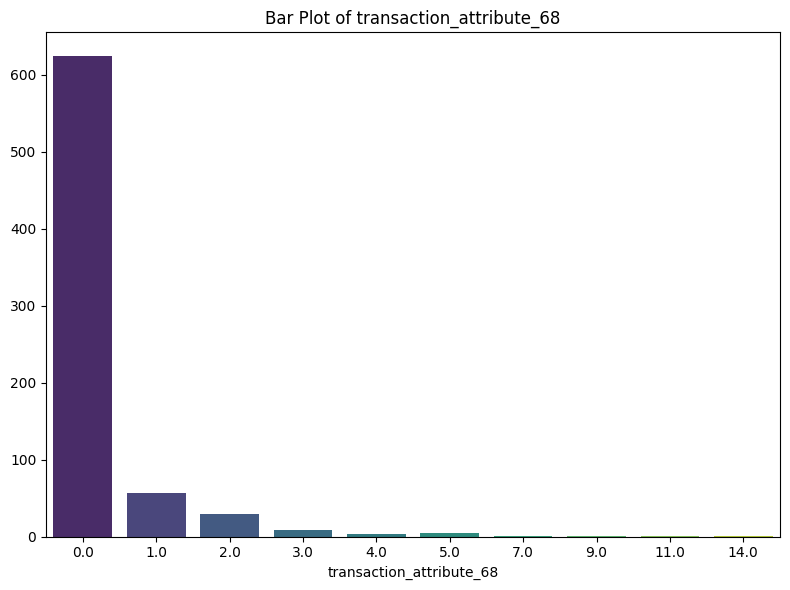

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


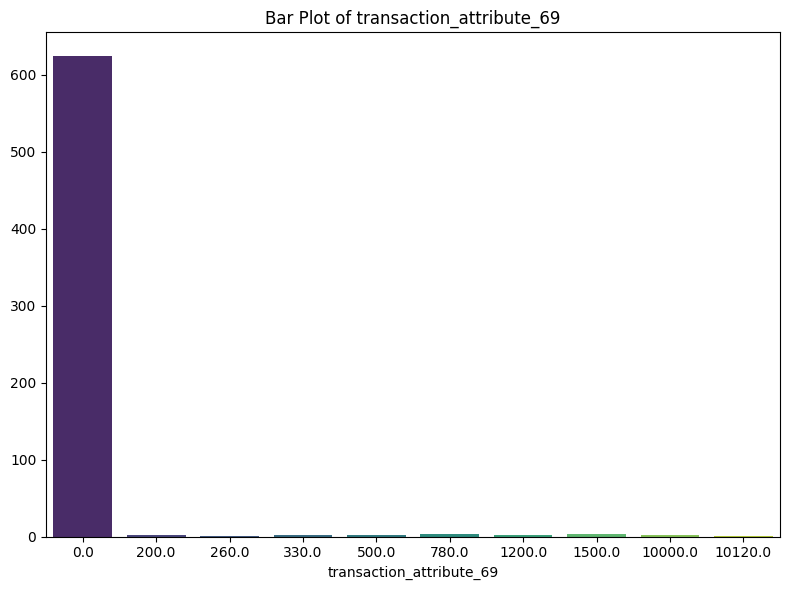

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


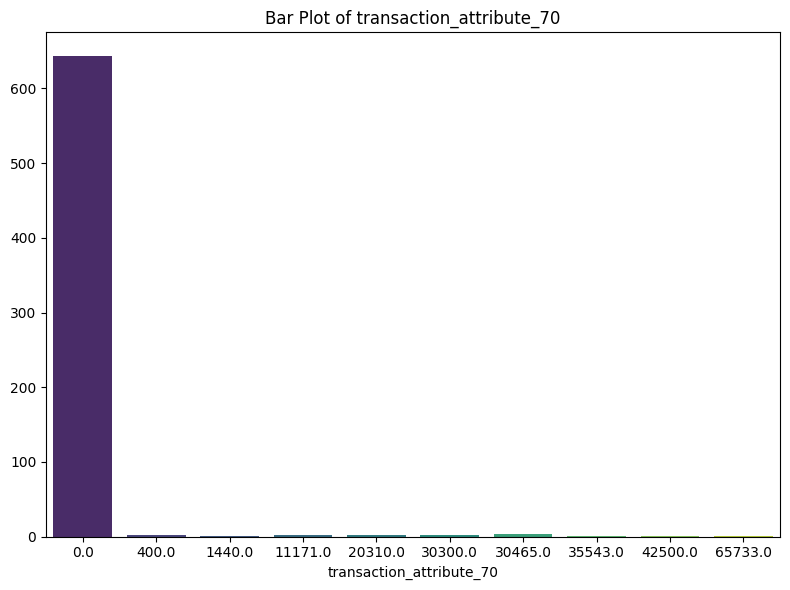

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


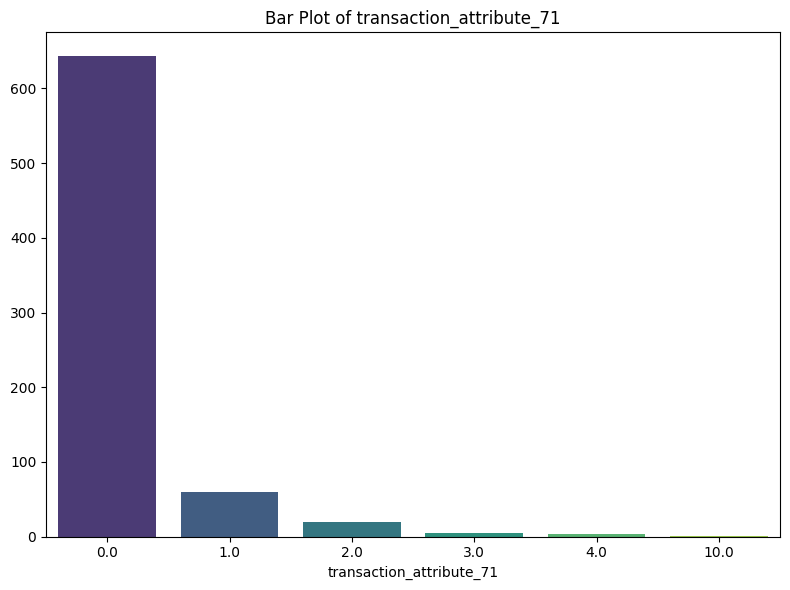

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


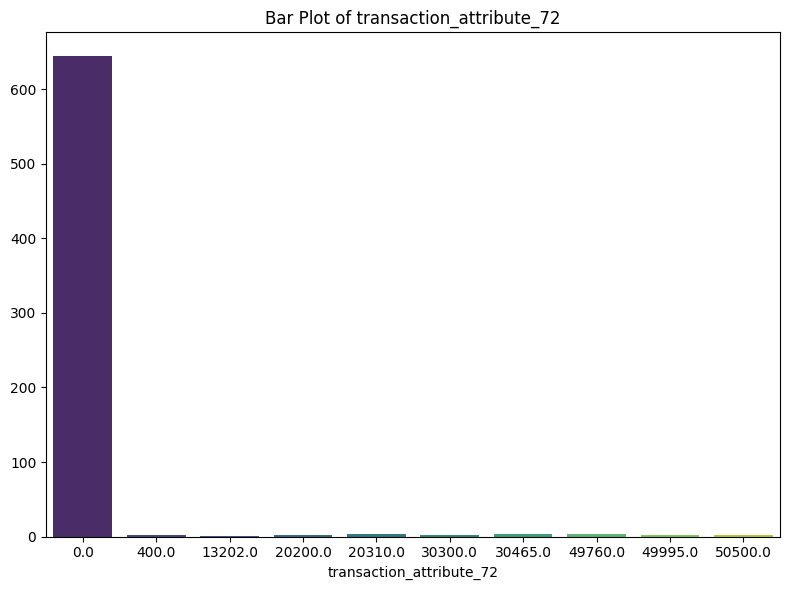

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


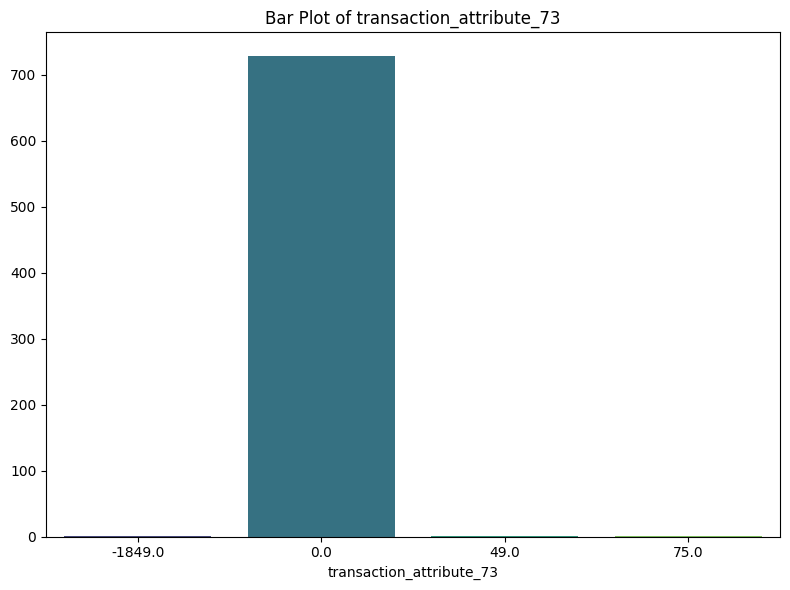

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


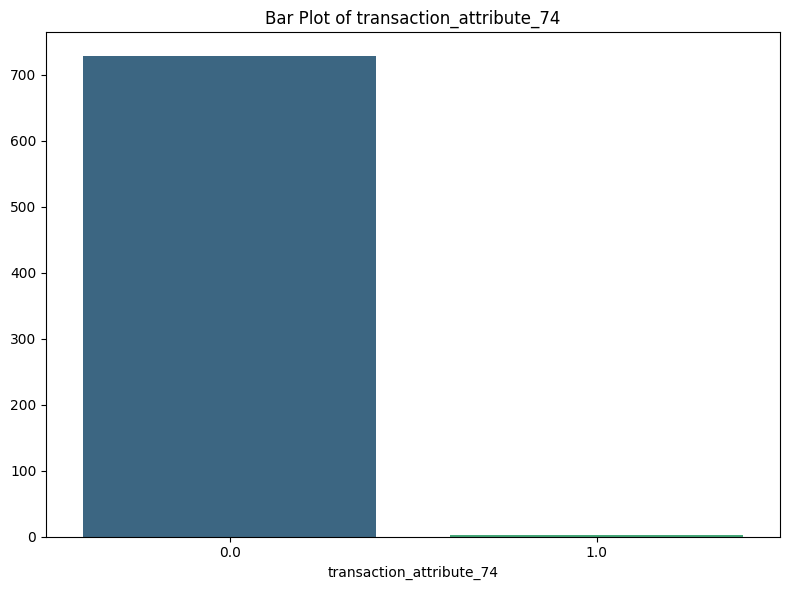

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


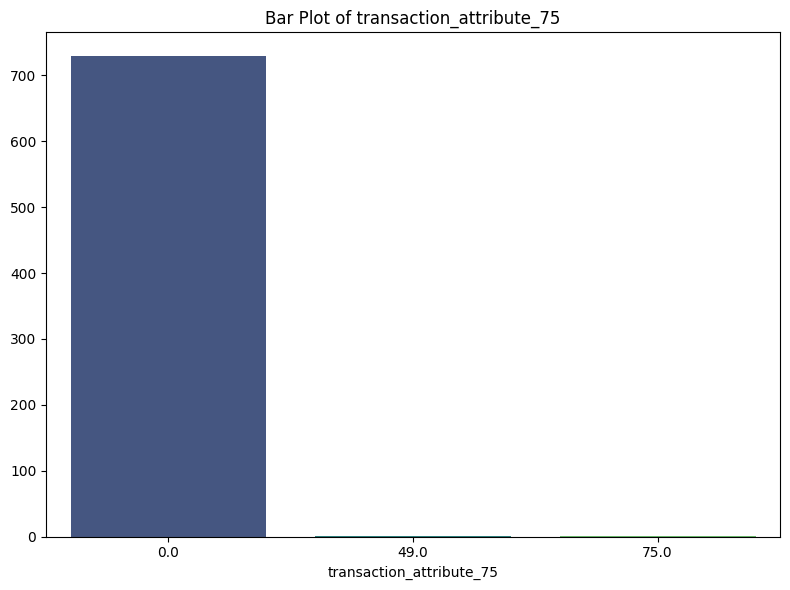

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


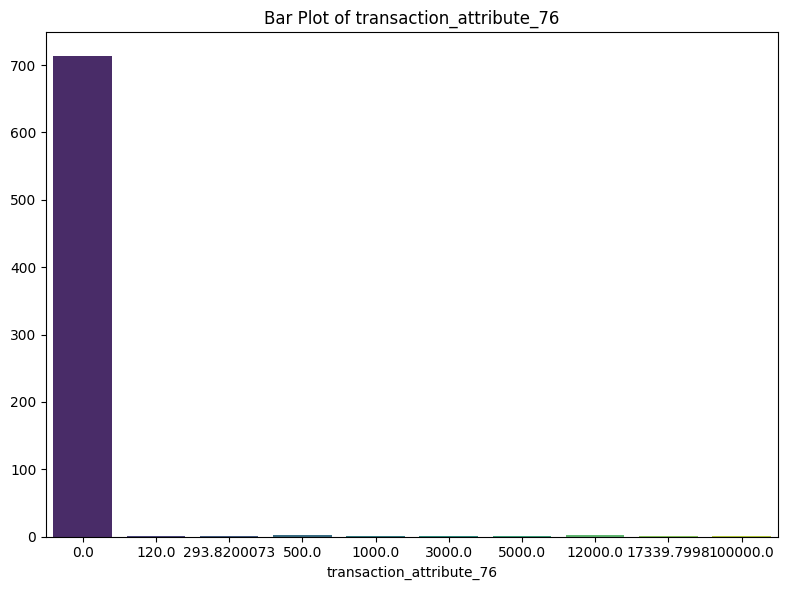

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


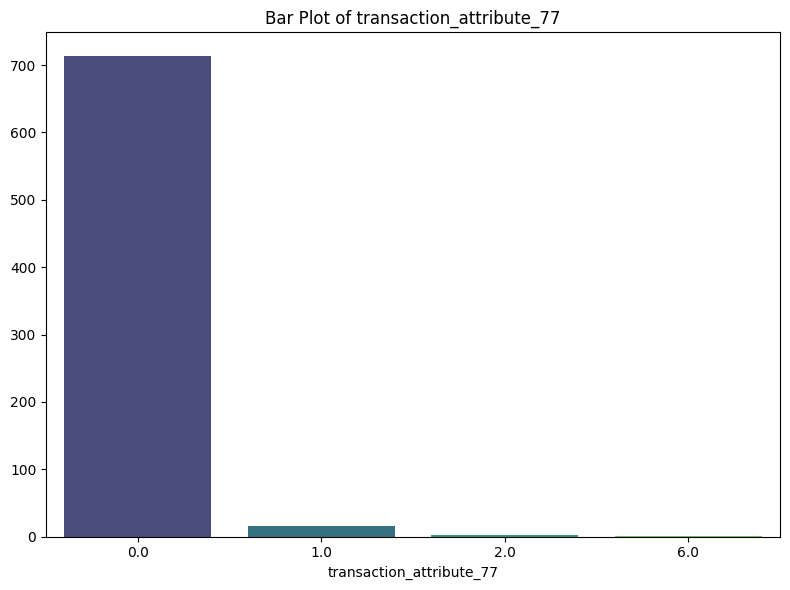

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


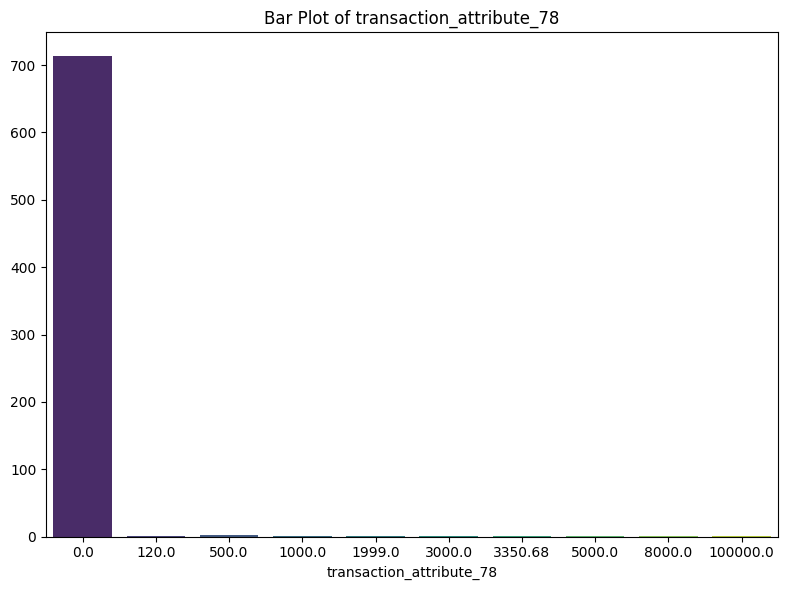

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


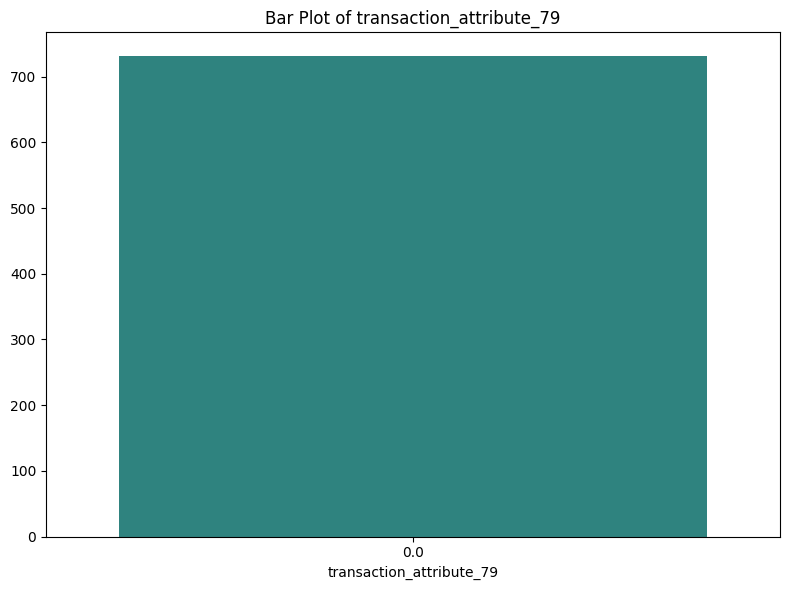

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


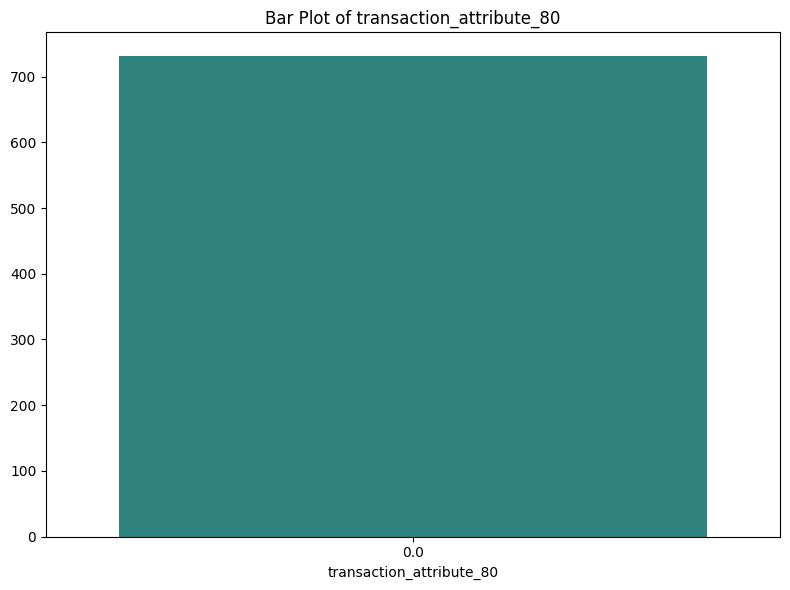

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


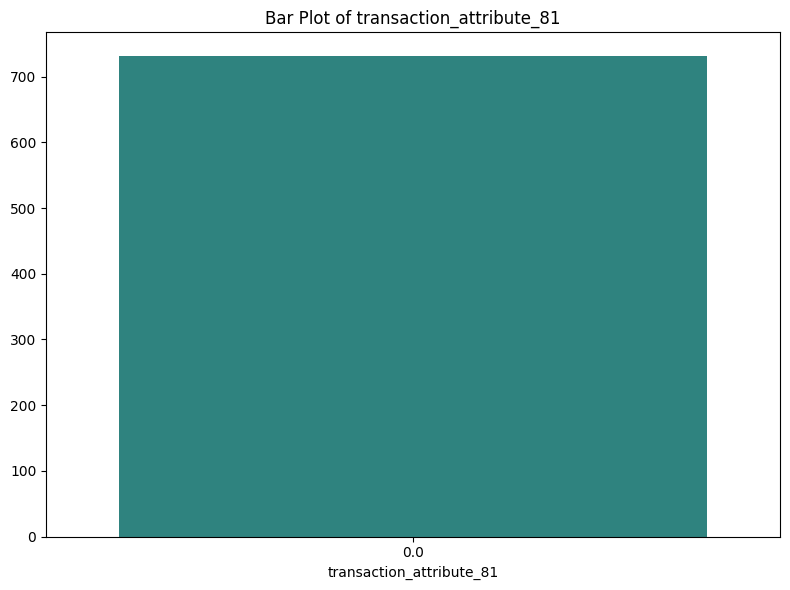

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


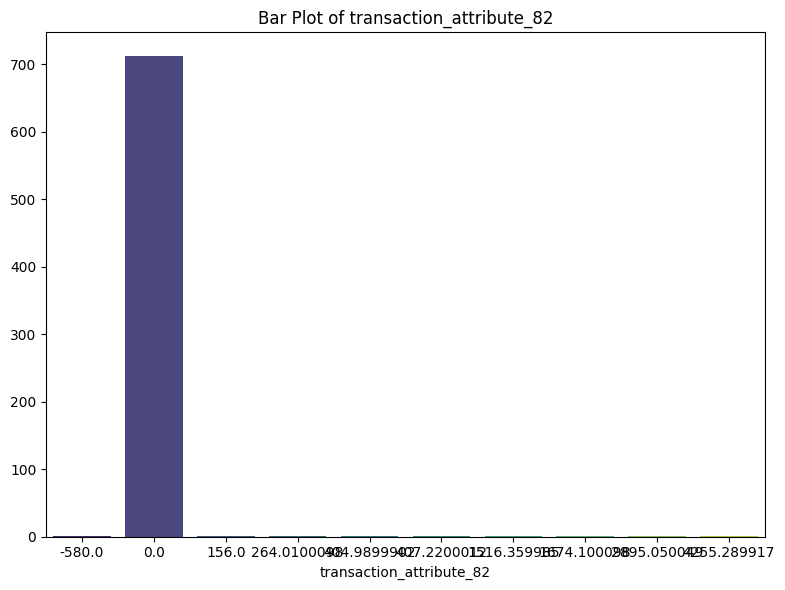

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


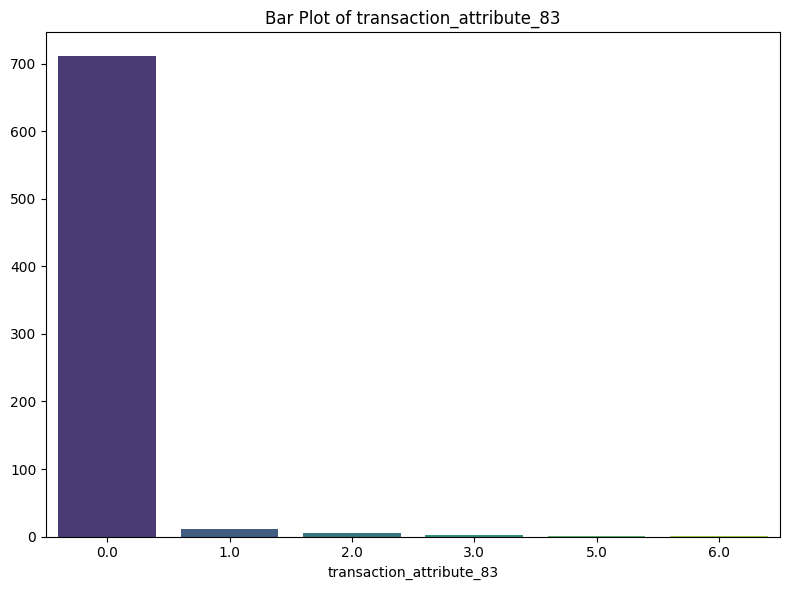

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


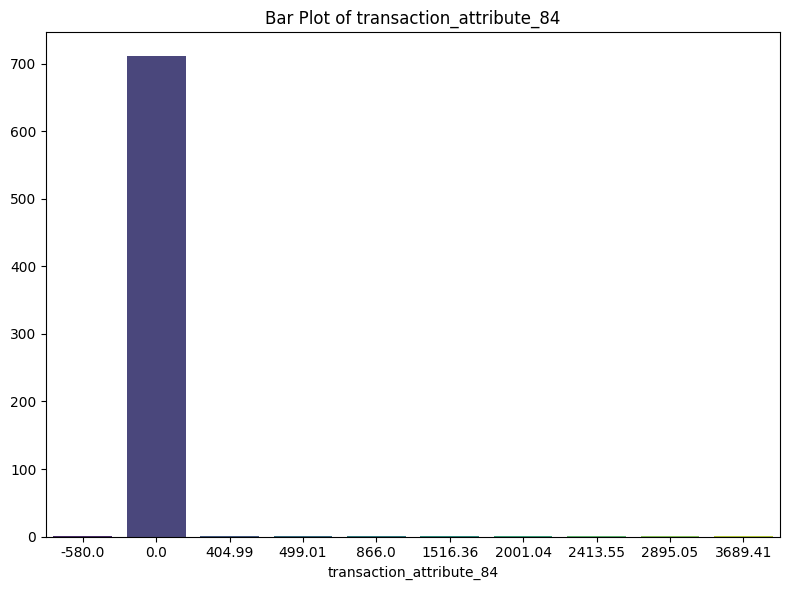

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


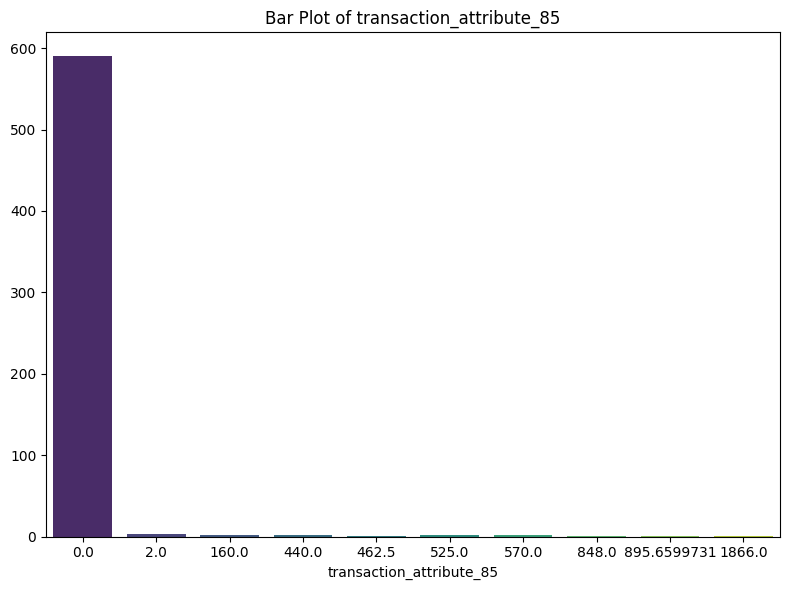

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


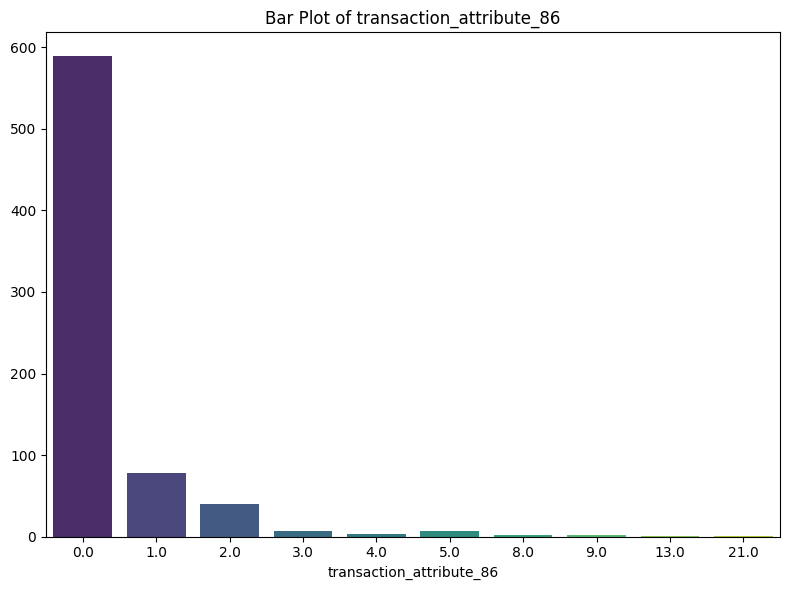

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


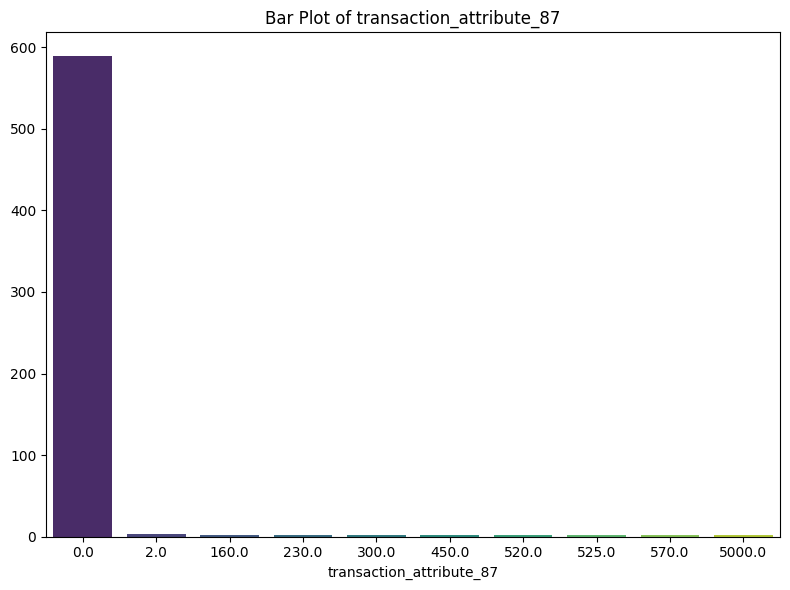

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


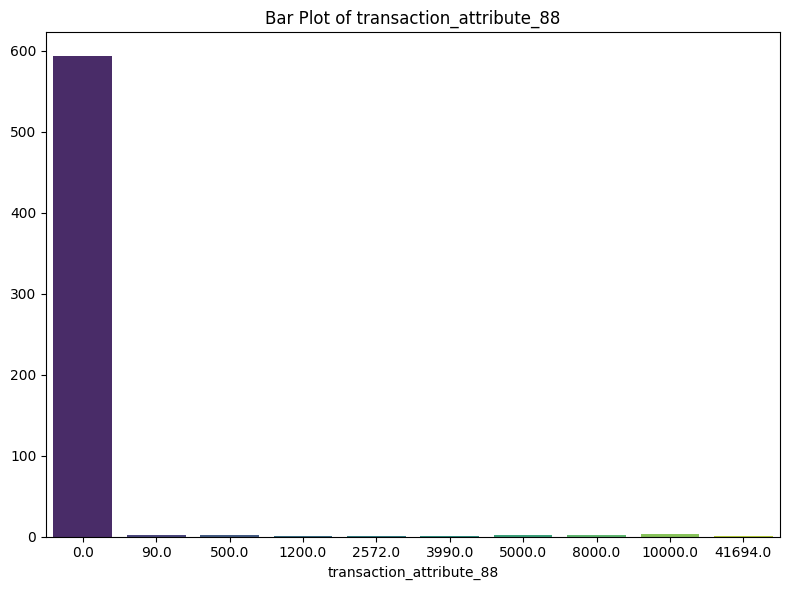

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


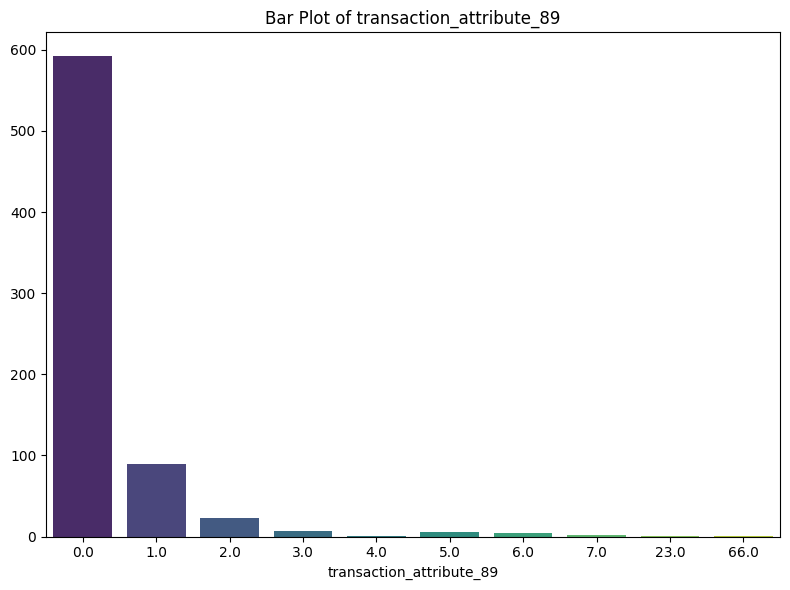

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


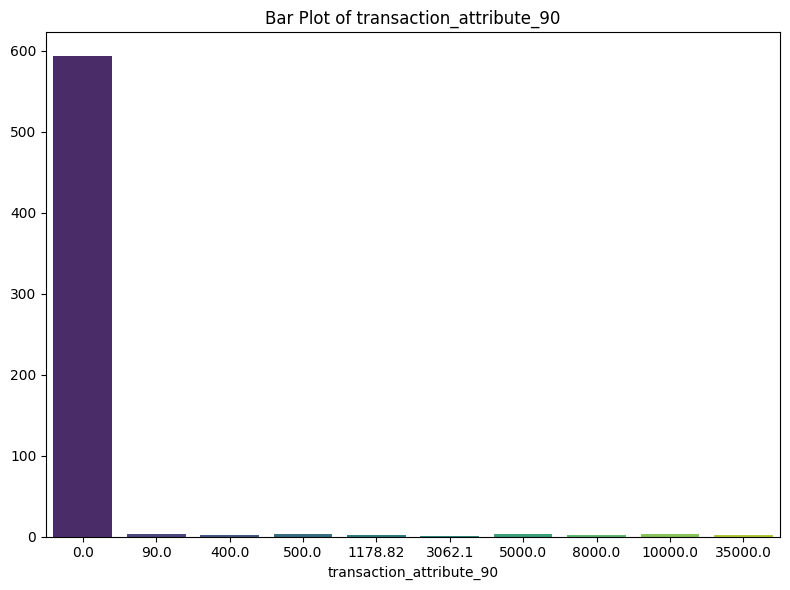

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


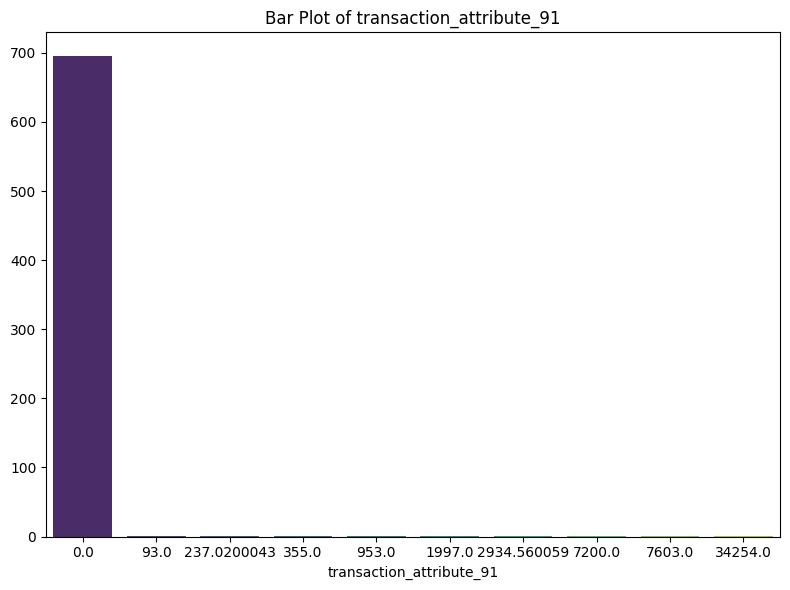

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


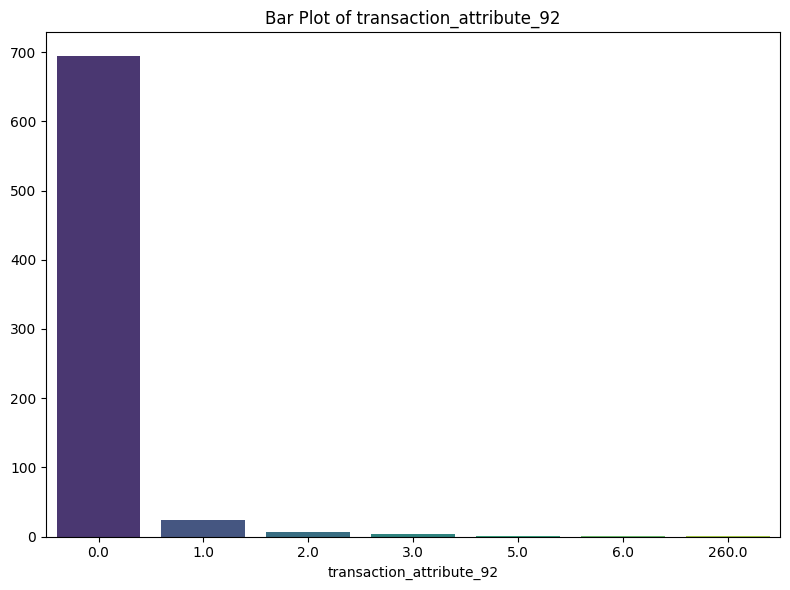

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


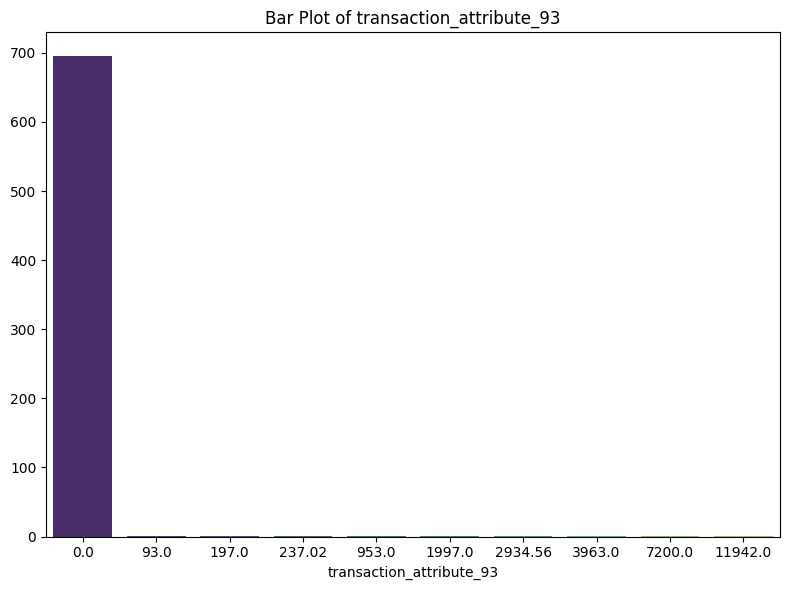

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


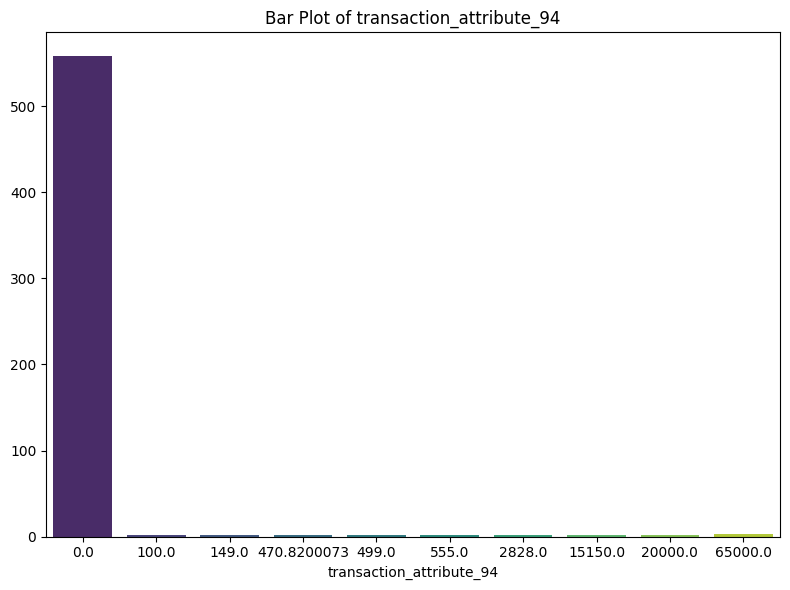

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


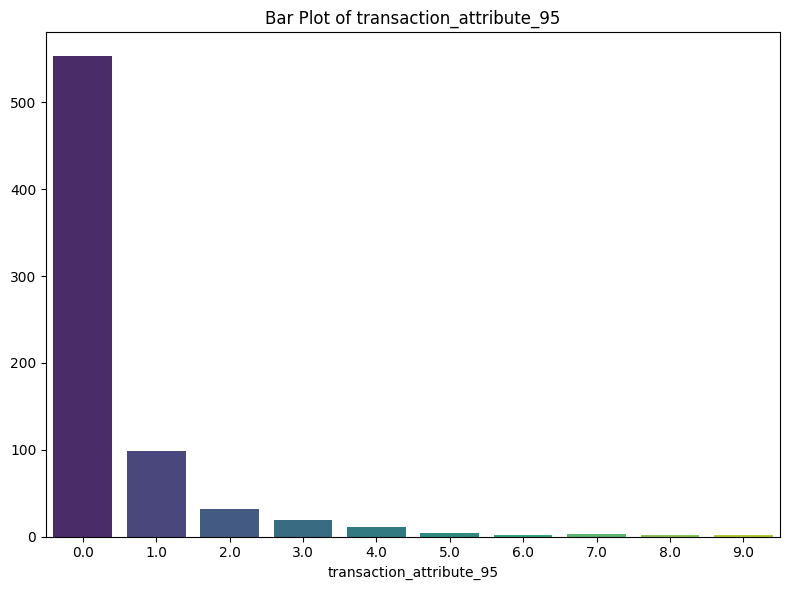

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


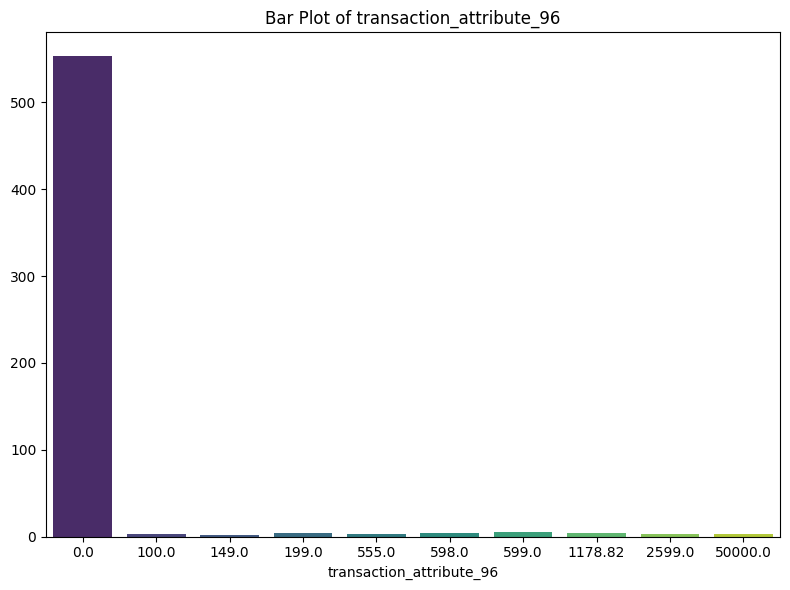

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


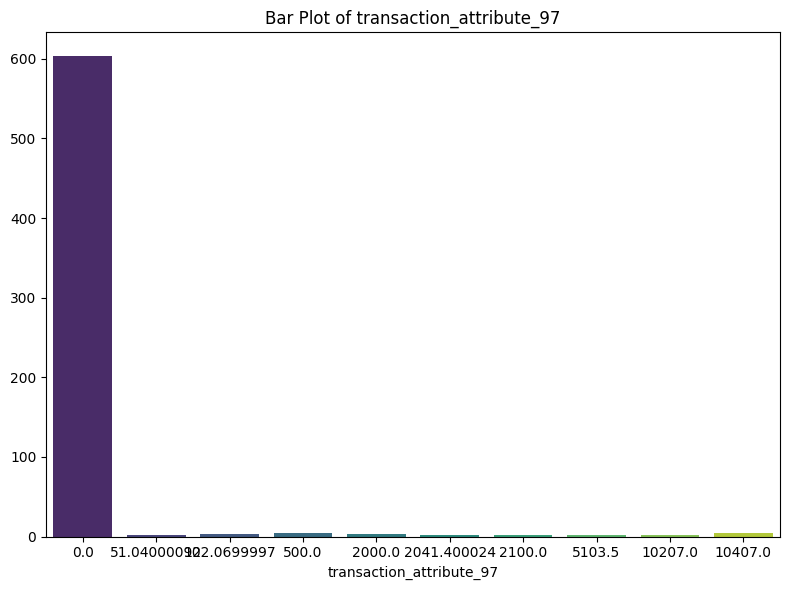

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


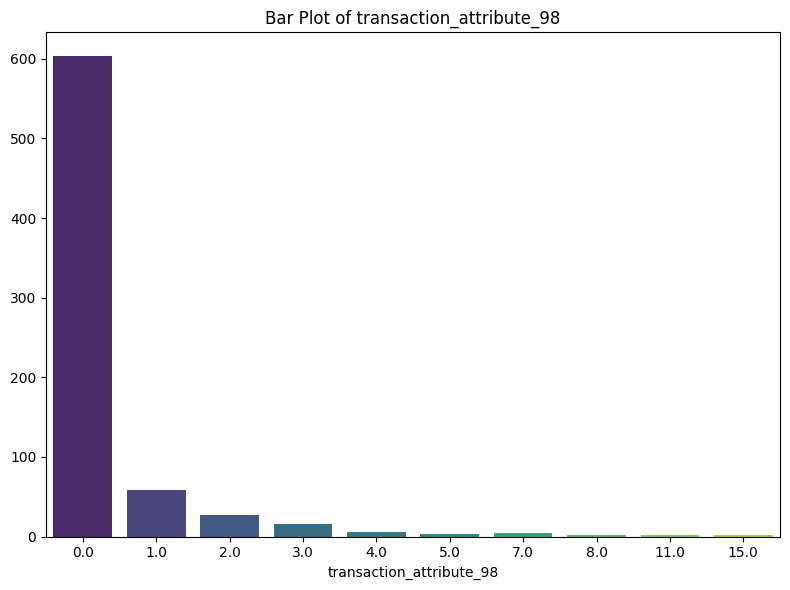

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


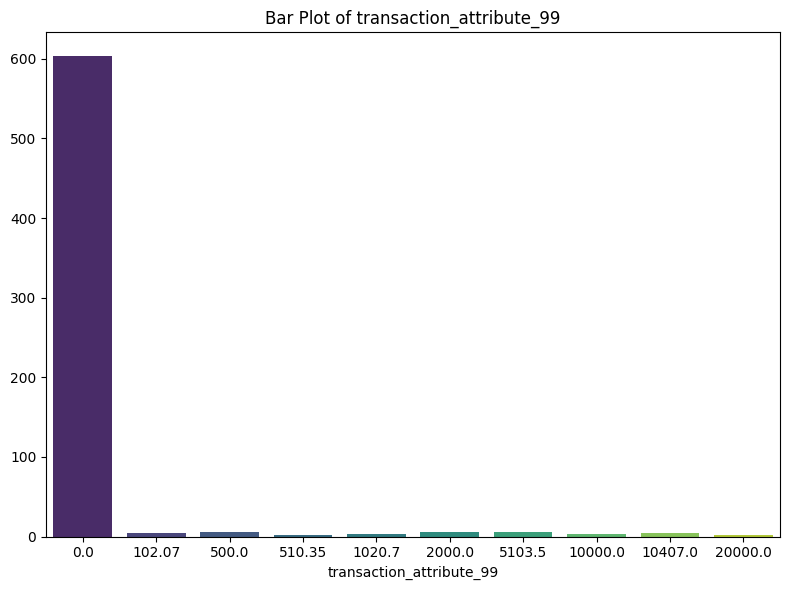

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


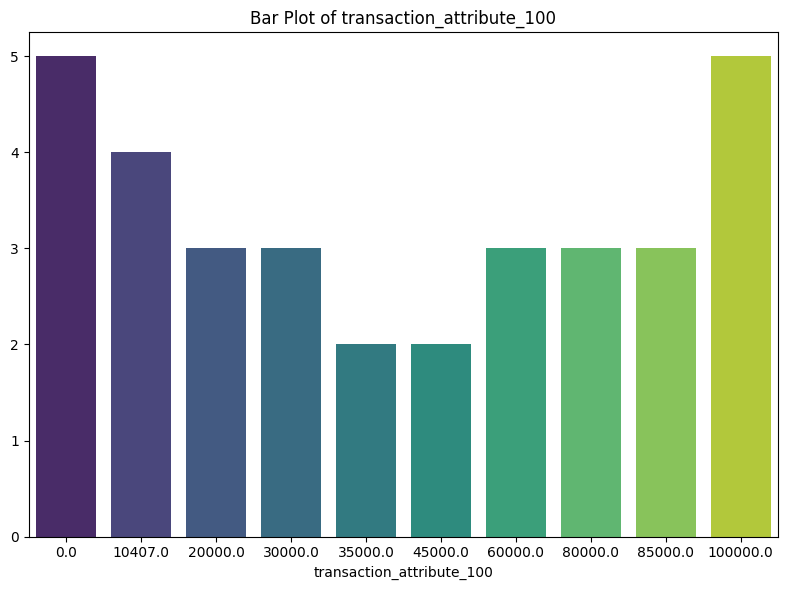

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


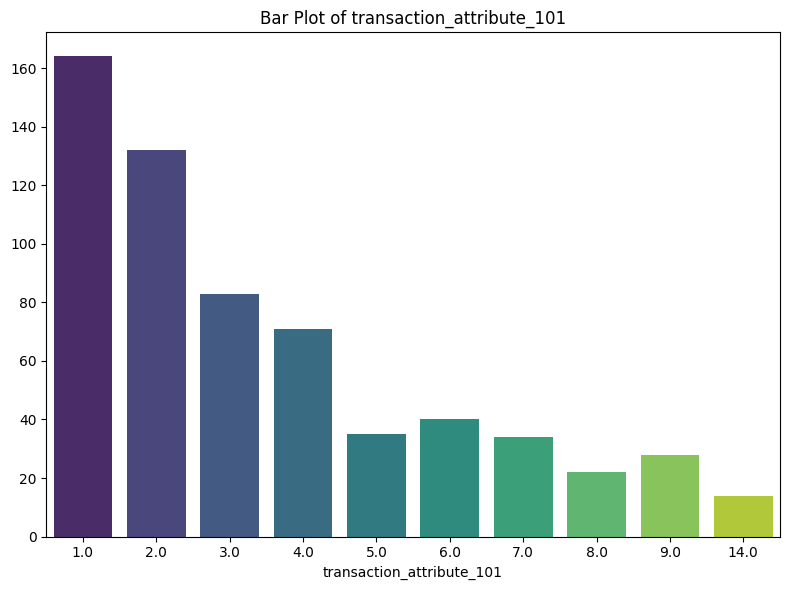

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


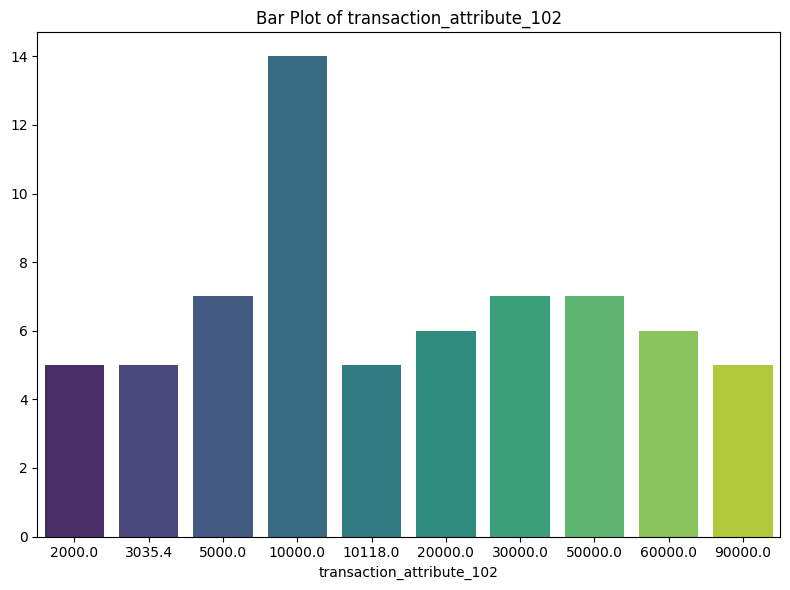

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


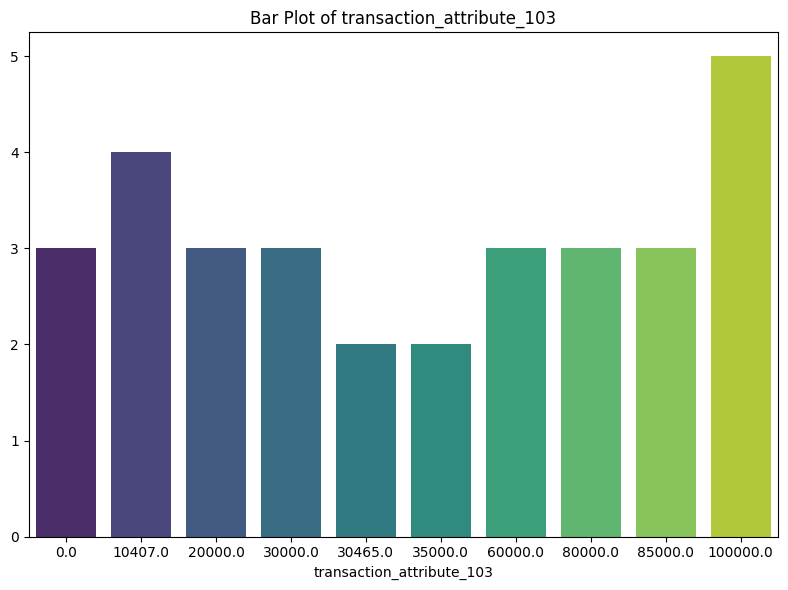

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


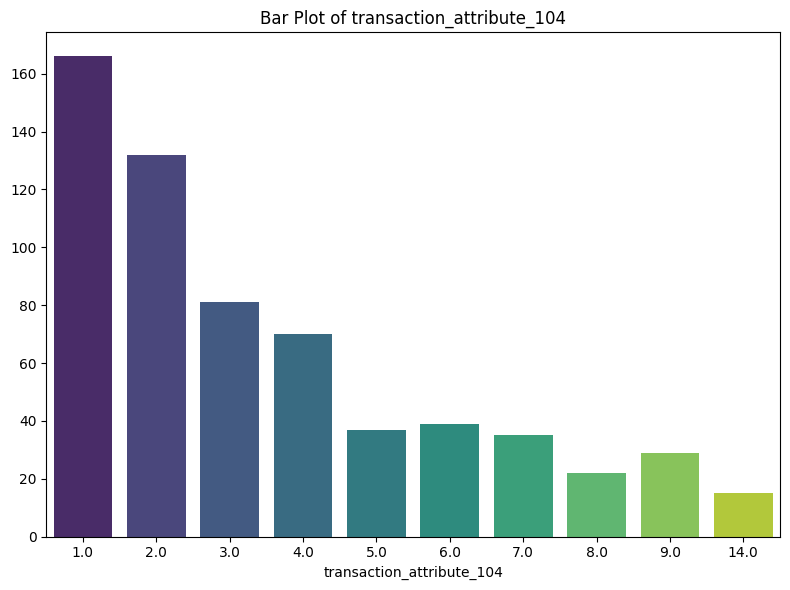

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


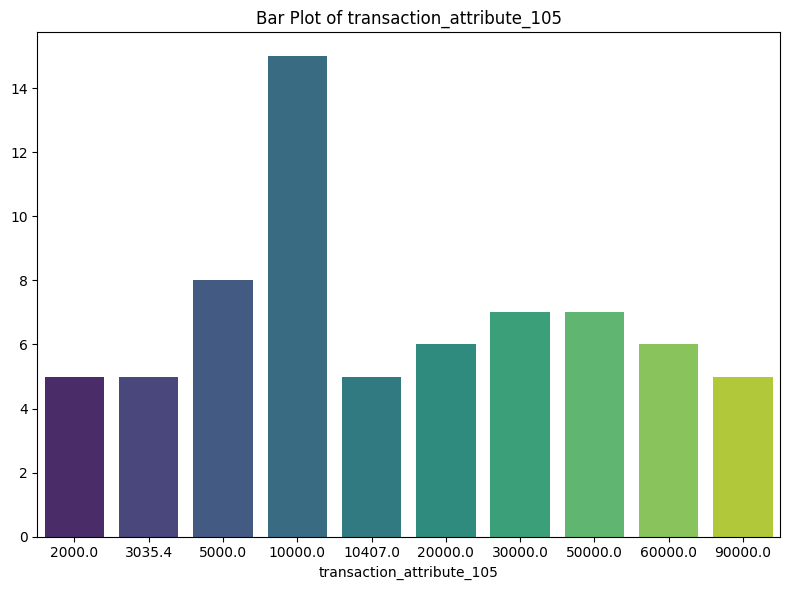

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


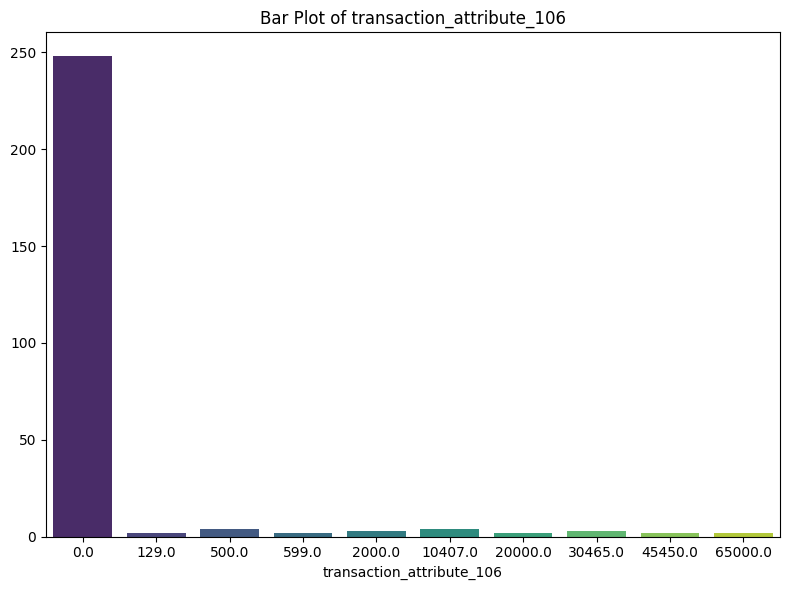

<ipython-input-34-481e5b0069e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")


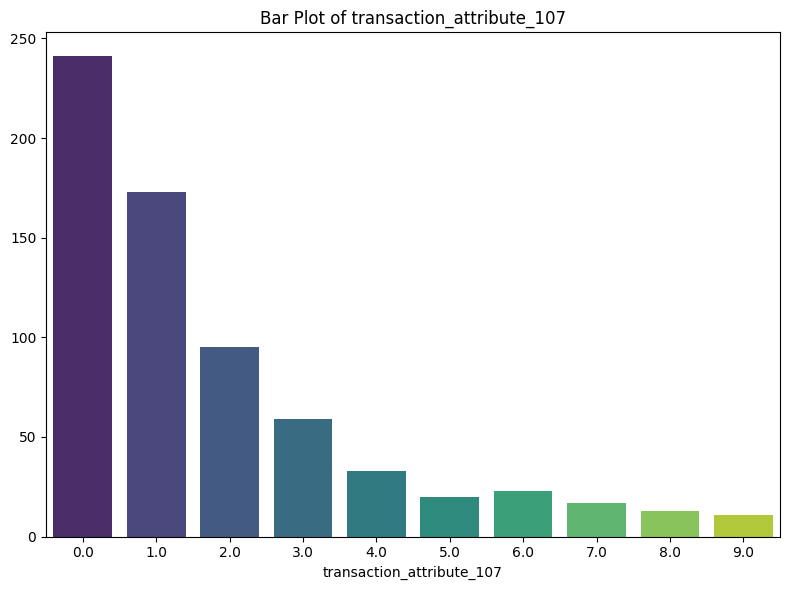

In [34]:
for col in numerical_columns[:110]:
  plt.figure(figsize=(8, 6))
  sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10], palette="viridis")
  save_or_show_plot(plt, f"Bar Plot of {col}")

<ipython-input-35-d1e714092bb7>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_col, y=hue_col, data=df, ci=None, palette="muted")
<ipython-input-35-d1e714092bb7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=hue_col, data=df, ci=None, palette="muted")


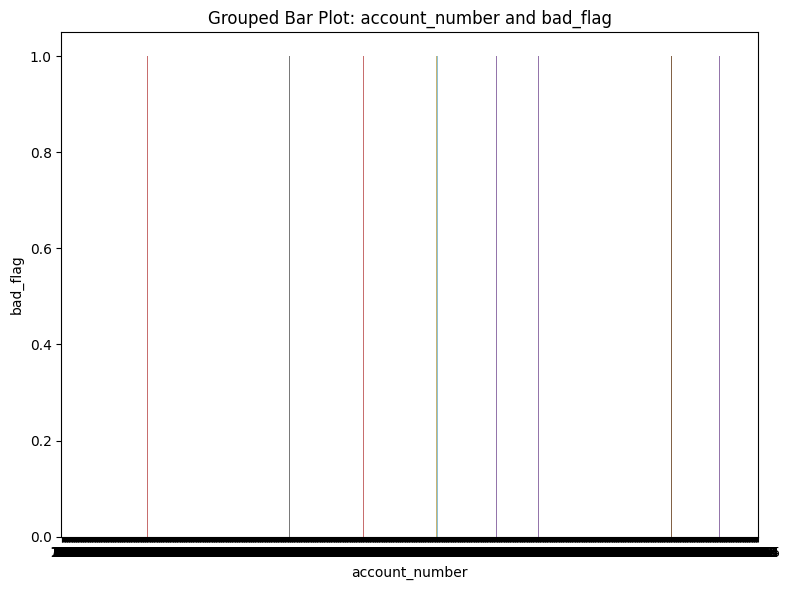

<ipython-input-35-d1e714092bb7>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_col, y=hue_col, data=df, ci=None, palette="muted")
<ipython-input-35-d1e714092bb7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=hue_col, data=df, ci=None, palette="muted")


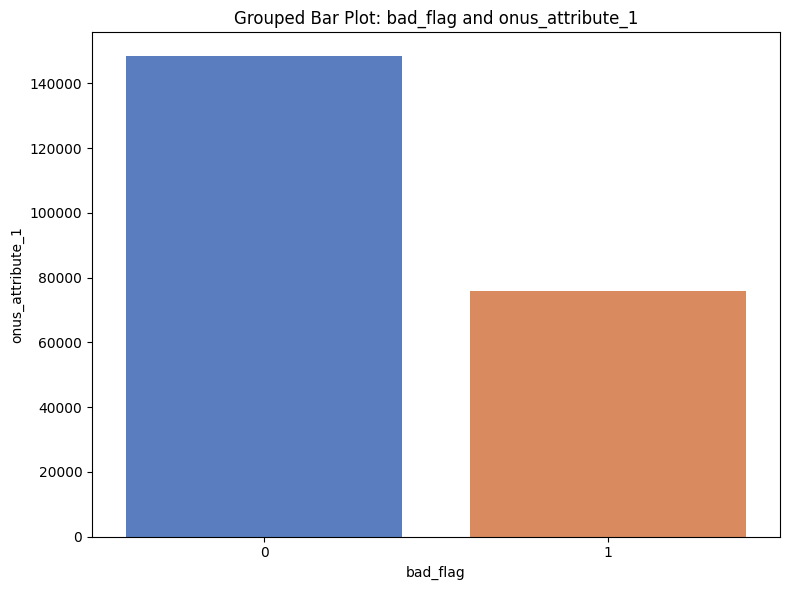

In [35]:
for i in range(2):
  x_col = numerical_columns[i]
  hue_col = numerical_columns[(i + 1) % len(numerical_columns)]
  plt.figure(figsize=(8, 6))
  sns.barplot(x=x_col, y=hue_col, data=df, ci=None, palette="muted")
  save_or_show_plot(plt, f"Grouped Bar Plot: {x_col} and {hue_col}")

In [36]:
fig = px.scatter_3d(df, x=numerical_columns[0], y=numerical_columns[1], z=numerical_columns[2], color="bad_flag")
fig.update_layout(title="3D Scatter Plot")
fig.show()

In [40]:
fig = px.line(df, x=numerical_columns[0], y=numerical_columns[1], title=f"Line Plot of {numerical_columns[0]} vs {numerical_columns[1]}")
fig.show()